##  1. Data cleaning and validation

### Data Merge (In1 to In20)

Datasets are merged with below orders:

| Main Table    | Look Up Table     | Left join key               |
|---------------|-------------------|-----------------------------|
| Stock Return  | Financial Ratio   | PERMNO, date/ public date   |
|               | Market Cap        | Ticker, date/ datadate      |
|               | Sector Code       | Ticker                      |

Filter out the data and only keep Sector # = 25 / 30
Drop not related date (adate, qdate)


In [15]:
import pandas as pd
import numpy as np
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

#Load Datasets
FR = pd.read_csv('Company_Financial_Ratios2022.csv')
IS = pd.read_excel('Industry_Sector_Info.xlsx')
MC = pd.read_excel('MarketCap_Data.xlsx')
SR = pd.read_excel('Stock_Returns_Data2022_v0.xlsx')

In [16]:
#Merge SR with FR

SR['date'] = pd.to_datetime(SR['date'], errors='coerce')
FR['public_date'] = pd.to_datetime(FR['public_date'], errors='coerce')

merged_df1 = pd.merge(SR, FR, how='left', 
                     left_on=['PERMNO', 'date'], 
                     right_on=['permno', 'public_date'])

In [17]:
merged_df1.head()

PERMNO       date  SIC_Industry_Code TICKER_x                COMNAM  \
0   10078 2003-01-31               3570     SUNW  SUN MICROSYSTEMS INC   
1   10078 2003-02-28               3570     SUNW  SUN MICROSYSTEMS INC   
2   10078 2003-03-31               3570     SUNW  SUN MICROSYSTEMS INC   
3   10078 2003-04-30               3570     SUNW  SUN MICROSYSTEMS INC   
4   10078 2003-05-30               3570     SUNW  SUN MICROSYSTEMS INC   

      CUSIP      VOLUME    RETURN  Price Index  Forward 1M Return  \
0  86681020  11399374.0 -0.006431     1.000000           0.113269   
1  86681020   8671118.0  0.113269     1.113269          -0.052326   
2  86681020  10570497.0 -0.052326     1.055016           0.015337   
3  86681020  10668815.0  0.015337     1.071197           0.314199   
4  86681020  13469662.0  0.314199     1.407766           0.068966   

   Forward 3M Return  Forward 6M Return  Forward 12M Return  Past Return 1M  \
0           0.071197           0.216828            0.711003       -0.006431   
1           0.264533           0.133720            0.543604        0.113269   
2           0.426380           0.015337            0.279141       -0.052326   
3           0.135952           0.193354            0.178249        0.015337   
4          -0.103448          -0.020689           -0.041378        0.314199   

   Past Return 12M  Volatility  Volatility Adjusted Forward 1M Return  \
0              NaN         NaN                                    NaN   
1              NaN         NaN                                    NaN   
2              NaN         NaN                                    NaN   
3              NaN         NaN                                    NaN   
4              NaN         NaN                                    NaN   

   Volatility Adjusted Forward 3M Return  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Volatility Adjusted Forward 6M Return  Unnamed: 0    gvkey   permno  \
0                                    NaN         1.0  12136.0  10078.0   
1                                    NaN         2.0  12136.0  10078.0   
2                                    NaN         3.0  12136.0  10078.0   
3                                    NaN         4.0  12136.0  10078.0   
4                                    NaN         NaN      NaN      NaN   

        adate       qdate public_date   CAPEI     bm     evm  pe_op_basic  \
0  2002-06-30  2002-09-30  2003-01-31  11.925  1.154  48.234     -206.000   
1  2002-06-30  2002-12-31  2003-02-28  16.320  0.732  22.761      -57.333   
2  2002-06-30  2002-12-31  2003-03-31  15.635  0.732  22.761      -54.333   
3  2002-06-30  2002-12-31  2003-04-30  15.874  0.732  22.761      -55.167   
4         NaN         NaN         NaT     NaN    NaN     NaN          NaN   

   pe_op_dil  pe_exi  pe_inc     ps     pcf    npm  opmbd  opmad    gpm  \
0   -206.000 -77.250 -77.250  0.797  13.542 -0.042  0.041 -0.043  0.487   
1    -57.333 -18.595 -18.595  0.902  13.947 -0.194  0.062 -0.024  0.506   
2    -54.333 -17.622 -17.622  0.864  13.361 -0.194  0.062 -0.024  0.506   
3    -55.167 -17.892 -17.892  0.877  13.566 -0.194  0.062 -0.024  0.506   
4        NaN     NaN     NaN    NaN     NaN    NaN    NaN    NaN    NaN   

    ptpm    cfm    roa    roe   roce  aftret_eq  pretret_noa  pretret_earnat  \
0 -0.076  0.042  0.030 -0.052 -0.047     -0.052       -0.102          -0.053   
1 -0.220 -0.108  0.046 -0.245 -0.026     -0.245       -0.057          -0.030   
2 -0.220 -0.108  0.046 -0.245 -0.026     -0.245       -0.057          -0.030   
3 -0.220 -0.108  0.046 -0.245 -0.026     -0.245       -0.057          -0.030   
4    NaN    NaN    NaN    NaN    NaN        NaN          NaN             NaN   

   GProf  equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
0  0.366          0.899        0.134        

In [18]:
merged_df1.columns

Index(['PERMNO', 'date', 'SIC_Industry_Code', 'TICKER_x', 'COMNAM', 'CUSIP',
       'VOLUME', 'RETURN', 'Price Index', 'Forward 1M Return',
       'Forward 3M Return', 'Forward 6M Return', 'Forward 12M Return',
       'Past Return 1M', 'Past Return 12M', 'Volatility',
       'Volatility Adjusted Forward 1M Return',
       'Volatility Adjusted Forward 3M Return',
       'Volatility Adjusted Forward 6M Return', 'Unnamed: 0', 'gvkey',
       'permno', 'adate', 'qdate', 'public_date', 'CAPEI', 'bm', 'evm',
       'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'npm',
       'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce',
       'aftret_eq', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap',
       'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'cash_lt', 'invt_act',
       'rect_act', 'debt_at', 'debt_ebitda', 'curr_debt', 'lt_debt',
       'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be',
       'debt_assets', 'debt_capital', 'de

In [19]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134051 entries, 0 to 134050
Data columns (total 81 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   PERMNO                                 134051 non-null  int64         
 1   date                                   134051 non-null  datetime64[ns]
 2   SIC_Industry_Code                      134051 non-null  int64         
 3   TICKER_x                               134051 non-null  object        
 4   COMNAM                                 134051 non-null  object        
 5   CUSIP                                  134051 non-null  object        
 6   VOLUME                                 134004 non-null  float64       
 7   RETURN                                 133660 non-null  float64       
 8   Price Index                            134051 non-null  float64       
 9   Forward 1M Return                      133049 no

In [20]:
merged_df1.drop(['Unnamed: 0','permno','public_date','TICKER_y','cusip'],axis=1,inplace=True)
merged_df1.head()

PERMNO       date  SIC_Industry_Code TICKER_x                COMNAM  \
0   10078 2003-01-31               3570     SUNW  SUN MICROSYSTEMS INC   
1   10078 2003-02-28               3570     SUNW  SUN MICROSYSTEMS INC   
2   10078 2003-03-31               3570     SUNW  SUN MICROSYSTEMS INC   
3   10078 2003-04-30               3570     SUNW  SUN MICROSYSTEMS INC   
4   10078 2003-05-30               3570     SUNW  SUN MICROSYSTEMS INC   

      CUSIP      VOLUME    RETURN  Price Index  Forward 1M Return  \
0  86681020  11399374.0 -0.006431     1.000000           0.113269   
1  86681020   8671118.0  0.113269     1.113269          -0.052326   
2  86681020  10570497.0 -0.052326     1.055016           0.015337   
3  86681020  10668815.0  0.015337     1.071197           0.314199   
4  86681020  13469662.0  0.314199     1.407766           0.068966   

   Forward 3M Return  Forward 6M Return  Forward 12M Return  Past Return 1M  \
0           0.071197           0.216828            0.711003       -0.006431   
1           0.264533           0.133720            0.543604        0.113269   
2           0.426380           0.015337            0.279141       -0.052326   
3           0.135952           0.193354            0.178249        0.015337   
4          -0.103448          -0.020689           -0.041378        0.314199   

   Past Return 12M  Volatility  Volatility Adjusted Forward 1M Return  \
0              NaN         NaN                                    NaN   
1              NaN         NaN                                    NaN   
2              NaN         NaN                                    NaN   
3              NaN         NaN                                    NaN   
4              NaN         NaN                                    NaN   

   Volatility Adjusted Forward 3M Return  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Volatility Adjusted Forward 6M Return    gvkey       adate       qdate  \
0                                    NaN  12136.0  2002-06-30  2002-09-30   
1                                    NaN  12136.0  2002-06-30  2002-12-31   
2                                    NaN  12136.0  2002-06-30  2002-12-31   
3                                    NaN  12136.0  2002-06-30  2002-12-31   
4                                    NaN      NaN         NaN         NaN   

    CAPEI     bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc     ps  \
0  11.925  1.154  48.234     -206.000   -206.000 -77.250 -77.250  0.797   
1  16.320  0.732  22.761      -57.333    -57.333 -18.595 -18.595  0.902   
2  15.635  0.732  22.761      -54.333    -54.333 -17.622 -17.622  0.864   
3  15.874  0.732  22.761      -55.167    -55.167 -17.892 -17.892  0.877   
4     NaN    NaN     NaN          NaN        NaN     NaN     NaN    NaN   

      pcf    npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  \
0  13.542 -0.042  0.041 -0.043  0.487 -0.076  0.042  0.030 -0.052 -0.047   
1  13.947 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026   
2  13.361 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026   
3  13.566 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026   
4     NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

   aftret_eq  pretret_noa  pretret_earnat  GProf  equity_invcap  debt_invcap  \
0     -0.052       -0.102          -0.053  0.366          0.899        0.134   
1     -0.245       -0.057          -0.030  0.396          0.861        0.139   
2     -0.245       -0.057          -0.030  0.396          0.861        0.139   
3     -0.245       -0.057          -0.030  0.396          0.861        0.139   
4        NaN          NaN             NaN    NaN            NaN          NaN   

   totdebt_invcap  capital_ratio  cash_lt  invt_act  rect_act  debt_at  \
0           0.147          0.131    0.

In [21]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134051 entries, 0 to 134050
Data columns (total 76 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   PERMNO                                 134051 non-null  int64         
 1   date                                   134051 non-null  datetime64[ns]
 2   SIC_Industry_Code                      134051 non-null  int64         
 3   TICKER_x                               134051 non-null  object        
 4   COMNAM                                 134051 non-null  object        
 5   CUSIP                                  134051 non-null  object        
 6   VOLUME                                 134004 non-null  float64       
 7   RETURN                                 133660 non-null  float64       
 8   Price Index                            134051 non-null  float64       
 9   Forward 1M Return                      133049 no

In [22]:
#Merge mc

MC['datadate'] = pd.to_datetime(MC['datadate'], errors='coerce')

merged_df2 = pd.merge(merged_df1, MC, how='left', 
                     left_on=['TICKER_x', 'date'], 
                     right_on=['ticker', 'datadate'])



In [23]:
merged_df2.columns

Index(['PERMNO', 'date', 'SIC_Industry_Code', 'TICKER_x', 'COMNAM', 'CUSIP',
       'VOLUME', 'RETURN', 'Price Index', 'Forward 1M Return',
       'Forward 3M Return', 'Forward 6M Return', 'Forward 12M Return',
       'Past Return 1M', 'Past Return 12M', 'Volatility',
       'Volatility Adjusted Forward 1M Return',
       'Volatility Adjusted Forward 3M Return',
       'Volatility Adjusted Forward 6M Return', 'gvkey', 'adate', 'qdate',
       'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc',
       'ps', 'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa',
       'roe', 'roce', 'aftret_eq', 'pretret_noa', 'pretret_earnat', 'GProf',
       'equity_invcap', 'debt_invcap', 'totdebt_invcap', 'capital_ratio',
       'cash_lt', 'invt_act', 'rect_act', 'debt_at', 'debt_ebitda',
       'curr_debt', 'lt_debt', 'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf',
       'lt_ppent', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio',
       'cash_ratio', 'quick_ratio', '

In [24]:
merged_df2.drop(['datadate','ticker','gvkey'],axis=1,inplace=True)
merged_df2.head()

PERMNO       date  SIC_Industry_Code TICKER_x                COMNAM  \
0   10078 2003-01-31               3570     SUNW  SUN MICROSYSTEMS INC   
1   10078 2003-02-28               3570     SUNW  SUN MICROSYSTEMS INC   
2   10078 2003-03-31               3570     SUNW  SUN MICROSYSTEMS INC   
3   10078 2003-04-30               3570     SUNW  SUN MICROSYSTEMS INC   
4   10078 2003-05-30               3570     SUNW  SUN MICROSYSTEMS INC   

      CUSIP      VOLUME    RETURN  Price Index  Forward 1M Return  \
0  86681020  11399374.0 -0.006431     1.000000           0.113269   
1  86681020   8671118.0  0.113269     1.113269          -0.052326   
2  86681020  10570497.0 -0.052326     1.055016           0.015337   
3  86681020  10668815.0  0.015337     1.071197           0.314199   
4  86681020  13469662.0  0.314199     1.407766           0.068966   

   Forward 3M Return  Forward 6M Return  Forward 12M Return  Past Return 1M  \
0           0.071197           0.216828            0.711003       -0.006431   
1           0.264533           0.133720            0.543604        0.113269   
2           0.426380           0.015337            0.279141       -0.052326   
3           0.135952           0.193354            0.178249        0.015337   
4          -0.103448          -0.020689           -0.041378        0.314199   

   Past Return 12M  Volatility  Volatility Adjusted Forward 1M Return  \
0              NaN         NaN                                    NaN   
1              NaN         NaN                                    NaN   
2              NaN         NaN                                    NaN   
3              NaN         NaN                                    NaN   
4              NaN         NaN                                    NaN   

   Volatility Adjusted Forward 3M Return  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Volatility Adjusted Forward 6M Return       adate       qdate   CAPEI  \
0                                    NaN  2002-06-30  2002-09-30  11.925   
1                                    NaN  2002-06-30  2002-12-31  16.320   
2                                    NaN  2002-06-30  2002-12-31  15.635   
3                                    NaN  2002-06-30  2002-12-31  15.874   
4                                    NaN         NaN         NaN     NaN   

      bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc     ps     pcf  \
0  1.154  48.234     -206.000   -206.000 -77.250 -77.250  0.797  13.542   
1  0.732  22.761      -57.333    -57.333 -18.595 -18.595  0.902  13.947   
2  0.732  22.761      -54.333    -54.333 -17.622 -17.622  0.864  13.361   
3  0.732  22.761      -55.167    -55.167 -17.892 -17.892  0.877  13.566   
4    NaN     NaN          NaN        NaN     NaN     NaN    NaN     NaN   

     npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  aftret_eq  \
0 -0.042  0.041 -0.043  0.487 -0.076  0.042  0.030 -0.052 -0.047     -0.052   
1 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026     -0.245   
2 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026     -0.245   
3 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026     -0.245   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN        NaN   

   pretret_noa  pretret_earnat  GProf  equity_invcap  debt_invcap  \
0       -0.102          -0.053  0.366          0.899        0.134   
1       -0.057          -0.030  0.396          0.861        0.139   
2       -0.057          -0.030  0.396          0.861        0.139   
3       -0.057          -0.030  0.396          0.861        0.139   
4          NaN             NaN    NaN            NaN          NaN   

   totdebt_invcap  capital_ratio  cash_lt  invt_act  rect_act  debt_at  \
0           0.147          0.131    0.359     0.077     0.336    0.096   
1           0.149 

In [25]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134051 entries, 0 to 134050
Data columns (total 77 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   PERMNO                                 134051 non-null  int64         
 1   date                                   134051 non-null  datetime64[ns]
 2   SIC_Industry_Code                      134051 non-null  int64         
 3   TICKER_x                               134051 non-null  object        
 4   COMNAM                                 134051 non-null  object        
 5   CUSIP                                  134051 non-null  object        
 6   VOLUME                                 134004 non-null  float64       
 7   RETURN                                 133660 non-null  float64       
 8   Price Index                            134051 non-null  float64       
 9   Forward 1M Return                      133049 no

In [26]:
#Merge IS

merged_df3 = pd.merge(merged_df2, IS, how='left', 
                     left_on=['TICKER_x', ], 
                     right_on=['ticker', ])


In [27]:
merged_df3.columns

Index(['PERMNO', 'date', 'SIC_Industry_Code', 'TICKER_x', 'COMNAM', 'CUSIP',
       'VOLUME', 'RETURN', 'Price Index', 'Forward 1M Return',
       'Forward 3M Return', 'Forward 6M Return', 'Forward 12M Return',
       'Past Return 1M', 'Past Return 12M', 'Volatility',
       'Volatility Adjusted Forward 1M Return',
       'Volatility Adjusted Forward 3M Return',
       'Volatility Adjusted Forward 6M Return', 'adate', 'qdate', 'CAPEI',
       'bm', 'evm', 'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps',
       'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe',
       'roce', 'aftret_eq', 'pretret_noa', 'pretret_earnat', 'GProf',
       'equity_invcap', 'debt_invcap', 'totdebt_invcap', 'capital_ratio',
       'cash_lt', 'invt_act', 'rect_act', 'debt_at', 'debt_ebitda',
       'curr_debt', 'lt_debt', 'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf',
       'lt_ppent', 'dltt_be', 'debt_assets', 'debt_capital', 'de_ratio',
       'cash_ratio', 'quick_ratio', 'curr_rati

In [28]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134051 entries, 0 to 134050
Data columns (total 83 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   PERMNO                                 134051 non-null  int64         
 1   date                                   134051 non-null  datetime64[ns]
 2   SIC_Industry_Code                      134051 non-null  int64         
 3   TICKER_x                               134051 non-null  object        
 4   COMNAM                                 134051 non-null  object        
 5   CUSIP                                  134051 non-null  object        
 6   VOLUME                                 134004 non-null  float64       
 7   RETURN                                 133660 non-null  float64       
 8   Price Index                            134051 non-null  float64       
 9   Forward 1M Return                      133049 no

In [29]:
merged_df3.drop(['GVKEY_x','cusip','ticker','conm', 'Industry'],axis=1,inplace=True)
merged_df3.head()

PERMNO       date  SIC_Industry_Code TICKER_x                COMNAM  \
0   10078 2003-01-31               3570     SUNW  SUN MICROSYSTEMS INC   
1   10078 2003-02-28               3570     SUNW  SUN MICROSYSTEMS INC   
2   10078 2003-03-31               3570     SUNW  SUN MICROSYSTEMS INC   
3   10078 2003-04-30               3570     SUNW  SUN MICROSYSTEMS INC   
4   10078 2003-05-30               3570     SUNW  SUN MICROSYSTEMS INC   

      CUSIP      VOLUME    RETURN  Price Index  Forward 1M Return  \
0  86681020  11399374.0 -0.006431     1.000000           0.113269   
1  86681020   8671118.0  0.113269     1.113269          -0.052326   
2  86681020  10570497.0 -0.052326     1.055016           0.015337   
3  86681020  10668815.0  0.015337     1.071197           0.314199   
4  86681020  13469662.0  0.314199     1.407766           0.068966   

   Forward 3M Return  Forward 6M Return  Forward 12M Return  Past Return 1M  \
0           0.071197           0.216828            0.711003       -0.006431   
1           0.264533           0.133720            0.543604        0.113269   
2           0.426380           0.015337            0.279141       -0.052326   
3           0.135952           0.193354            0.178249        0.015337   
4          -0.103448          -0.020689           -0.041378        0.314199   

   Past Return 12M  Volatility  Volatility Adjusted Forward 1M Return  \
0              NaN         NaN                                    NaN   
1              NaN         NaN                                    NaN   
2              NaN         NaN                                    NaN   
3              NaN         NaN                                    NaN   
4              NaN         NaN                                    NaN   

   Volatility Adjusted Forward 3M Return  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Volatility Adjusted Forward 6M Return       adate       qdate   CAPEI  \
0                                    NaN  2002-06-30  2002-09-30  11.925   
1                                    NaN  2002-06-30  2002-12-31  16.320   
2                                    NaN  2002-06-30  2002-12-31  15.635   
3                                    NaN  2002-06-30  2002-12-31  15.874   
4                                    NaN         NaN         NaN     NaN   

      bm     evm  pe_op_basic  pe_op_dil  pe_exi  pe_inc     ps     pcf  \
0  1.154  48.234     -206.000   -206.000 -77.250 -77.250  0.797  13.542   
1  0.732  22.761      -57.333    -57.333 -18.595 -18.595  0.902  13.947   
2  0.732  22.761      -54.333    -54.333 -17.622 -17.622  0.864  13.361   
3  0.732  22.761      -55.167    -55.167 -17.892 -17.892  0.877  13.566   
4    NaN     NaN          NaN        NaN     NaN     NaN    NaN     NaN   

     npm  opmbd  opmad    gpm   ptpm    cfm    roa    roe   roce  aftret_eq  \
0 -0.042  0.041 -0.043  0.487 -0.076  0.042  0.030 -0.052 -0.047     -0.052   
1 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026     -0.245   
2 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026     -0.245   
3 -0.194  0.062 -0.024  0.506 -0.220 -0.108  0.046 -0.245 -0.026     -0.245   
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN        NaN   

   pretret_noa  pretret_earnat  GProf  equity_invcap  debt_invcap  \
0       -0.102          -0.053  0.366          0.899        0.134   
1       -0.057          -0.030  0.396          0.861        0.139   
2       -0.057          -0.030  0.396          0.861        0.139   
3       -0.057          -0.030  0.396          0.861        0.139   
4          NaN             NaN    NaN            NaN          NaN   

   totdebt_invcap  capital_ratio  cash_lt  invt_act  rect_act  debt_at  \
0           0.147          0.131    0.359     0.077     0.336    0.096   
1           0.149 

In [30]:
#Keep only consumer staples and consumer discretionary data where Sector = 25/ 30

merged_df=merged_df3[merged_df3['Sector'].isin([25, 30])]

# Remove the rows where target variavle Forward 3M Return is missing
# merged_df = merged_df.dropna(subset=['Forward 3M Return'])

In [31]:
output_file_path_cleaned = '823_Merged_Data.csv'
merged_df.to_csv(output_file_path_cleaned, index=False)
output_file_path_cleaned

'823_Merged_Data.csv'

In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24500 entries, 1847 to 134050
Data columns (total 78 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   PERMNO                                 24500 non-null  int64         
 1   date                                   24500 non-null  datetime64[ns]
 2   SIC_Industry_Code                      24500 non-null  int64         
 3   TICKER_x                               24500 non-null  object        
 4   COMNAM                                 24500 non-null  object        
 5   CUSIP                                  24500 non-null  object        
 6   VOLUME                                 24496 non-null  float64       
 7   RETURN                                 24447 non-null  float64       
 8   Price Index                            24500 non-null  float64       
 9   Forward 1M Return                      24335 non-null  float64

In [33]:
# Great  year & month feature from date
merged_df['year'] = merged_df['date'].dt.year
merged_df['month'] = merged_df['date'].dt.month

# drop unncessary date columns
merged_df = merged_df.drop(columns=['adate','qdate'],axis=1)

In [34]:
# merged_df.drop_duplicates(inplace=True)
merged_df.describe()

PERMNO                           date  SIC_Industry_Code  \
count  24500.000000                          24500       24500.000000   
mean   59728.906367  2013-01-17 14:16:28.604081664        4173.620694   
min    10874.000000            2003-01-31 00:00:00        1099.000000   
25%    40539.000000            2008-03-31 00:00:00        2321.000000   
50%    69796.000000            2013-01-31 00:00:00        3942.000000   
75%    82642.000000            2017-10-31 00:00:00        5621.000000   
max    93436.000000            2022-12-30 00:00:00        9999.000000   
std    27042.582193                            NaN        1865.473820   

             VOLUME        RETURN   Price Index  Forward 1M Return  \
count  2.449600e+04  24447.000000  24500.000000       24335.000000   
mean   8.086887e+05      0.013450      4.754993           0.013545   
min    1.429000e+03     -0.728694      0.047500          -0.728694   
25%    2.066690e+05     -0.036874      1.346175          -0.036778   
50%    4.333945e+05      0.011275      2.231588           0.011394   
75%    9.028665e+05      0.058984      4.869972           0.059150   
max    3.181284e+07     16.250530    240.192107          16.250530   
std    1.445065e+06      0.145847      8.939220           0.146085   

       Forward 3M Return  Forward 6M Return  Forward 12M Return  \
count       24107.000000       23714.000000        22928.000000   
mean            0.041405           0.087223            0.182304   
min            -0.890951          -0.951909           -0.972629   
25%            -0.053823          -0.062904           -0.063811   
50%             0.033260           0.062341            0.119050   
75%             0.122305           0.192907            0.312726   
max            30.041066          80.047379           83.635370   
std             0.274401           0.636462            1.038990   

       Past Return 1M  Past Return 12M    Volatility  \
count    24481.000000     23147.000000  23147.000000   
mean         0.013431         0.176257      0.304190   
min         -0.728694        -0.996324      0.057126   
25%         -0.036821        -0.070102      0.182862   
50%          0.011153         0.116802      0.249665   
75%          0.058891         0.310800      0.348421   
max         16.250530        83.635370     15.678064   
std          0.145747         1.036639      0.408455   

       Volatility Adjusted Forward 1M Return  \
count                           22983.000000   
mean                                0.041616   
min                                -2.054841   
25%                                -0.146332   
50%                                 0.043047   
75%                                 0.232102   
max                                13.360202   
std                                 0.347019   

       Volatility Adjusted Forward 3M Return  \
count                           22757.000000   
mean                                0.126799   
min                                -2.965680   
25%                                -0.222083   
50%                                 0.120703   
75%                                 0.471182   
max                                26.549100   
std                                 0.611603   

       Volatility Adjusted Forward 6M Return         CAPEI            bm  \
count                           22369.000000  15486.000000  14925.000000   
mean                                0.264111     18.483344      0.374121   
min                                -4.198418 -18804.000000      0.001000   
25%                                -0.268050     15.731250      0.166000   
50%                                 0.232017     21.926500      0.286000   
75%                                 0.751274     30.176750      0.467000   
max                                84.700250   7190.070000     11.532000   
std                                 1.055558    328.487004      0.364649   

                 evm   pe_op_basic     pe_op_dil        pe_exi  

### Outliers Handling(In 21-In22)

 Remove outliner by removing calculating the 0.5th and 99.5th quantiles for specific columns in a DataFrame, grouped by year, and then drops rows where any column's value falls outside these quantile thresholds. This process is repeated for each year, ensuring the removal of extreme values that could skew subsequent data analysis.

In [35]:
# Drop those instances having at least one feature in 1% extreme values of the corresponding year.
all_years = merged_df['year'].unique()
non_usecol_list = ['GVKEY_y', 'PERMNO', 'COMNAM','date','TICKER_x', 'CUSIP', 'year', 'month', 'Sector']
ratio_cols= merged_df.columns.drop(non_usecol_list)
outlier_free_df = merged_df

for year in all_years:
    condition= outlier_free_df['year'] == year
    Q_u = outlier_free_df[ratio_cols][condition].quantile(0.995)
    Q_l = outlier_free_df[ratio_cols][condition].quantile(0.005)
    outlier_cond= ((outlier_free_df[ratio_cols][condition]<Q_l)|(outlier_free_df[ratio_cols][condition]>Q_u)).any(axis=1)

    outlier_free_df=outlier_free_df.drop(outlier_free_df[condition][outlier_cond].index)

In [36]:
pd.set_option('display.max_columns', None)
outlier_free_df.describe()

PERMNO                           date  SIC_Industry_Code  \
count  19527.000000                          19527       19527.000000   
mean   58962.968659  2013-01-06 04:33:57.548010240        4065.415783   
min    10874.000000            2003-01-31 00:00:00        1099.000000   
25%    39538.000000            2008-02-29 00:00:00        2273.000000   
50%    61399.000000            2013-01-31 00:00:00        3942.000000   
75%    81655.000000            2017-10-31 00:00:00        5531.000000   
max    93436.000000            2022-12-30 00:00:00        9999.000000   
std    26702.382527                            NaN        1778.292213   

             VOLUME        RETURN   Price Index  Forward 1M Return  \
count  1.952400e+04  19484.000000  19527.000000       19378.000000   
mean   7.275887e+05      0.011871      4.349445           0.011940   
min    3.328000e+03     -0.512315      0.138599          -0.512315   
25%    2.001605e+05     -0.034753      1.397714          -0.033539   
50%    4.224750e+05      0.011457      2.280079           0.011630   
75%    8.856008e+05      0.057330      4.814796           0.056768   
max    1.668673e+07      0.755591    166.963318           0.856392   
std    1.034148e+06      0.086135      6.153103           0.084454   

       Forward 3M Return  Forward 6M Return  Forward 12M Return  \
count       19210.000000       18920.000000        18324.000000   
mean            0.037638           0.075014            0.151563   
min            -0.674775          -0.798540           -0.850354   
25%            -0.047010          -0.054461           -0.053971   
50%             0.034286           0.064145            0.121893   
75%             0.117802           0.186253            0.304200   
max             1.983953           3.093609           27.261082   
std             0.151431           0.234423            0.417755   

       Past Return 1M  Past Return 12M    Volatility  \
count    19512.000000     18459.000000  18459.000000   
mean         0.011854         0.148650      0.279387   
min         -0.512315        -0.995518      0.071123   
25%         -0.034721        -0.055032      0.180778   
50%          0.011297         0.118982      0.242759   
75%          0.057301         0.304313      0.332249   
max          0.755591         9.726330      2.754828   
std          0.086074         0.375516      0.155023   

       Volatility Adjusted Forward 1M Return  \
count                           18310.000000   
mean                                0.041868   
min                                -1.579702   
25%                                -0.139726   
50%                                 0.045552   
75%                                 0.228771   
max                                 1.334336   
std                                 0.303777   

       Volatility Adjusted Forward 3M Return  \
count                           18142.000000   
mean                                0.128116   
min                                -2.111469   
25%                                -0.204134   
50%                                 0.129683   
75%                                 0.465665   
max                                 2.583265   
std                                 0.529613   

       Volatility Adjusted Forward 6M Return         CAPEI            bm  \
count                           17854.000000  11480.000000  11235.000000   
mean                                0.257557     23.191093      0.362755   
min                                -2.827507   -875.330000      0.003000   
25%                                -0.241211     16.444250      0.174000   
50%                                 0.249814     22.080000      0.291000   
75%                                 0.744256     29.599000      0.461000   
max                                 4.478911    973.363000      4.620000   
std                                 0.788425     32.540372      0.285387   

                evm   pe_op_basic     pe_op_dil        pe_exi   

### Missing Values and Modeling data spliting (In23 to In57)

1. Mcap removed due to high miss volume (94%).
2. Split the dataset into 3 subsets:
    - a. Before 2022-09-30 as all years.
    - b. Between 2012-09-03 to 2022-09-30 as 10 years.
    - c. Between 2017-09-03 to 2022-09-30 as 5 years.
3. Drop null value column for financial ratios using 'accrual' column.
4. Impute the rest of the missing values by year based average.


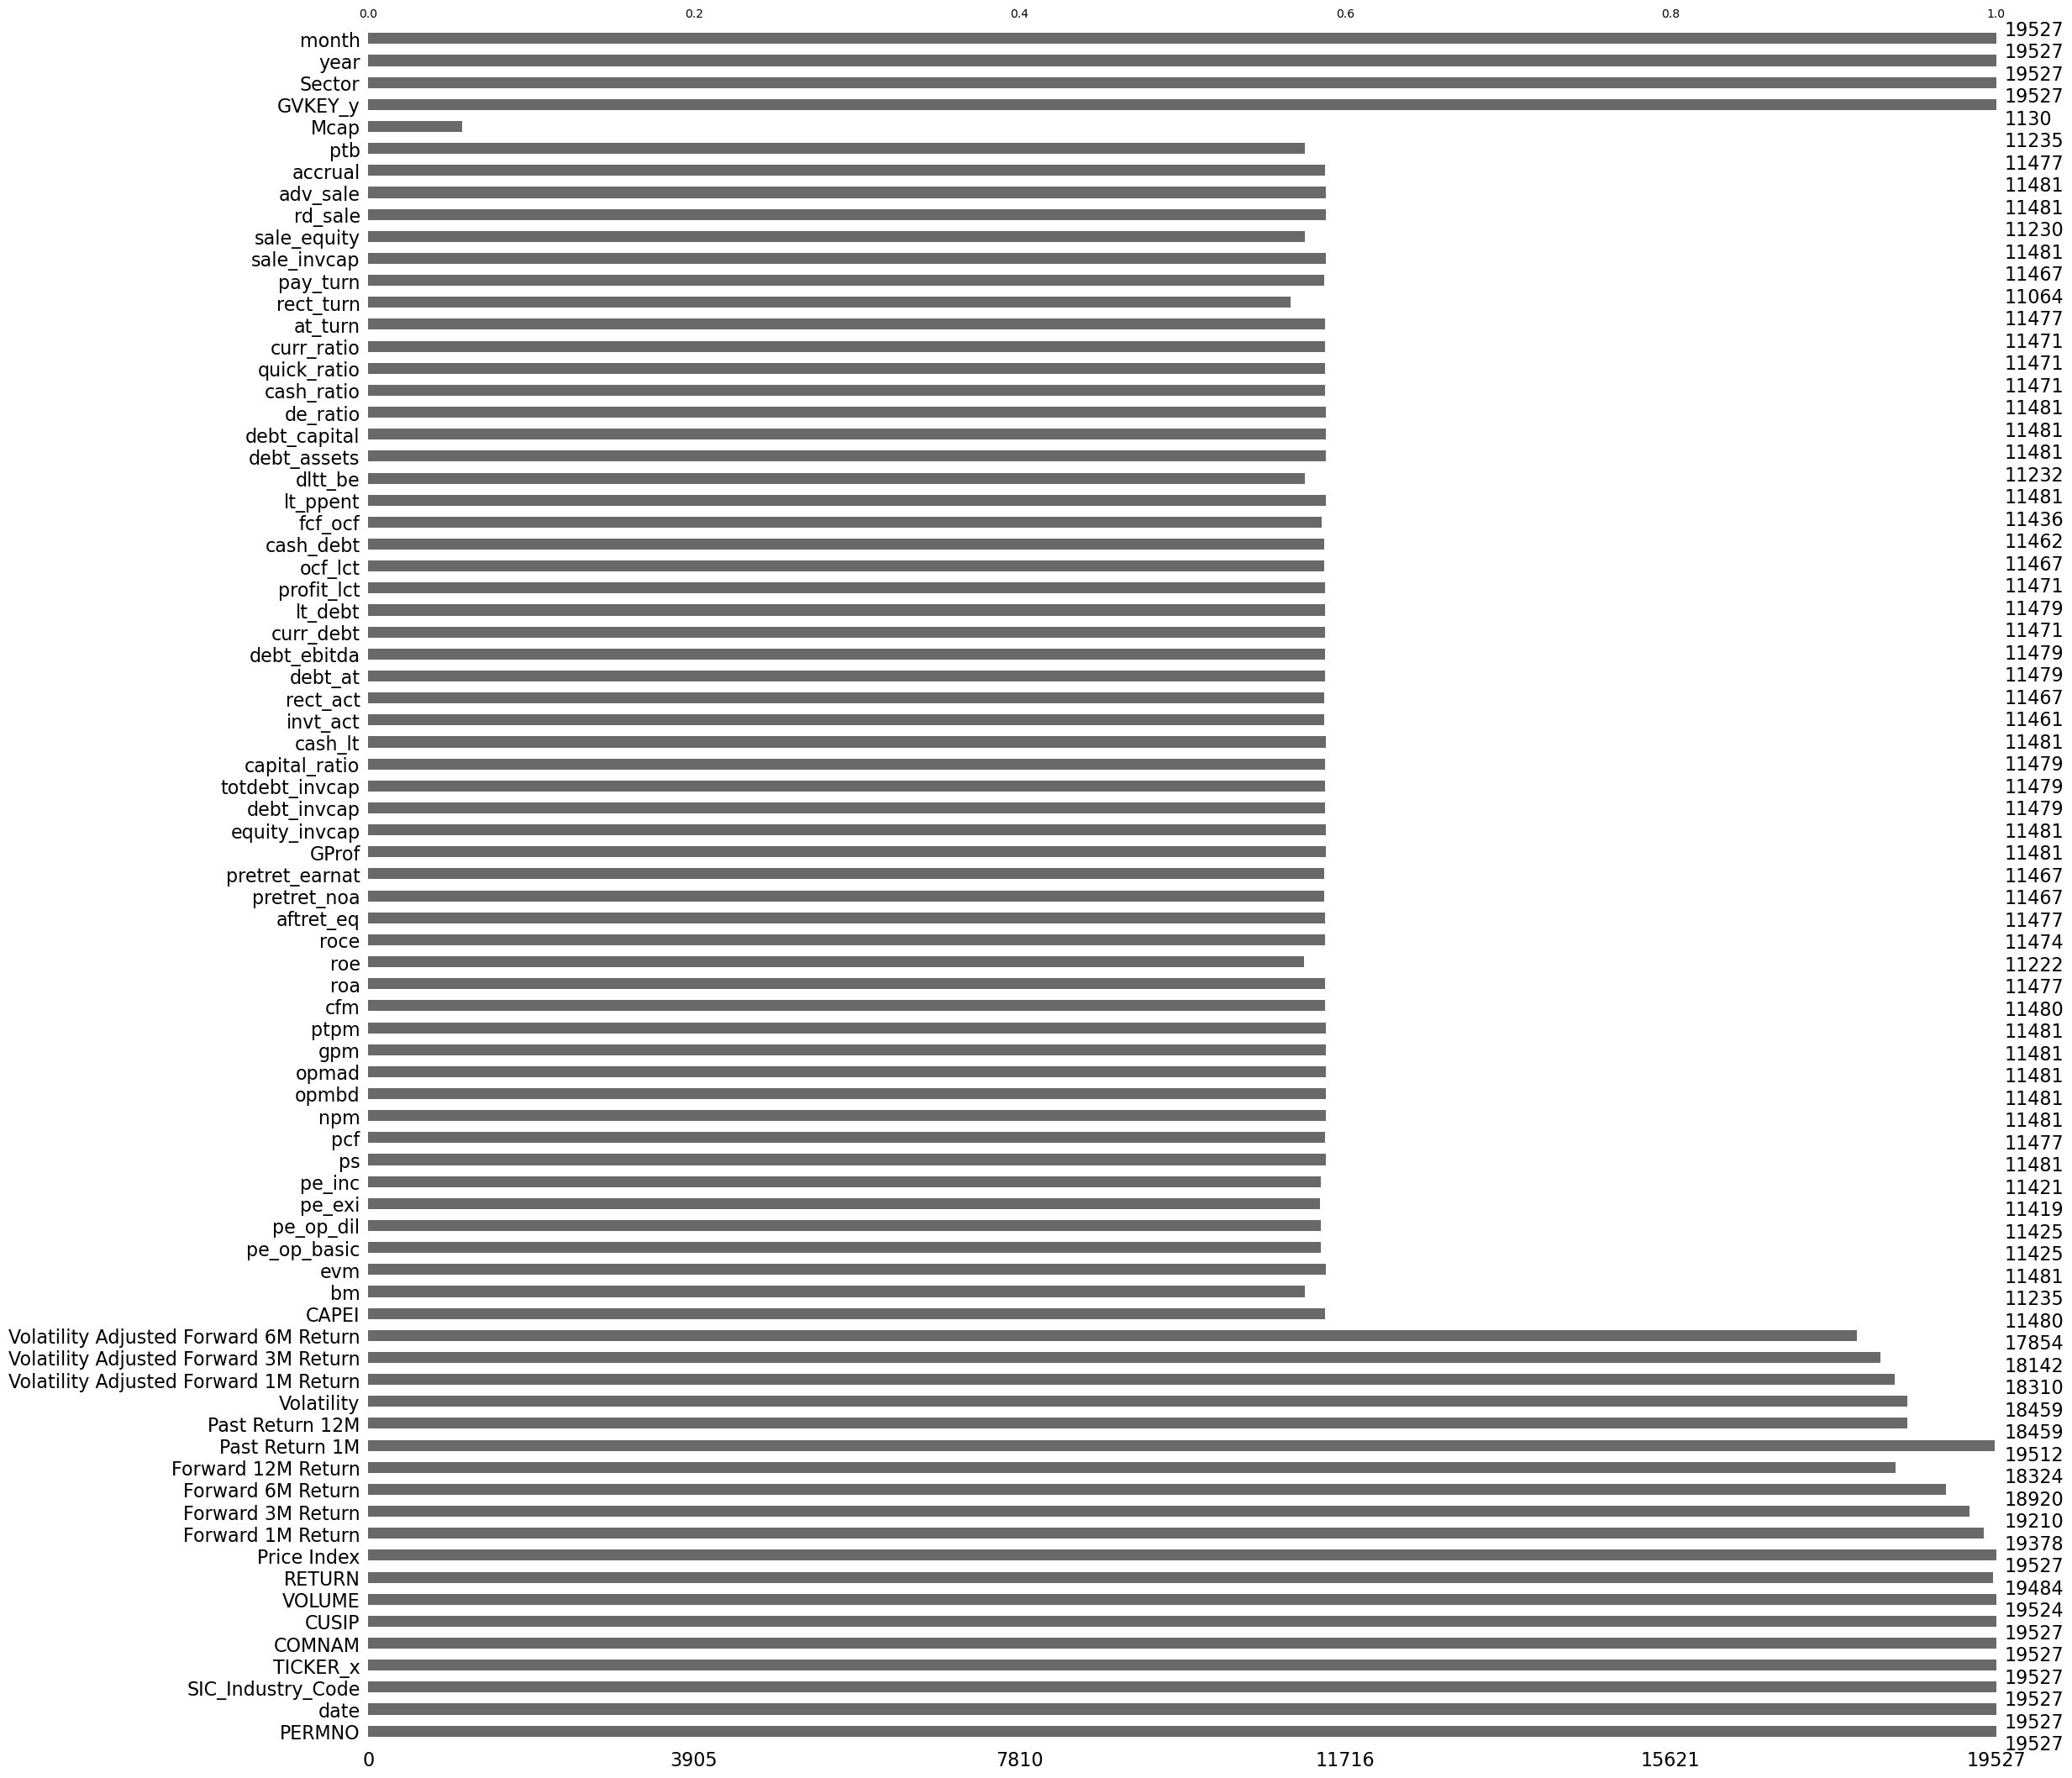

In [37]:
import missingno as msno
import matplotlib.pyplot as plt
outlier_free_df.drop_duplicates(inplace=True)
msno.bar(outlier_free_df)
plt.show()

In [38]:
# Calculating the percentage of missing values for each column in the original dataset
missing_percentage = (outlier_free_df.isnull().sum() / len(outlier_free_df)) * 100

# Display the percentage of missing values for each column
missing_percentage.sort_values(ascending=False)

Mcap                 94.213141
rect_turn            43.339991
roe                  42.530855
sale_equity          42.489886
dltt_be              42.479644
                       ...    
CUSIP                 0.000000
COMNAM                0.000000
TICKER_x              0.000000
SIC_Industry_Code     0.000000
month                 0.000000
Length: 78, dtype: float64

In [39]:
# Drop Mcap due to 35% missing values

outlier_free_df = outlier_free_df.drop(['Mcap'], axis=1)

In [40]:
outlier_free_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19527 entries, 1847 to 134047
Data columns (total 77 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   PERMNO                                 19527 non-null  int64         
 1   date                                   19527 non-null  datetime64[ns]
 2   SIC_Industry_Code                      19527 non-null  int64         
 3   TICKER_x                               19527 non-null  object        
 4   COMNAM                                 19527 non-null  object        
 5   CUSIP                                  19527 non-null  object        
 6   VOLUME                                 19524 non-null  float64       
 7   RETURN                                 19484 non-null  float64       
 8   Price Index                            19527 non-null  float64       
 9   Forward 1M Return                      19378 non-null  float64

In [41]:
outlier_free_df.columns

Index(['PERMNO', 'date', 'SIC_Industry_Code', 'TICKER_x', 'COMNAM', 'CUSIP',
       'VOLUME', 'RETURN', 'Price Index', 'Forward 1M Return',
       'Forward 3M Return', 'Forward 6M Return', 'Forward 12M Return',
       'Past Return 1M', 'Past Return 12M', 'Volatility',
       'Volatility Adjusted Forward 1M Return',
       'Volatility Adjusted Forward 3M Return',
       'Volatility Adjusted Forward 6M Return', 'CAPEI', 'bm', 'evm',
       'pe_op_basic', 'pe_op_dil', 'pe_exi', 'pe_inc', 'ps', 'pcf', 'npm',
       'opmbd', 'opmad', 'gpm', 'ptpm', 'cfm', 'roa', 'roe', 'roce',
       'aftret_eq', 'pretret_noa', 'pretret_earnat', 'GProf', 'equity_invcap',
       'debt_invcap', 'totdebt_invcap', 'capital_ratio', 'cash_lt', 'invt_act',
       'rect_act', 'debt_at', 'debt_ebitda', 'curr_debt', 'lt_debt',
       'profit_lct', 'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be',
       'debt_assets', 'debt_capital', 'de_ratio', 'cash_ratio', 'quick_ratio',
       'curr_ratio', 'at_turn', 're

In [42]:
#spliting modeling data and prediction data
#  modeling_data = outlier_free_df[outlier_free_df['date'] <= '2022-09-30']
#  prediction_data = outlier_free_df[outlier_free_df['date'] >= '2022-09-30']
#   prediction_data=prediction_data.drop(['Forward 3M Return'], axis=1)

In [43]:
# Modeling Dataset 1: Data from the start of your dataset to '2022-09-30' all years
modeling_data1 = outlier_free_df[outlier_free_df['date'] <= '2022-09-30']

# Modeling Dataset 2: Data from '2012-09-30' to '2022-09-30'  10 years as training
modeling_data2 = outlier_free_df[(outlier_free_df['date'] >= '2012-09-30') & (outlier_free_df['date'] <= '2022-09-30')]

# Modeling Dataset 3: Data from '2017-09-30' to '2022-09-30'   5 years as training
modeling_data3 = outlier_free_df[(outlier_free_df['date'] >= '2017-09-30') & (outlier_free_df['date'] <= '2022-09-30')]

In [44]:
#Drop un-use data for modeling

In [45]:
cleaned_model_df1=modeling_data1.drop(['PERMNO',  'SIC_Industry_Code', 'TICKER_x', 'COMNAM', 'CUSIP', 'Forward 1M Return',
        'Forward 6M Return', 'Forward 12M Return','Volatility Adjusted Forward 1M Return','Volatility Adjusted Forward 3M Return','Volatility Adjusted Forward 6M Return',  'GVKEY_y'
       ], axis=1)

In [46]:
cleaned_model_df2=modeling_data2.drop(['PERMNO',  'SIC_Industry_Code', 'TICKER_x', 'COMNAM', 'CUSIP', 'Forward 1M Return',
        'Forward 6M Return', 'Forward 12M Return','Volatility Adjusted Forward 1M Return','Volatility Adjusted Forward 3M Return','Volatility Adjusted Forward 6M Return',  'GVKEY_y'
       ], axis=1)

In [47]:
cleaned_model_df3=modeling_data3.drop(['PERMNO',  'SIC_Industry_Code', 'TICKER_x', 'COMNAM', 'CUSIP', 'Forward 1M Return',
        'Forward 6M Return', 'Forward 12M Return','Volatility Adjusted Forward 1M Return','Volatility Adjusted Forward 3M Return','Volatility Adjusted Forward 6M Return',  'GVKEY_y'
       ], axis=1)

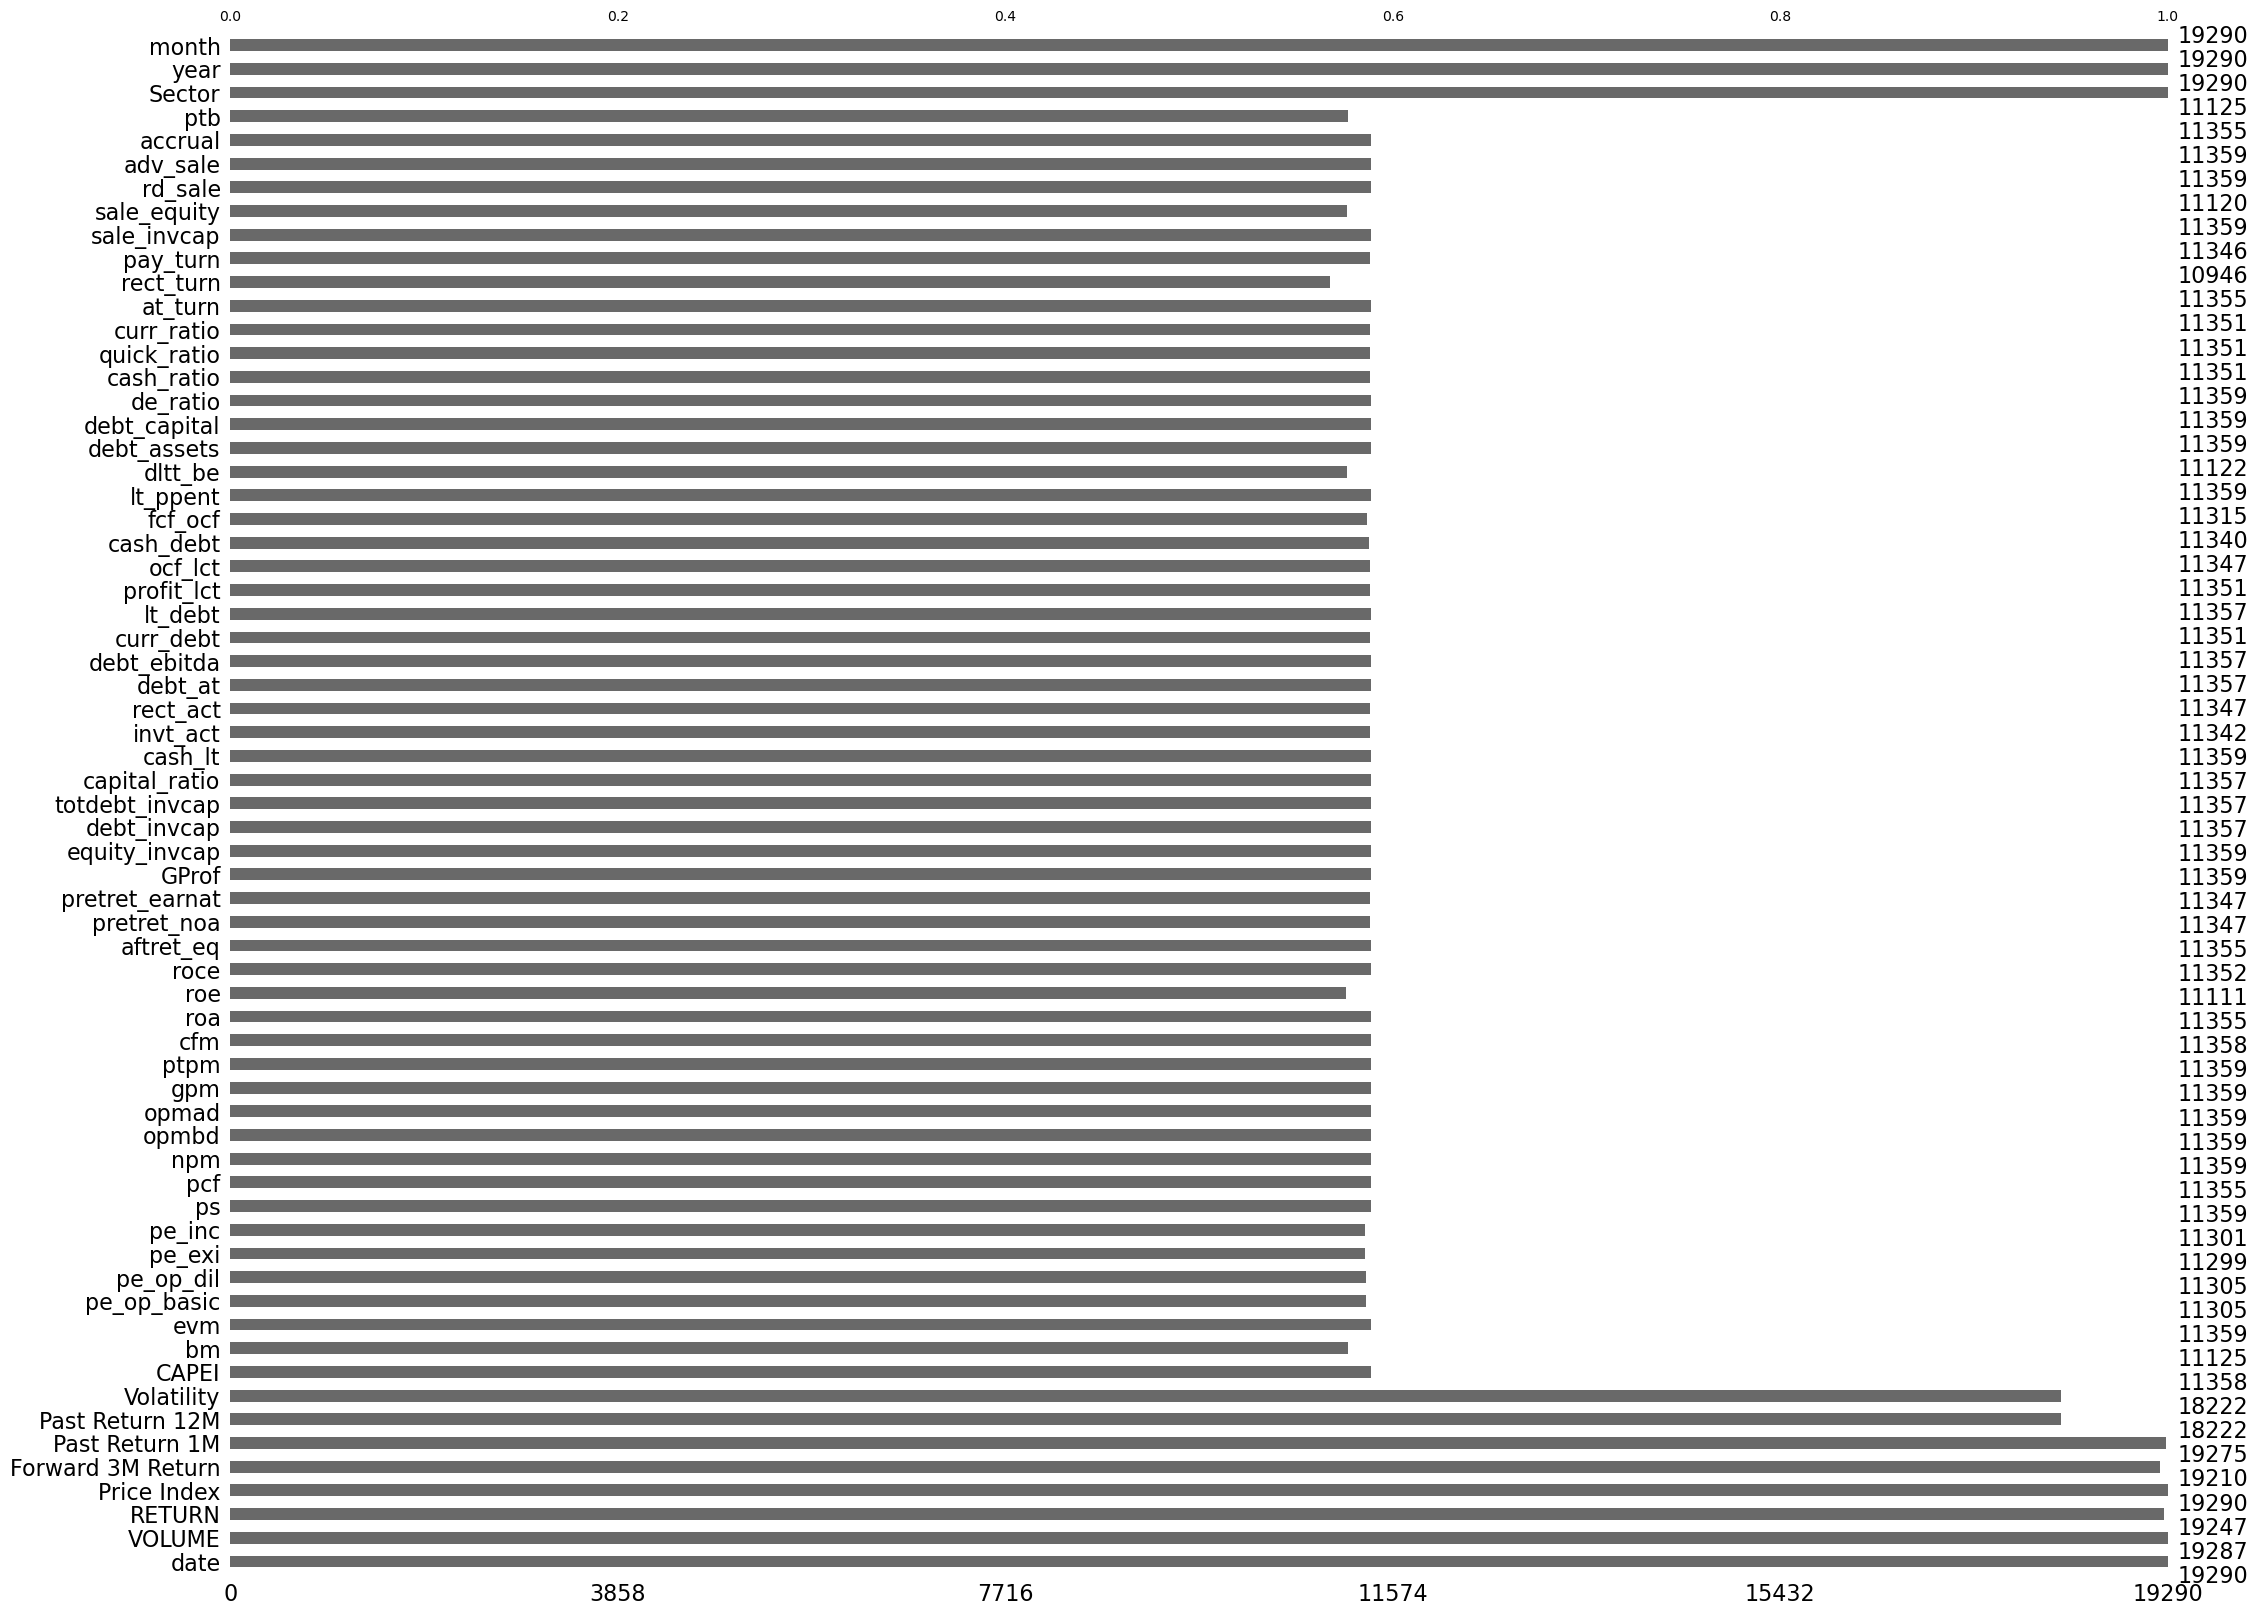

In [48]:
msno.bar(cleaned_model_df1)
plt.show()

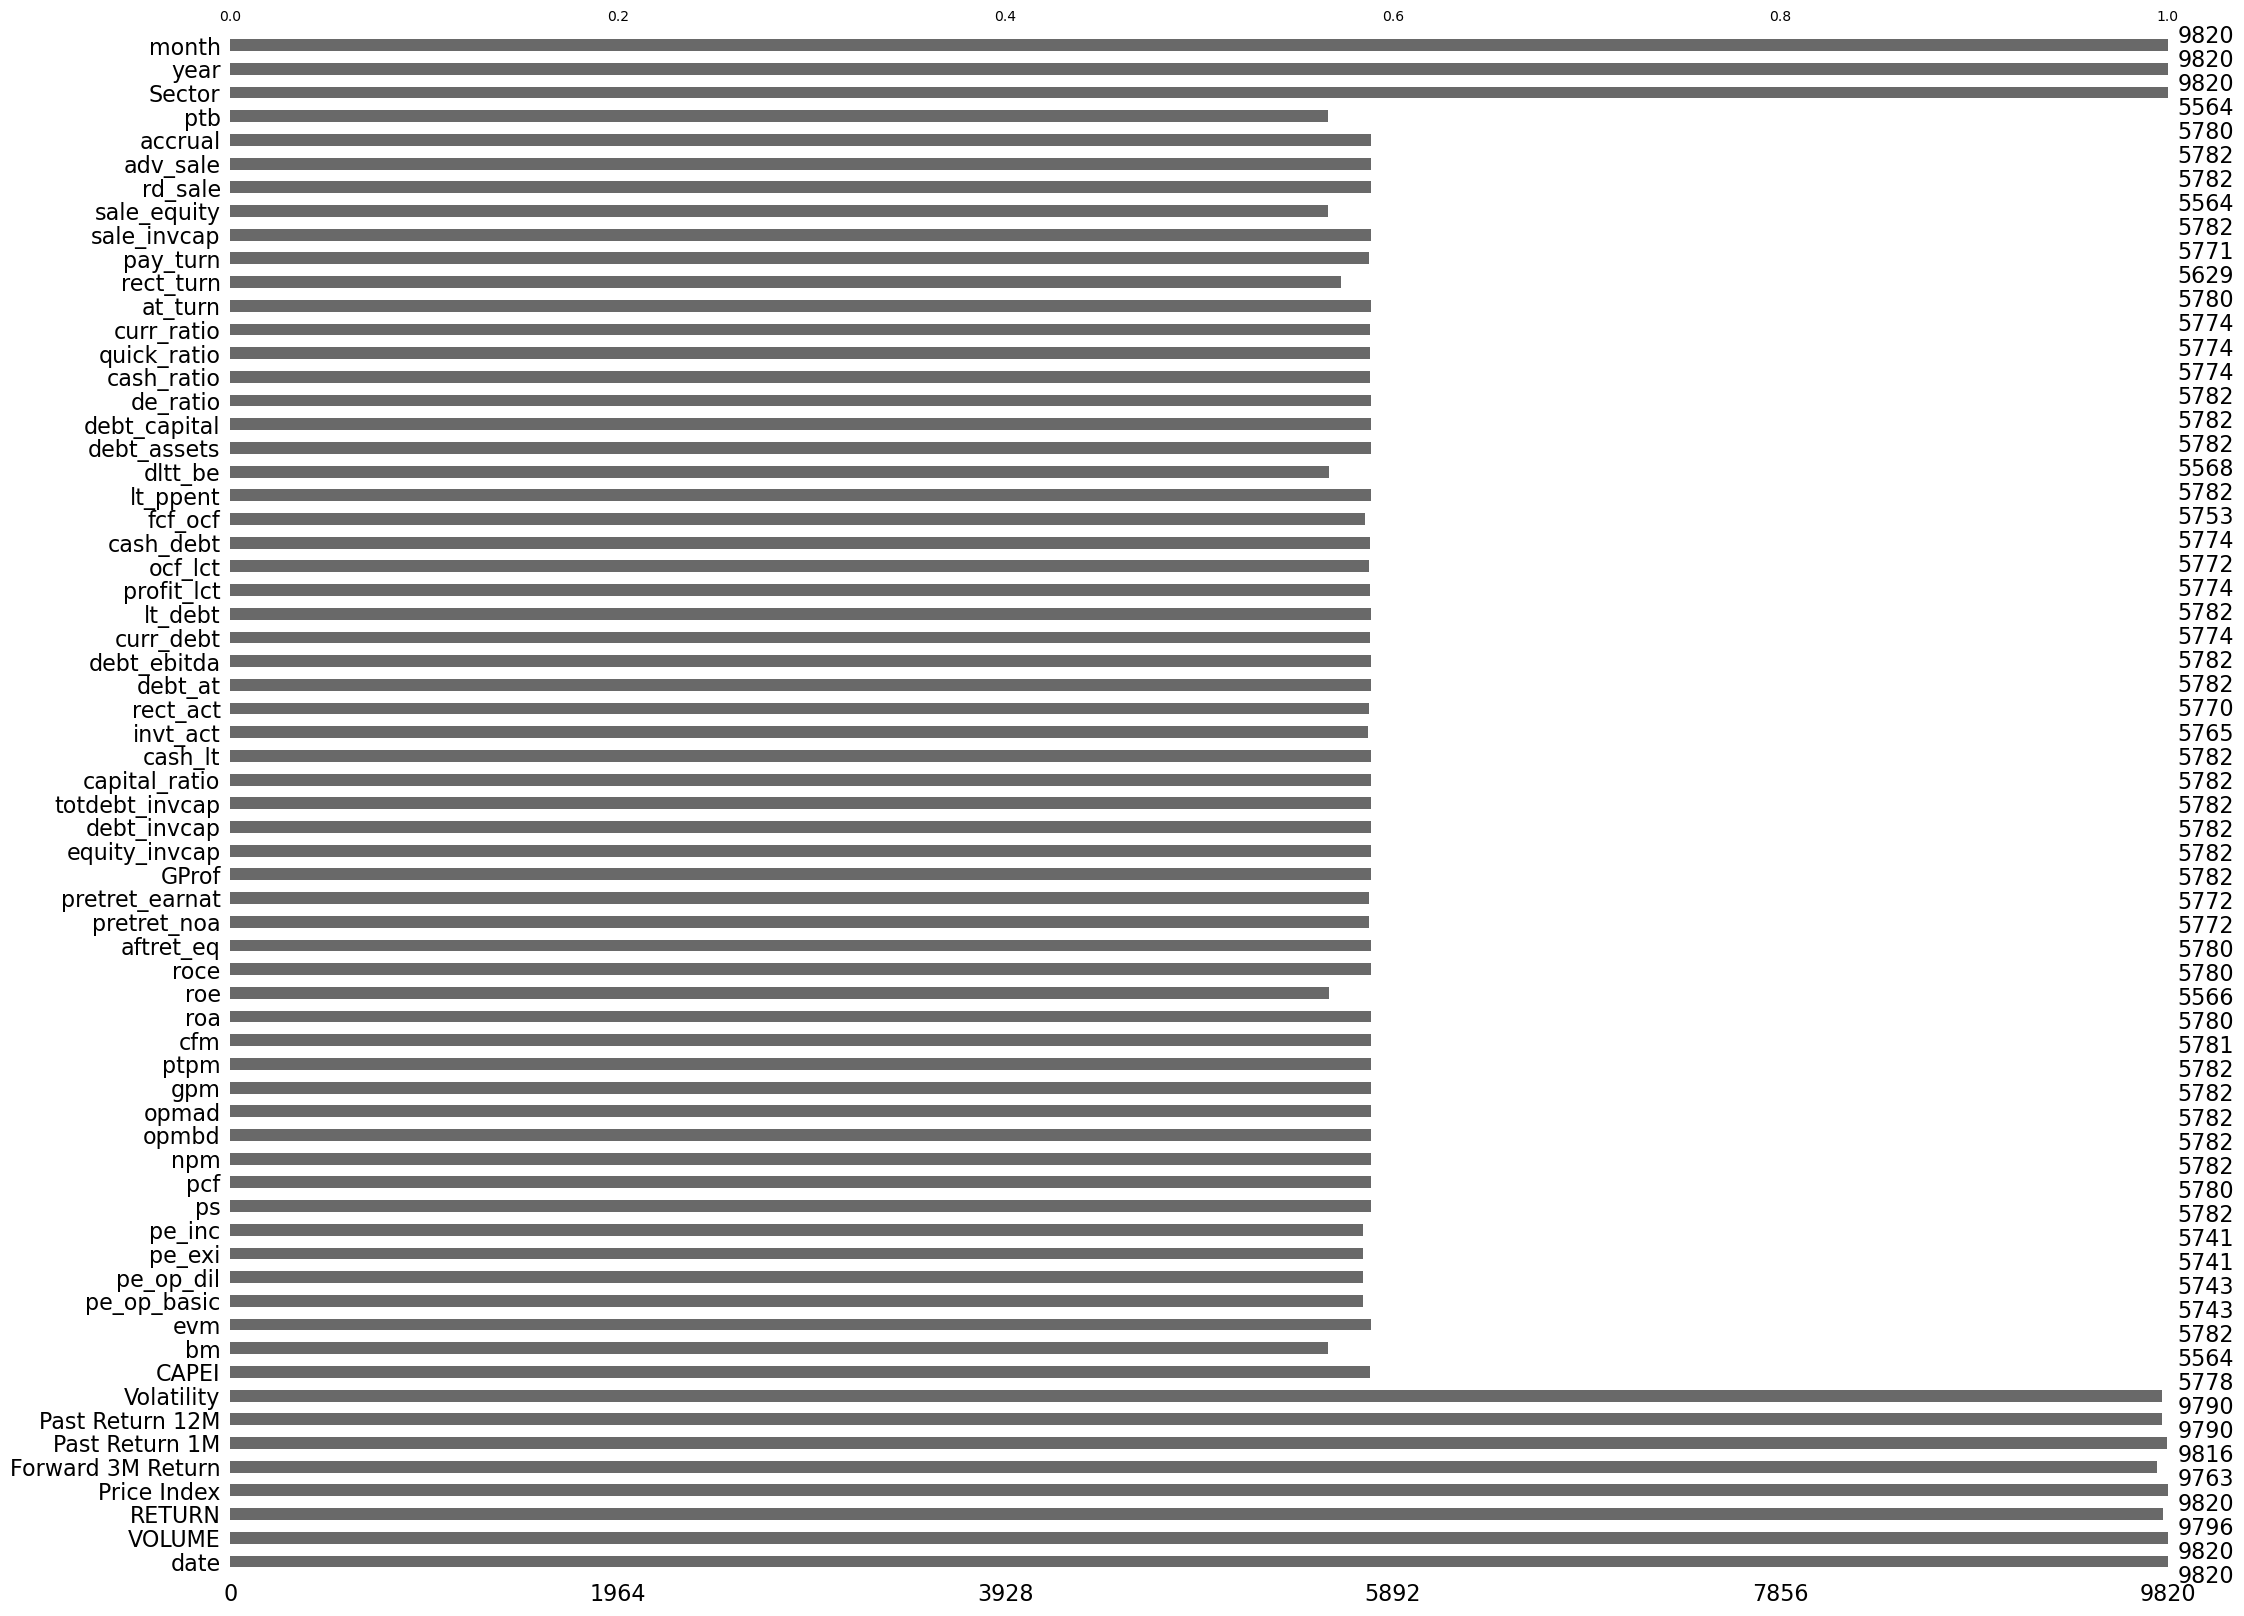

In [49]:
msno.bar(cleaned_model_df2)
plt.show()

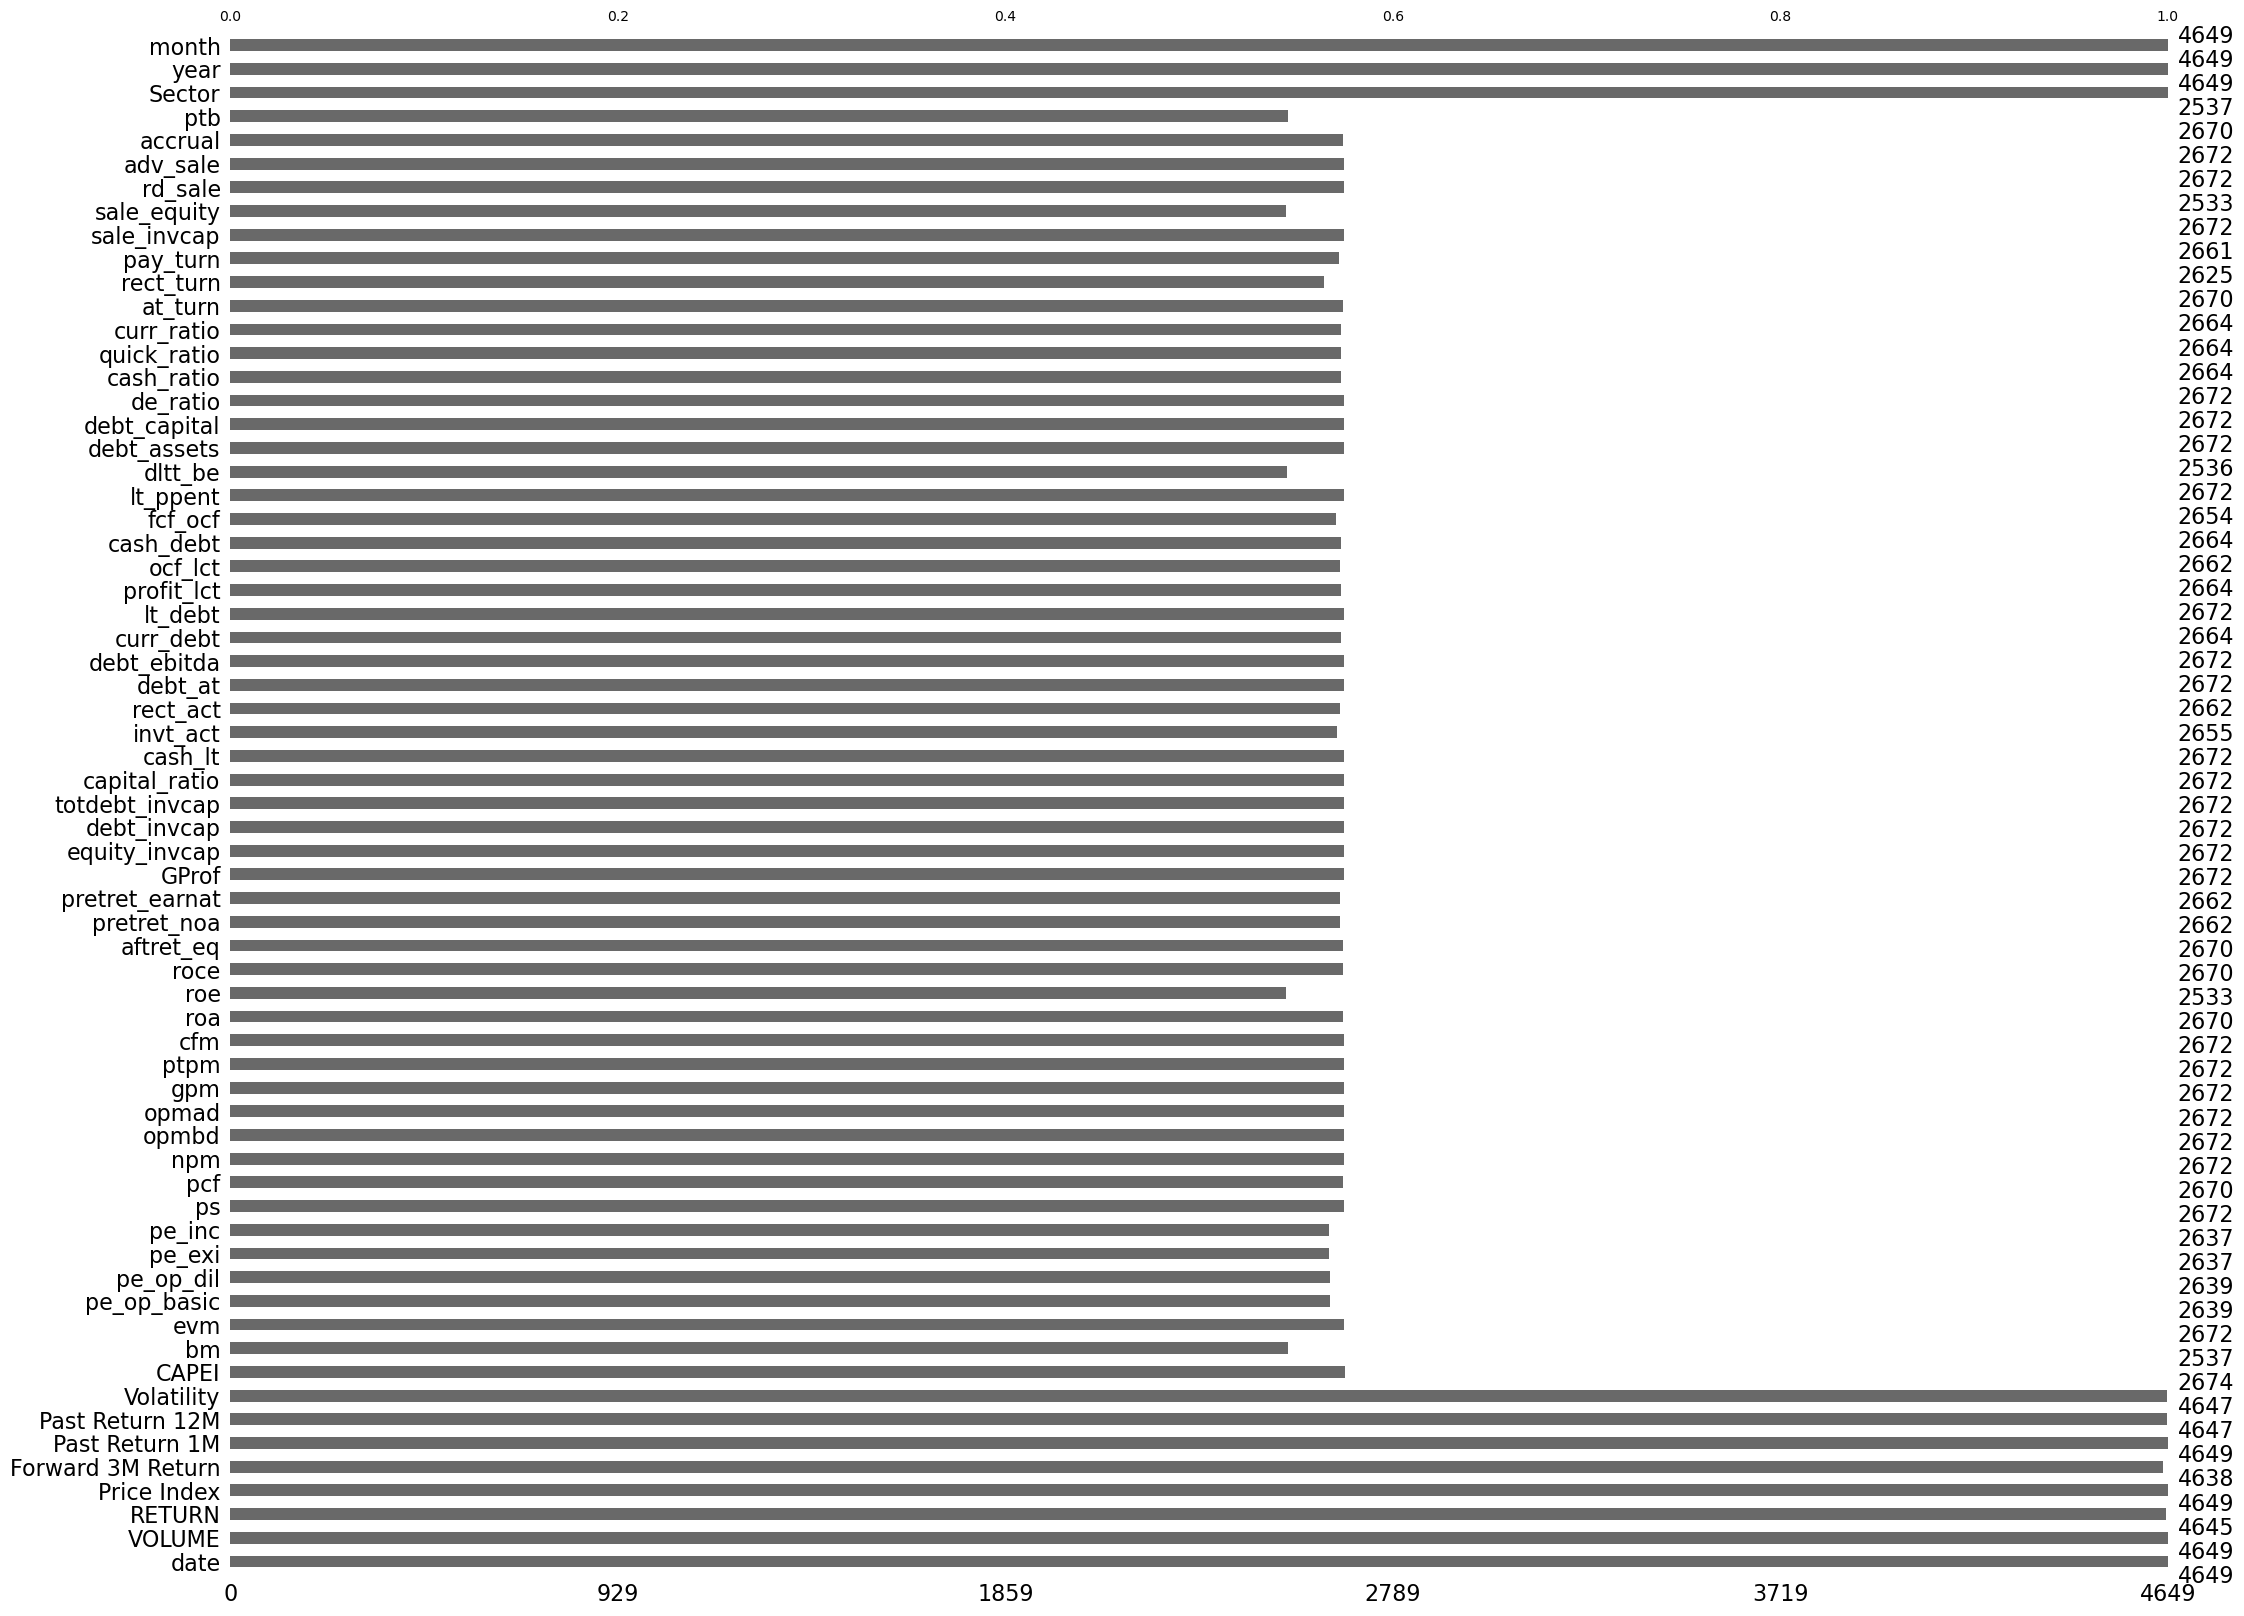

In [50]:
msno.bar(cleaned_model_df3)
plt.show()

In [51]:
cleaned_model_df1=cleaned_model_df1.dropna(subset=['accrual'])

In [52]:
cleaned_model_df2=cleaned_model_df2.dropna(subset=['accrual'])

In [53]:
cleaned_model_df3=cleaned_model_df3.dropna(subset=['accrual'])

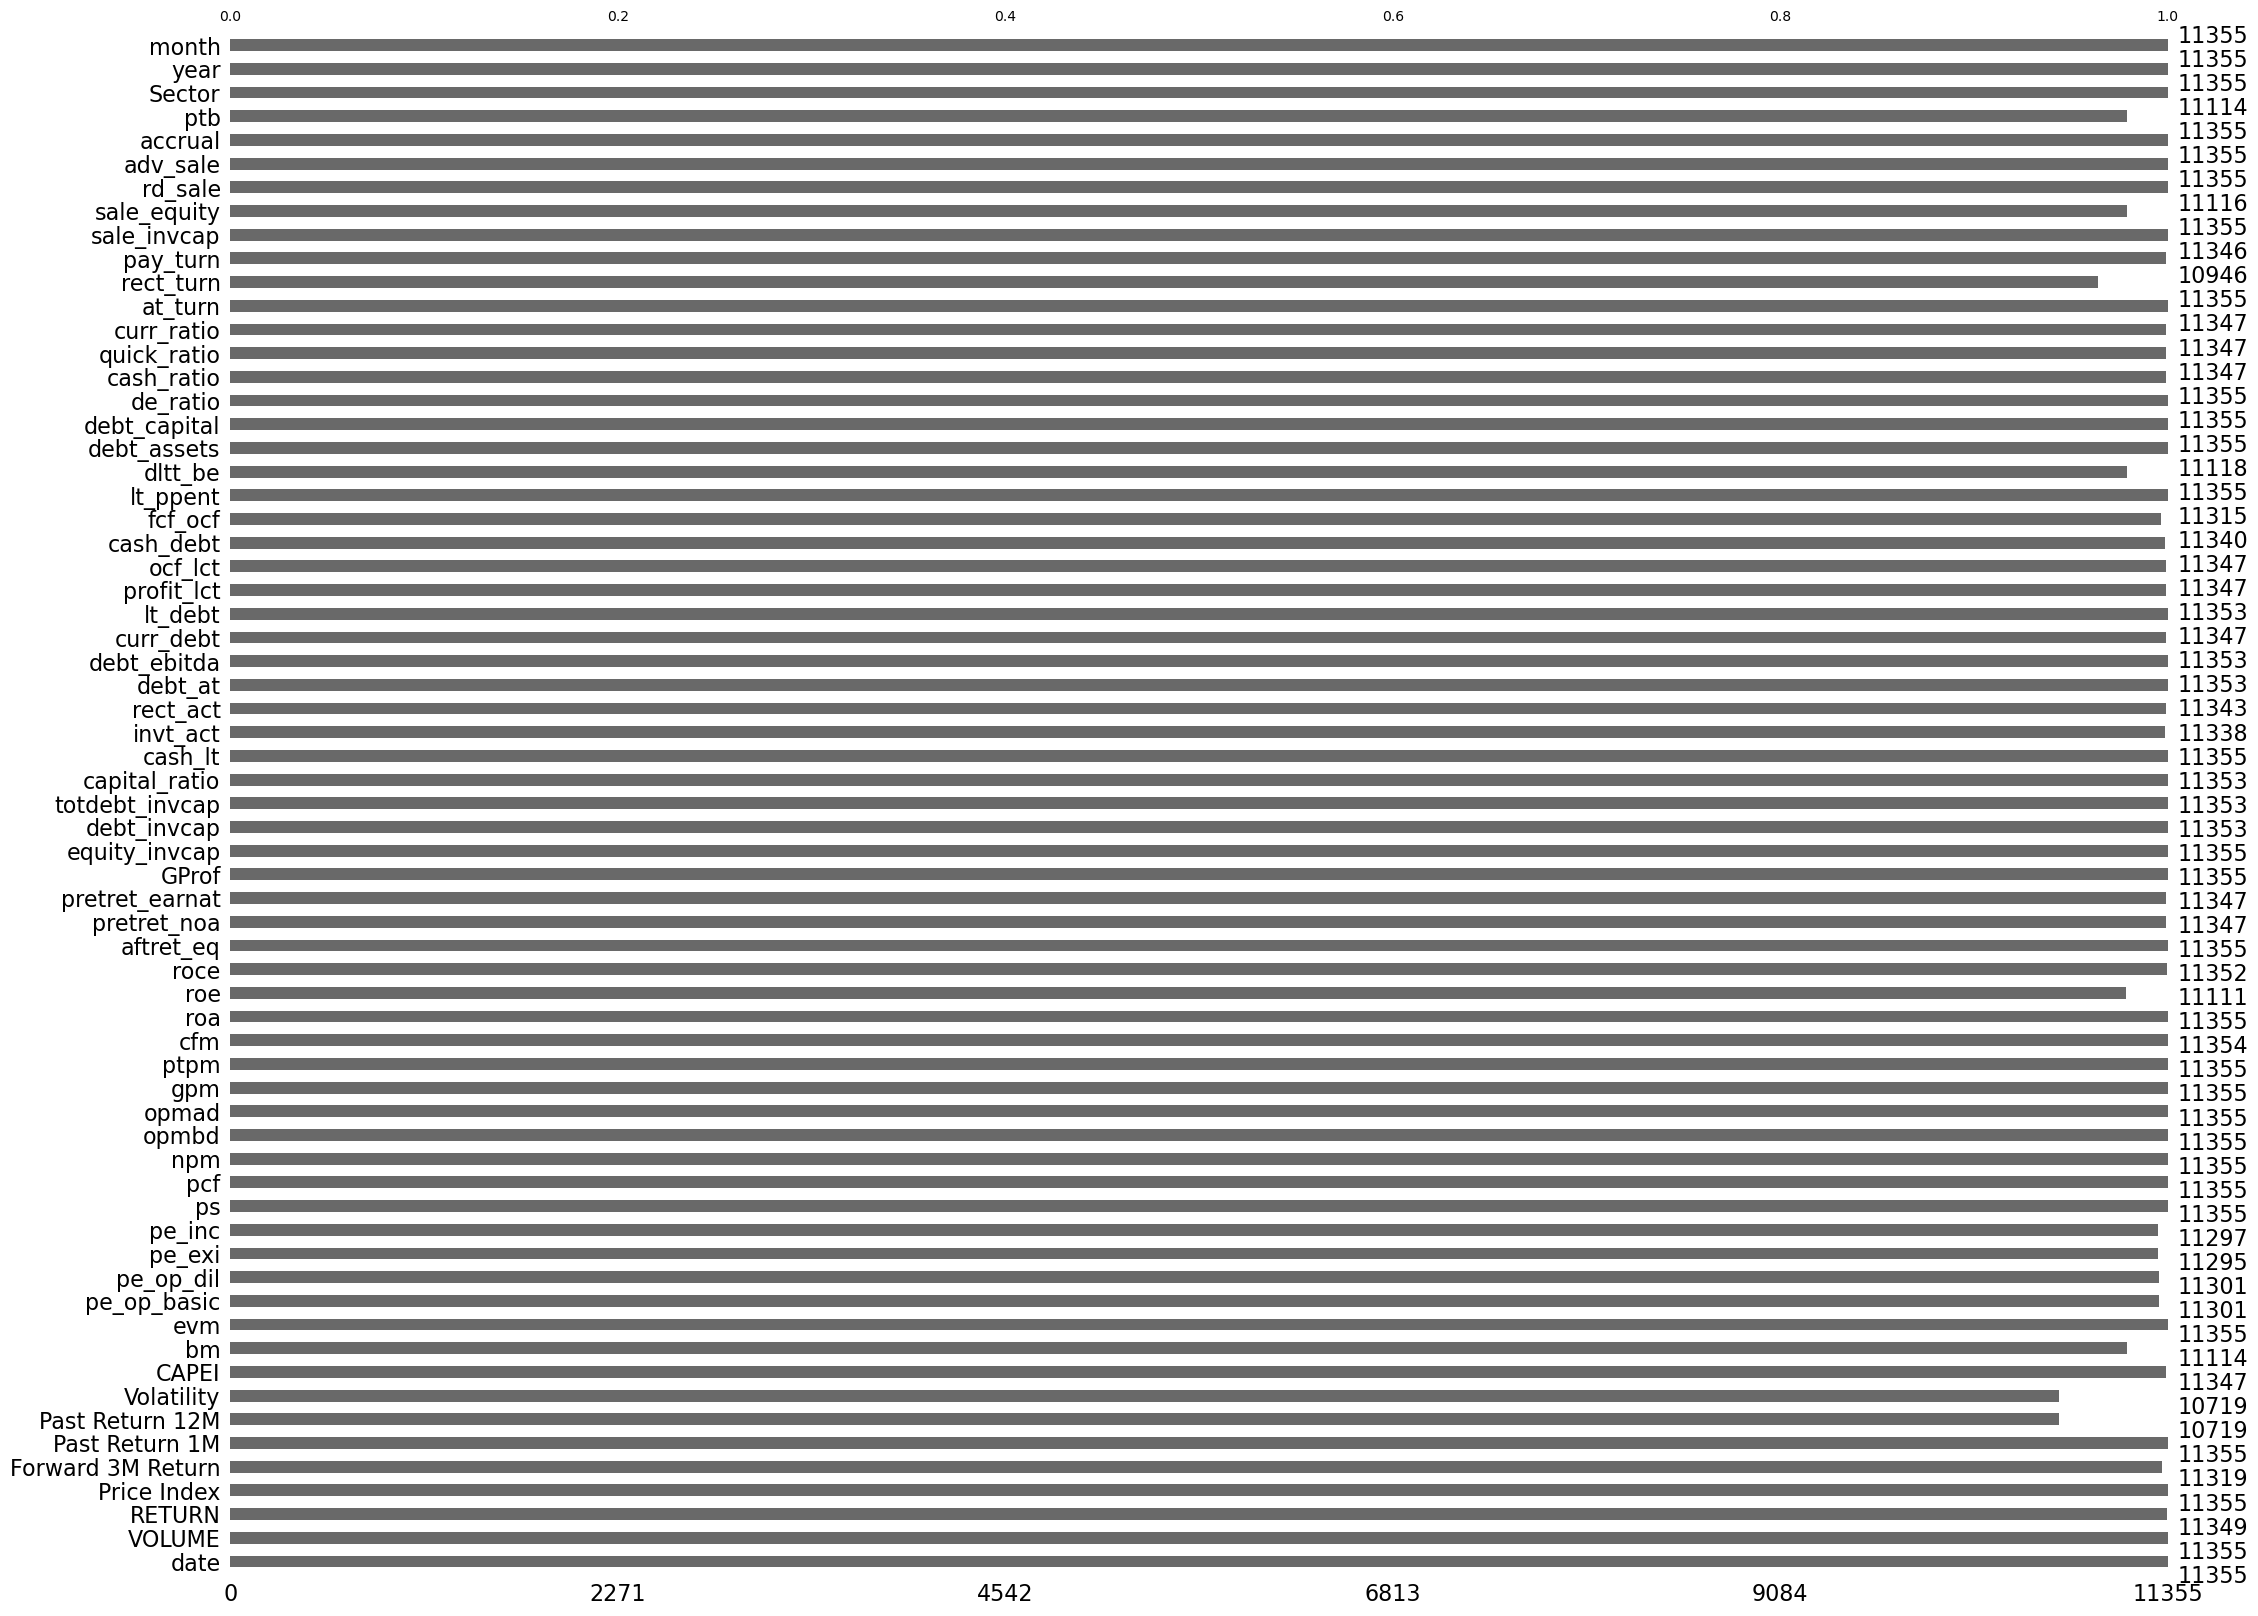

In [54]:
msno.bar(cleaned_model_df1)
plt.show()

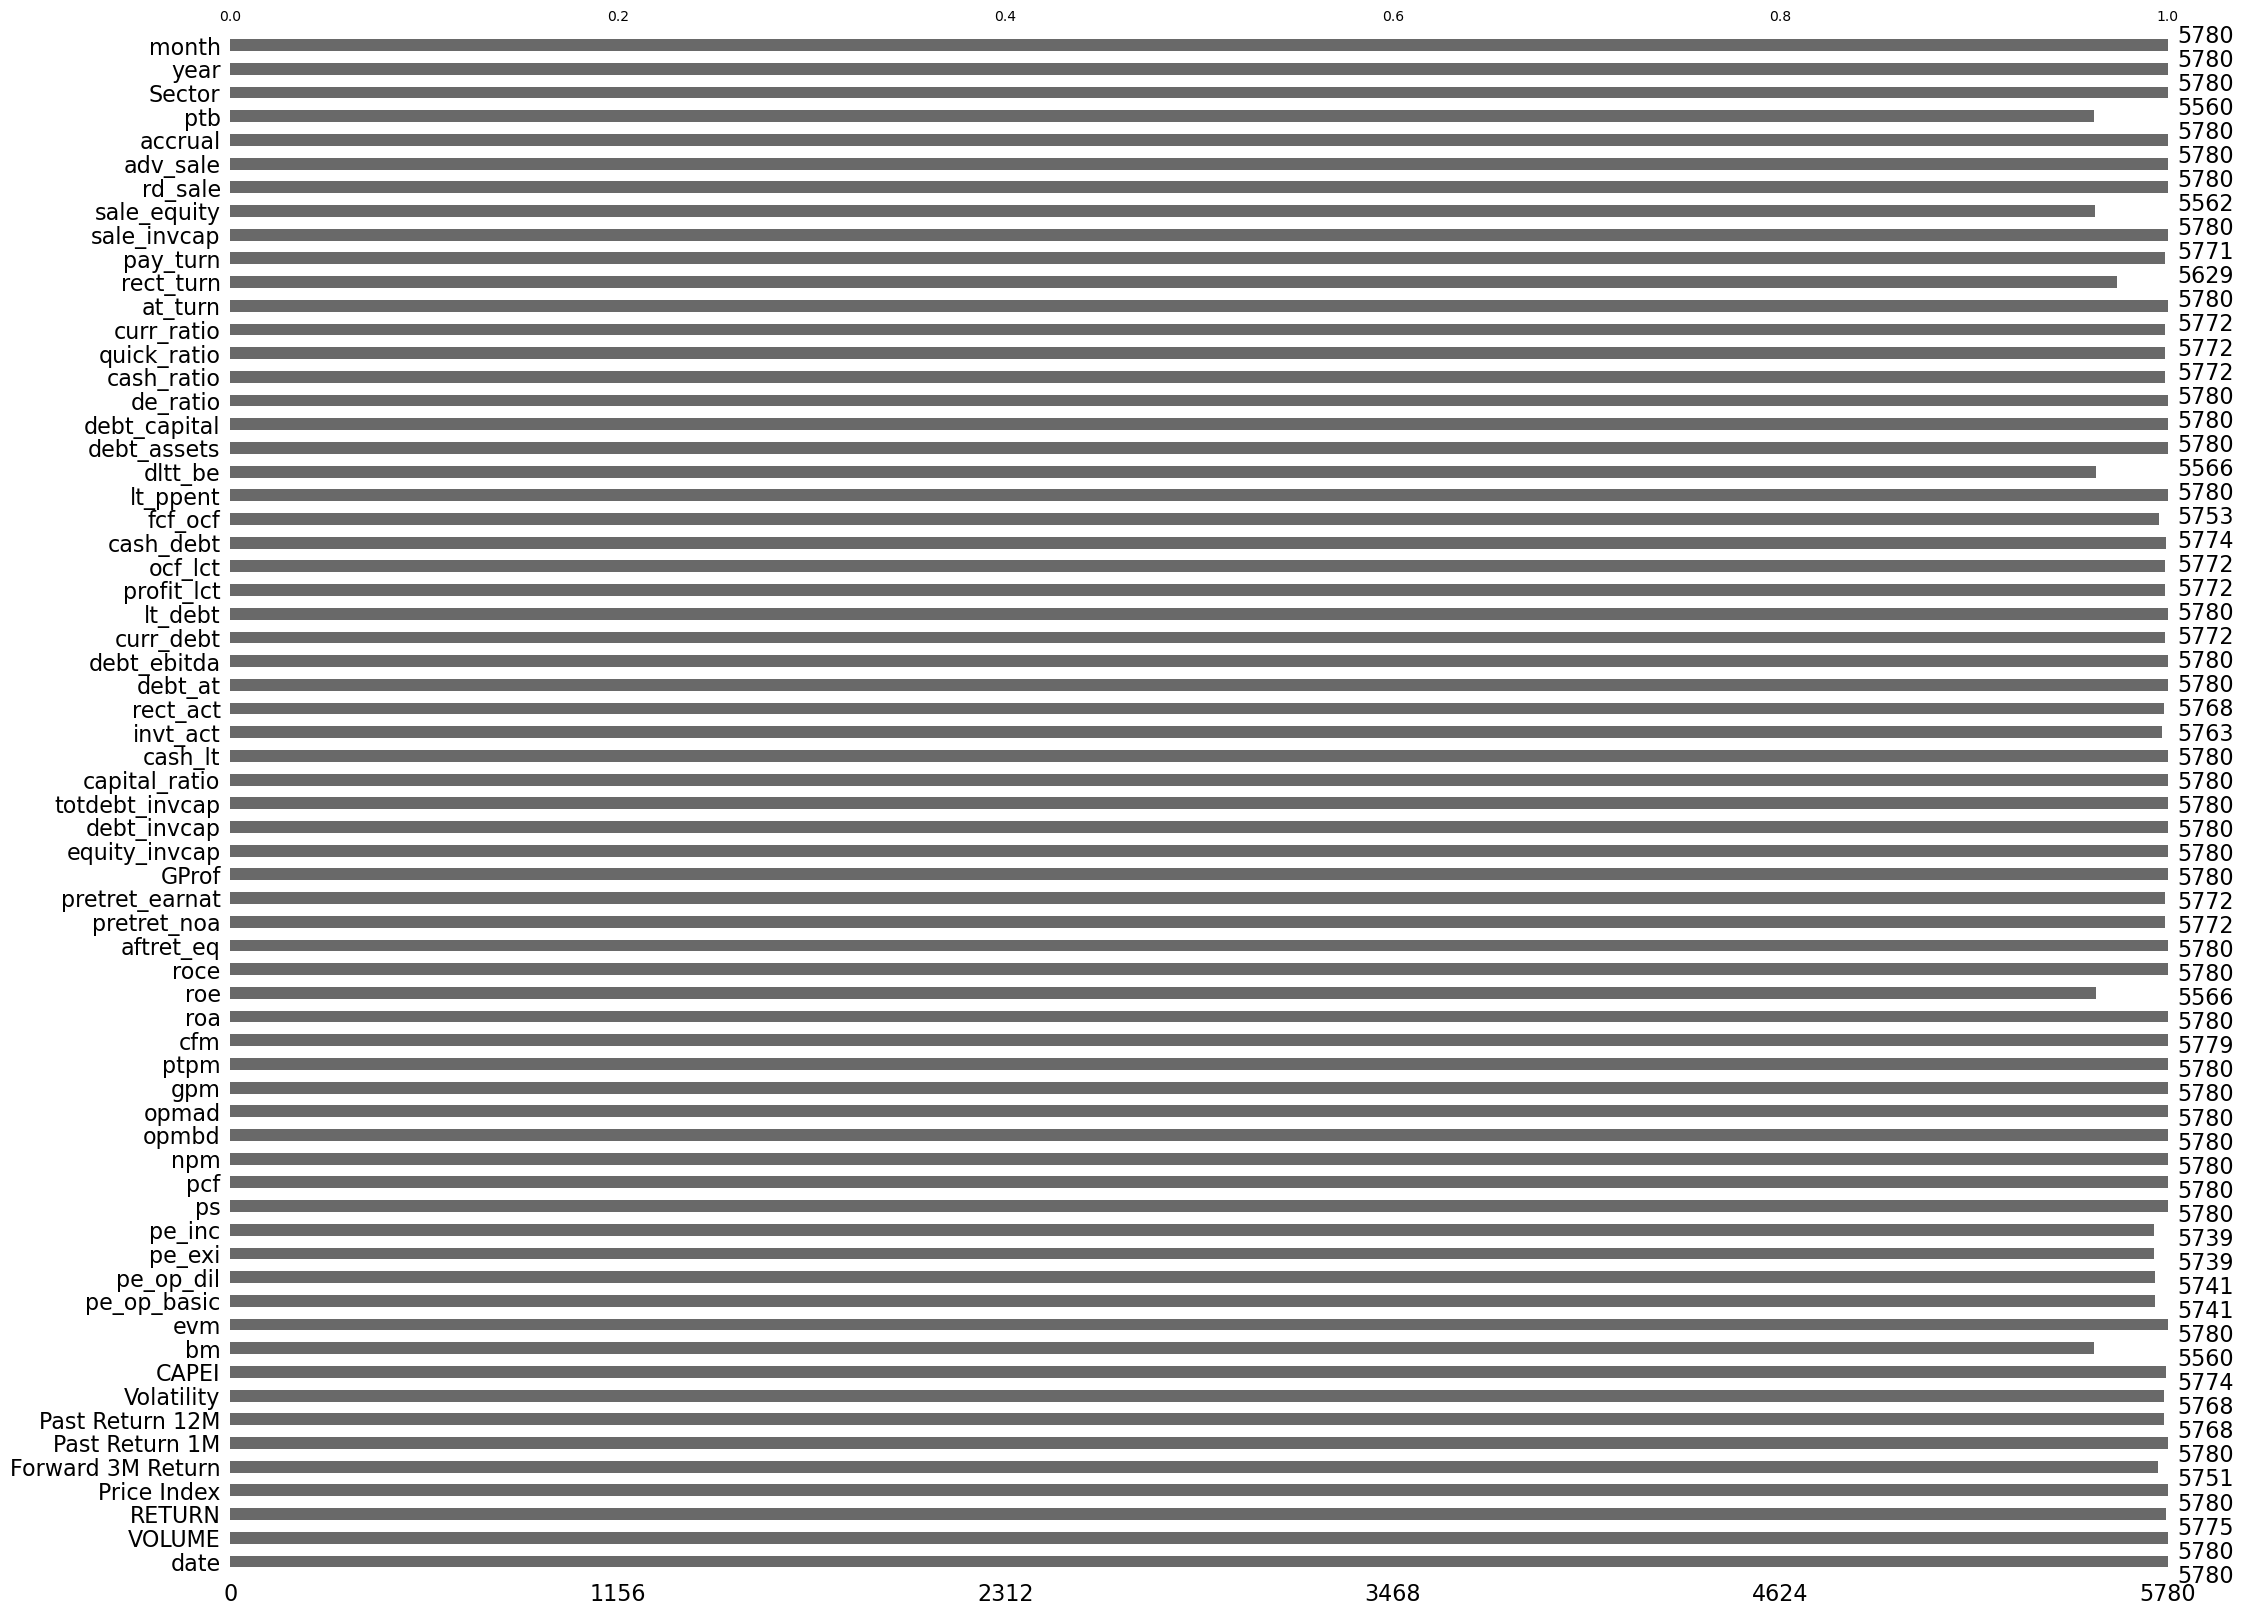

In [55]:
msno.bar(cleaned_model_df2)
plt.show()

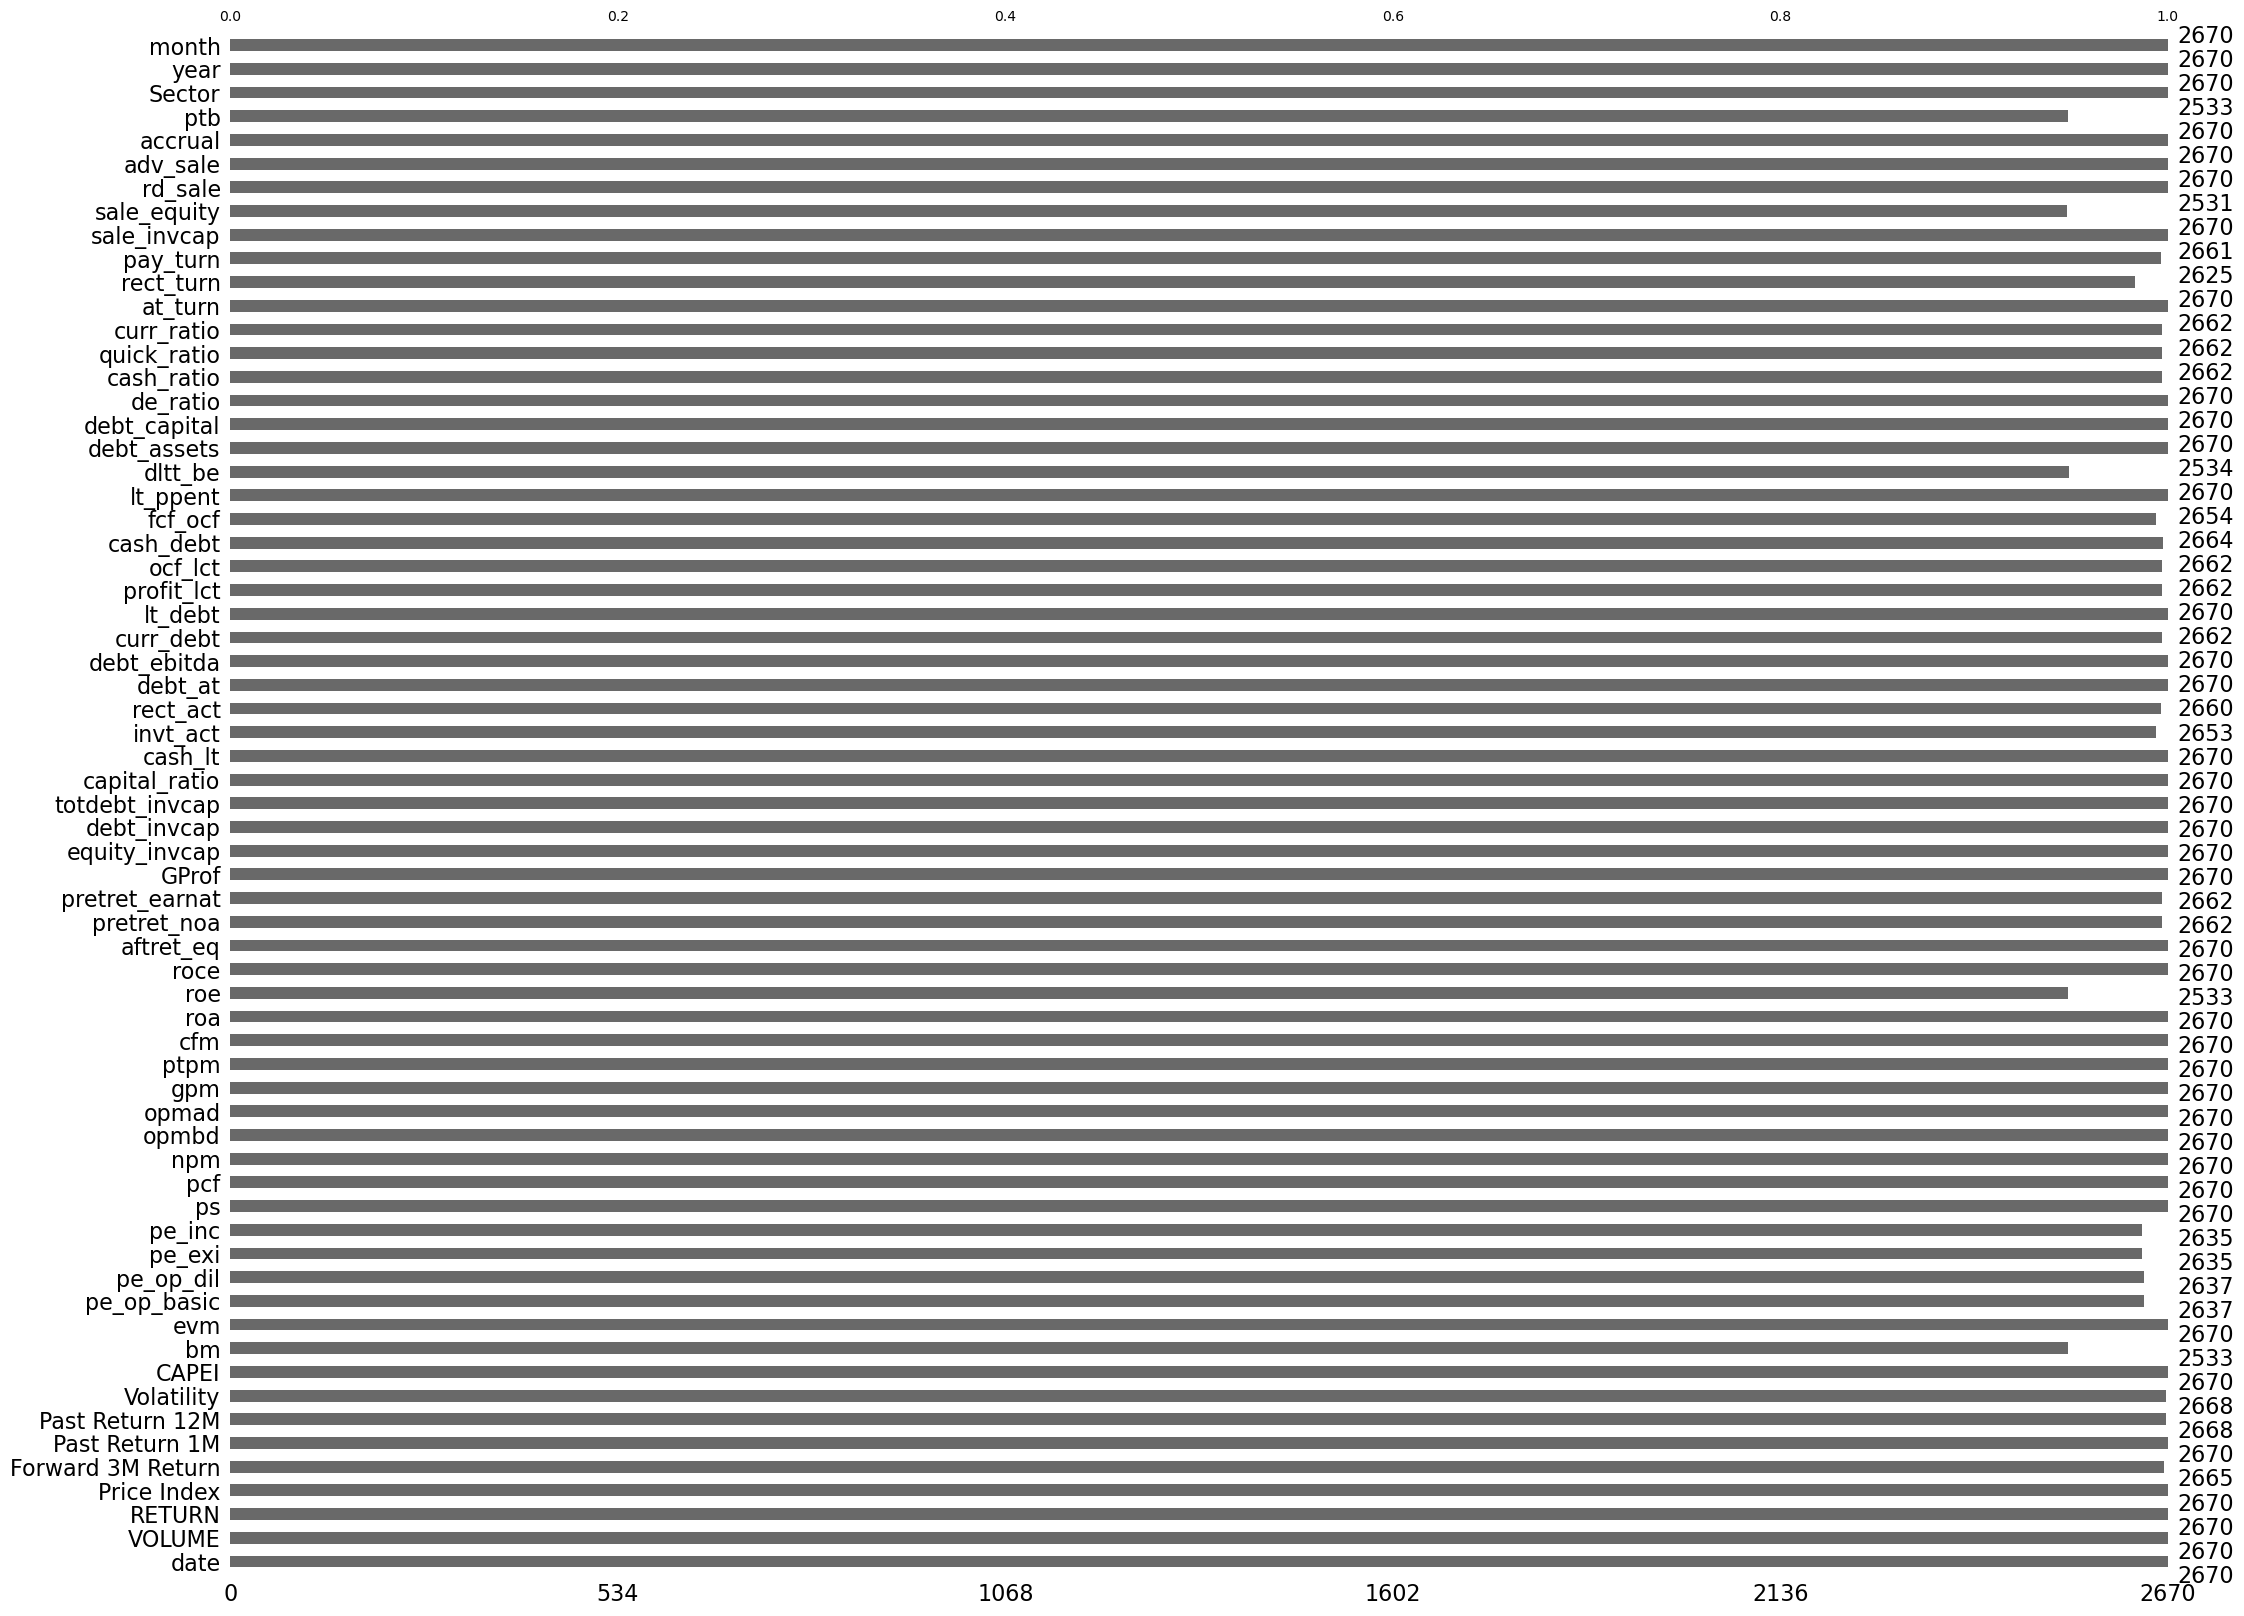

In [56]:
msno.bar(cleaned_model_df3)
plt.show()

In [57]:
# Calculate the percentage of missing values for each column
missing_percentage = (cleaned_model_df1.isnull().sum() / len(cleaned_model_df1)) * 100

# Filter to display only columns with non-zero missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort and display the columns with missing values in descending order
missing_percentage.sort_values(ascending=False)

Past Return 12M      5.601057
Volatility           5.601057
rect_turn            3.601937
roe                  2.148833
ptb                  2.122413
bm                   2.122413
sale_equity          2.104800
dltt_be              2.087186
pe_exi               0.528402
pe_inc               0.510788
pe_op_basic          0.475561
pe_op_dil            0.475561
fcf_ocf              0.352268
Forward 3M Return    0.317041
invt_act             0.149714
cash_debt            0.132100
rect_act             0.105680
pay_turn             0.079260
ocf_lct              0.070454
pretret_noa          0.070454
CAPEI                0.070454
pretret_earnat       0.070454
curr_ratio           0.070454
curr_debt            0.070454
quick_ratio          0.070454
profit_lct           0.070454
cash_ratio           0.070454
RETURN               0.052840
roce                 0.026420
totdebt_invcap       0.017613
lt_debt              0.017613
debt_ebitda          0.017613
debt_at              0.017613
capital_ra

In [58]:
# Calculate the percentage of missing values for each column
missing_percentage = (cleaned_model_df2.isnull().sum() / len(cleaned_model_df2)) * 100

# Filter to display only columns with non-zero missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort and display the columns with missing values in descending order
missing_percentage.sort_values(ascending=False)

ptb                  3.806228
bm                   3.806228
sale_equity          3.771626
dltt_be              3.702422
roe                  3.702422
rect_turn            2.612457
pe_exi               0.709343
pe_inc               0.709343
pe_op_basic          0.674740
pe_op_dil            0.674740
Forward 3M Return    0.501730
fcf_ocf              0.467128
invt_act             0.294118
rect_act             0.207612
Volatility           0.207612
Past Return 12M      0.207612
pay_turn             0.155709
pretret_earnat       0.138408
pretret_noa          0.138408
curr_debt            0.138408
profit_lct           0.138408
ocf_lct              0.138408
cash_ratio           0.138408
quick_ratio          0.138408
curr_ratio           0.138408
cash_debt            0.103806
CAPEI                0.103806
RETURN               0.086505
cfm                  0.017301
dtype: float64

In [59]:
# Calculate the percentage of missing values for each column
missing_percentage = (cleaned_model_df3.isnull().sum() / len(cleaned_model_df3)) * 100

# Filter to display only columns with non-zero missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Sort and display the columns with missing values in descending order
missing_percentage.sort_values(ascending=False)

sale_equity          5.205993
ptb                  5.131086
bm                   5.131086
roe                  5.131086
dltt_be              5.093633
rect_turn            1.685393
pe_exi               1.310861
pe_inc               1.310861
pe_op_basic          1.235955
pe_op_dil            1.235955
invt_act             0.636704
fcf_ocf              0.599251
rect_act             0.374532
pay_turn             0.337079
curr_ratio           0.299625
quick_ratio          0.299625
cash_ratio           0.299625
curr_debt            0.299625
ocf_lct              0.299625
profit_lct           0.299625
pretret_earnat       0.299625
pretret_noa          0.299625
cash_debt            0.224719
Forward 3M Return    0.187266
Past Return 12M      0.074906
Volatility           0.074906
dtype: float64

In [60]:
# Grouping the data by 'year' and applying median imputation for numerical columns within each year group
impuated_model_data1 = cleaned_model_df1.groupby('year').apply(
    lambda group: group.select_dtypes(include=['number']).transform(lambda x: x.fillna(x.mean()))
)

# Resetting the index to match the original DataFrame structure
impuated_model_data1.reset_index(drop=True, inplace=True)

# Display the first few rows of the imputed dataset
impuated_model_data1.head()

VOLUME    RETURN  Price Index  Forward 3M Return  Past Return 1M  \
0   88256.0 -0.019638     1.000000           0.121212       -0.019638   
1   67237.0 -0.029276     0.970724           0.161375       -0.029276   
2  113739.0  0.005291     0.975860           0.316841        0.005291   
3  100806.0  0.148947     1.121212           0.234539        0.148947   
4  118221.0  0.139863     1.285053           0.026378        0.139863   

   Past Return 12M  Volatility   CAPEI     bm    evm  pe_op_basic  pe_op_dil  \
0              NaN         NaN  12.155  0.759  9.000       21.876     21.876   
1              NaN         NaN  14.037  0.696  6.983       16.435     16.579   
2              NaN         NaN  14.127  0.696  6.983       16.522     16.667   
3              NaN         NaN  16.231  0.696  6.983       18.983     19.149   
4              NaN         NaN  16.268  0.726  7.437       20.508     20.678   

   pe_exi  pe_inc     ps    pcf    npm  opmbd  opmad    gpm   ptpm    cfm  \
0  21.876  31.918  0.501  4.831  0.023  0.090  0.046  0.268  0.035  0.066   
1  16.579  21.977  0.459  4.126  0.028  0.093  0.053  0.272  0.044  0.068   
2  16.667  22.093  0.462  4.152  0.028  0.093  0.053  0.272  0.044  0.068   
3  19.149  25.384  0.531  4.770  0.028  0.093  0.053  0.272  0.044  0.068   
4  24.291  24.291  0.598  6.687  0.025  0.093  0.054  0.271  0.039  0.064   

     roa    roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
0  0.096  0.059  0.090      0.070        0.116           0.069  0.286   
1  0.105  0.081  0.113      0.094        0.143           0.084  0.296   
2  0.105  0.081  0.113      0.094        0.143           0.084  0.296   
3  0.105  0.081  0.113      0.094        0.143           0.084  0.296   
4  0.105  0.069  0.113      0.080        0.141           0.085  0.302   

   equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
0          0.663        0.337           0.359          0.337    0.113   
1          0.651        0.349           0.366          0.349    0.152   
2          0.651        0.349           0.366          0.349    0.152   
3          0.651        0.349           0.366          0.349    0.152   
4          0.662        0.338           0.357          0.338    0.150   

   invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  profit_lct  \
0     0.343     0.277    0.194        2.030      0.445    0.285       0.336   
1     0.329     0.245    0.182        1.792      0.436    0.256       0.343   
2     0.329     0.245    0.182        1.792      0.436    0.256       0.343   
3     0.329     0.245    0.182        1.792      0.436    0.256       0.343   
4     0.323     0.263    0.185        1.790      0.441    0.267       0.358   

   ocf_lct  cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  debt_capital  \
0    0.388      0.162    0.713     2.670    0.434        0.641         0.426   
1    0.411      0.179    0.727     2.908    0.473        0.677         0.452   
2    0.411      0.179    0.727     2.908    0.473        0.677         0.452   
3    0.411      0.179    0.727     2.908    0.473        0.677         0.452   
4    0.344      0.179    0.656     2.843    0.444        0.657         0.436   

   de_ratio  cash_ratio  quick_ratio  curr_ratio  at_turn  rect_turn  \
0     1.783       0.255        1.094       1.665    1.066      8.108   
1     2.092       0.349        1.107       1.651    1.131      9.328   
2     2.092       0.349        1.107       1.651    1.131      9.328   
3     2.092       0.349        1.107       1.651    1.131      9.328   
4     1.912       0.340        1.148       1.698    1.115      8.627   

   pay_turn  sale_invcap  sale_equity  rd_sale  adv_sale  accrual    ptb  \
0    10.899        1.967        2.965    0.027     0.020   -0.086  1.219   
1    10.651        2.195        3.369    0.028     0.015   -0.094  1.368   
2    10.651        2.195        3.369    0.028     0.015   -0.094  1.376   
3    10.651        2.195        3.369    0.028     

In [61]:
# Grouping the data by 'year' and applying median imputation for numerical columns within each year group
impuated_model_data2 = cleaned_model_df2.groupby('year').apply(
    lambda group: group.select_dtypes(include=['number']).transform(lambda x: x.fillna(x.mean()))
)

# Resetting the index to match the original DataFrame structure
impuated_model_data2.reset_index(drop=True, inplace=True)

# Display the first few rows of the imputed dataset
impuated_model_data2.head()

VOLUME    RETURN  Price Index  Forward 3M Return  Past Return 1M  \
0   211104.0  0.042422     1.366498           0.535828        0.042422   
1   177433.0  0.094532     1.495675           0.414047        0.094532   
2   175660.0  0.128832     1.688366           0.176349        0.128832   
3  2938444.0 -0.019773     2.388819           0.008349       -0.019773   
4  2614656.0  0.026762     2.452749           0.021097        0.026762   

   Past Return 12M  Volatility   CAPEI     bm     evm  pe_op_basic  pe_op_dil  \
0         0.339374    0.367497  -8.117  0.122   7.455       14.297     14.836   
1         0.386682    0.300771  -8.916  0.134   7.521       14.082     14.559   
2         0.613868    0.314027 -10.065  0.134   7.521       15.896     16.435   
3         0.118236    0.138034  21.167  0.212  14.929        9.318      9.558   
4         0.158677    0.138949  21.137  0.226  15.257       18.819     19.249   

   pe_exi  pe_inc     ps     pcf    npm  opmbd  opmad    gpm   ptpm    cfm  \
0  18.872  22.255  0.573  39.722  0.032  0.090  0.064  0.267  0.034  0.053   
1  17.896  25.019  0.627  20.132  0.036  0.096  0.070  0.275  0.041  0.052   
2  20.201  28.243  0.708  22.725  0.036  0.096  0.070  0.275  0.041  0.052   
3   9.836   9.836  3.510  16.659  0.184  0.274  0.233  0.644  0.242  0.226   
4  19.750  19.750  3.573  16.176  0.185  0.274  0.232  0.646  0.245  0.228   

     roa    roe   roce  aftret_eq  pretret_noa  pretret_earnat  GProf  \
0  0.128  0.539  0.279      0.905        0.208           0.115  0.386   
1  0.138  0.672  0.321      1.162        0.232           0.128  0.400   
2  0.138  0.672  0.321      1.162        0.232           0.128  0.400   
3  0.160  0.230  0.178      0.263        0.640           0.263  0.370   
4  0.158  0.237  0.176      0.271        0.633           0.259  0.367   

   equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
0          0.144        0.856           0.862          0.856    0.184   
1          0.148        0.852           0.860          0.852    0.180   
2          0.148        0.852           0.860          0.852    0.180   
3          0.679        0.314           0.634          0.316    0.317   
4          0.670        0.323           0.644          0.325    0.317   

   invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  profit_lct  \
0     0.375     0.285    0.272        2.081      0.371    0.283       0.369   
1     0.383     0.288    0.263        1.892      0.374    0.273       0.390   
2     0.383     0.288    0.263        1.892      0.374    0.273       0.390   
3     0.120     0.182    0.367        2.334      0.507    0.301       0.514   
4     0.121     0.180    0.372        2.393      0.502    0.306       0.509   

   ocf_lct  cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  debt_capital  \
0    0.059      0.036   -0.815     4.181    3.451        0.955         0.897   
1    0.127      0.036    0.121     4.181    3.328        0.955         0.896   
2    0.127      0.036    0.121     4.181    3.328        0.955         0.896   
3    0.396      0.197    0.697     3.329    0.403        0.603         0.541   
4    0.410      0.197    0.717     3.360    0.418        0.609         0.546   

   de_ratio  cash_ratio  quick_ratio  curr_ratio  at_turn  rect_turn  \
0    21.067       0.496        0.996       1.594    1.446      8.989   
1    21.088       0.482        0.987       1.599    1.455      8.863   
2    21.088       0.482        0.987       1.599    1.455      8.863   
3     1.535       0.625        0.966       1.097    0.575      9.379   
4     1.572       0.632        0.965       1.097    0.567      9.420   

   pay_turn  sale_invcap  sale_equity  rd_sale  adv_sale  accrual    ptb  \
0     8.679        4.585       31.918    0.027      0.01    0.024  8.705   
1     8.486        4.751       32.148    0.027      0.01    0.008  8.520   
2     8.486        4.751       32.148    0.027      0.01    0.008  9.617   
3     2.190        0.993        1.

In [62]:
# Grouping the data by 'year' and applying median imputation for numerical columns within each year group
impuated_model_data3 = cleaned_model_df3.groupby('year').apply(
    lambda group: group.select_dtypes(include=['number']).transform(lambda x: x.fillna(x.mean()))
)

# Resetting the index to match the original DataFrame structure
impuated_model_data3.reset_index(drop=True, inplace=True)

# Display the first few rows of the imputed dataset
impuated_model_data3.head()

VOLUME    RETURN  Price Index  Forward 3M Return  Past Return 1M  \
0   296280.0 -0.095051     3.072906           0.243741       -0.095051   
1   284465.0  0.096545     3.369580           0.036857        0.096545   
2  2184148.0 -0.038048     0.832055           0.166509       -0.038048   
3  1372955.0  0.088357     0.905573           0.006529        0.088357   
4   855950.0 -0.010769     3.941484           0.098895       -0.010769   

   Past Return 12M  Volatility    CAPEI     bm     evm  pe_op_basic  \
0         0.178611    0.324066   14.005  0.278   9.086       14.767   
1         0.118015    0.310158   14.787  0.320   9.334       16.043   
2         0.211048    0.188861  -77.091  0.504  12.148       24.881   
3         0.201443    0.200404 -112.590  0.487  12.066       32.808   
4         0.057454    0.116192   24.910  0.102  12.505       22.179   

   pe_op_dil  pe_exi  pe_inc     ps     pcf    npm  opmbd  opmad    gpm  \
0     14.941  16.079  16.079  0.958  11.718  0.061  0.130  0.106  0.292   
1     16.232  17.855  17.855  1.025  12.198  0.059  0.128  0.104  0.290   
2     25.080  18.550  18.550  1.743   9.698  0.094  0.234  0.143  0.426   
3     33.126  33.782  33.782  1.812   9.673  0.055  0.237  0.145  0.427   
4     22.359  23.354  23.354  2.476  16.121  0.108  0.197  0.160  0.585   

    ptpm    cfm    roa    roe   roce  aftret_eq  pretret_noa  pretret_earnat  \
0  0.084  0.084  0.186  0.200  0.265      0.200        0.363           0.215   
1  0.082  0.083  0.184  0.191  0.258      0.191        0.354           0.210   
2  0.121  0.203  0.087  0.113  0.078      0.161        0.082           0.073   
3  0.096  0.164  0.089  0.066  0.080      0.093        0.084           0.074   
4  0.141  0.146  0.169  0.405  0.209      0.576        0.445           0.234   

   GProf  equity_invcap  debt_invcap  totdebt_invcap  capital_ratio  cash_lt  \
0  0.415          0.770        0.230           0.233          0.230    0.227   
1  0.412          0.775        0.225           0.228          0.225    0.220   
2  0.157          0.275        0.561           0.566          0.671    0.084   
3  0.160          0.274        0.559           0.569          0.671    0.090   
4  0.495          0.281        0.715           0.893          0.717    0.255   

   invt_act  rect_act  debt_at  debt_ebitda  curr_debt  lt_debt  profit_lct  \
0     0.454     0.282    0.135        0.733      0.525    0.241       0.635   
1     0.462     0.282    0.133        0.731      0.532    0.239       0.623   
2     0.044     0.220    0.462        5.387      0.128    0.714       1.048   
3     0.042     0.210    0.463        5.233      0.134    0.708       1.026   
4     0.115     0.261    0.503        3.016      0.340    0.480       0.585   

   ocf_lct  cash_debt  fcf_ocf  lt_ppent  dltt_be  debt_assets  debt_capital  \
0    0.401      0.229    0.448     2.828    0.298        0.553         0.361   
1    0.409      0.229    0.459     2.721    0.290        0.548         0.358   
2    0.806      0.085   -0.164     0.978    1.454        0.641         0.677   
3    0.812      0.085   -0.037     0.975    1.450        0.642         0.679   
4    0.455      0.165    0.692     3.794    1.809        0.839         0.806   

   de_ratio  cash_ratio  quick_ratio  curr_ratio  at_turn  rect_turn  \
0     1.236       0.432        0.976       1.787    1.422      9.737   
1     1.212       0.413        0.956       1.779    1.420      9.727   
2     2.858       0.655        0.943       0.986    0.367     20.629   
3     2.881       0.670        0.944       0.985    0.374     21.021   
4     5.275       0.749        1.145       1.294    0.845      8.783   

   pay_turn  sale_invcap  sale_equity  rd_sale  adv_sale  accrual    ptb  \
0     8.686        2.450        3.181    0.030     0.006   -0.029  2.903   
1     8.688        2.436        3.141    0.030     0.006   -0.035  3.091   
2    26.576        0.450        1.636    0.000     0.018   -0.032  1.988   
3    27.035        0.460    

In [63]:
impuated_model_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11355 entries, 0 to 11354
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VOLUME             11355 non-null  float64
 1   RETURN             11355 non-null  float64
 2   Price Index        11355 non-null  float64
 3   Forward 3M Return  11355 non-null  float64
 4   Past Return 1M     11355 non-null  float64
 5   Past Return 12M    10748 non-null  float64
 6   Volatility         10748 non-null  float64
 7   CAPEI              11355 non-null  float64
 8   bm                 11355 non-null  float64
 9   evm                11355 non-null  float64
 10  pe_op_basic        11355 non-null  float64
 11  pe_op_dil          11355 non-null  float64
 12  pe_exi             11355 non-null  float64
 13  pe_inc             11355 non-null  float64
 14  ps                 11355 non-null  float64
 15  pcf                11355 non-null  float64
 16  npm                113

In [64]:
impuated_model_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VOLUME             5780 non-null   float64
 1   RETURN             5780 non-null   float64
 2   Price Index        5780 non-null   float64
 3   Forward 3M Return  5780 non-null   float64
 4   Past Return 1M     5780 non-null   float64
 5   Past Return 12M    5780 non-null   float64
 6   Volatility         5780 non-null   float64
 7   CAPEI              5780 non-null   float64
 8   bm                 5780 non-null   float64
 9   evm                5780 non-null   float64
 10  pe_op_basic        5780 non-null   float64
 11  pe_op_dil          5780 non-null   float64
 12  pe_exi             5780 non-null   float64
 13  pe_inc             5780 non-null   float64
 14  ps                 5780 non-null   float64
 15  pcf                5780 non-null   float64
 16  npm                5780 

In [65]:
impuated_model_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670 entries, 0 to 2669
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   VOLUME             2670 non-null   float64
 1   RETURN             2670 non-null   float64
 2   Price Index        2670 non-null   float64
 3   Forward 3M Return  2670 non-null   float64
 4   Past Return 1M     2670 non-null   float64
 5   Past Return 12M    2670 non-null   float64
 6   Volatility         2670 non-null   float64
 7   CAPEI              2670 non-null   float64
 8   bm                 2670 non-null   float64
 9   evm                2670 non-null   float64
 10  pe_op_basic        2670 non-null   float64
 11  pe_op_dil          2670 non-null   float64
 12  pe_exi             2670 non-null   float64
 13  pe_inc             2670 non-null   float64
 14  ps                 2670 non-null   float64
 15  pcf                2670 non-null   float64
 16  npm                2670 

In [66]:
impuated_model_data1=impuated_model_data1.dropna()

In [67]:
impuated_model_data2=impuated_model_data2.dropna()

In [68]:
impuated_model_data3=impuated_model_data3.dropna()

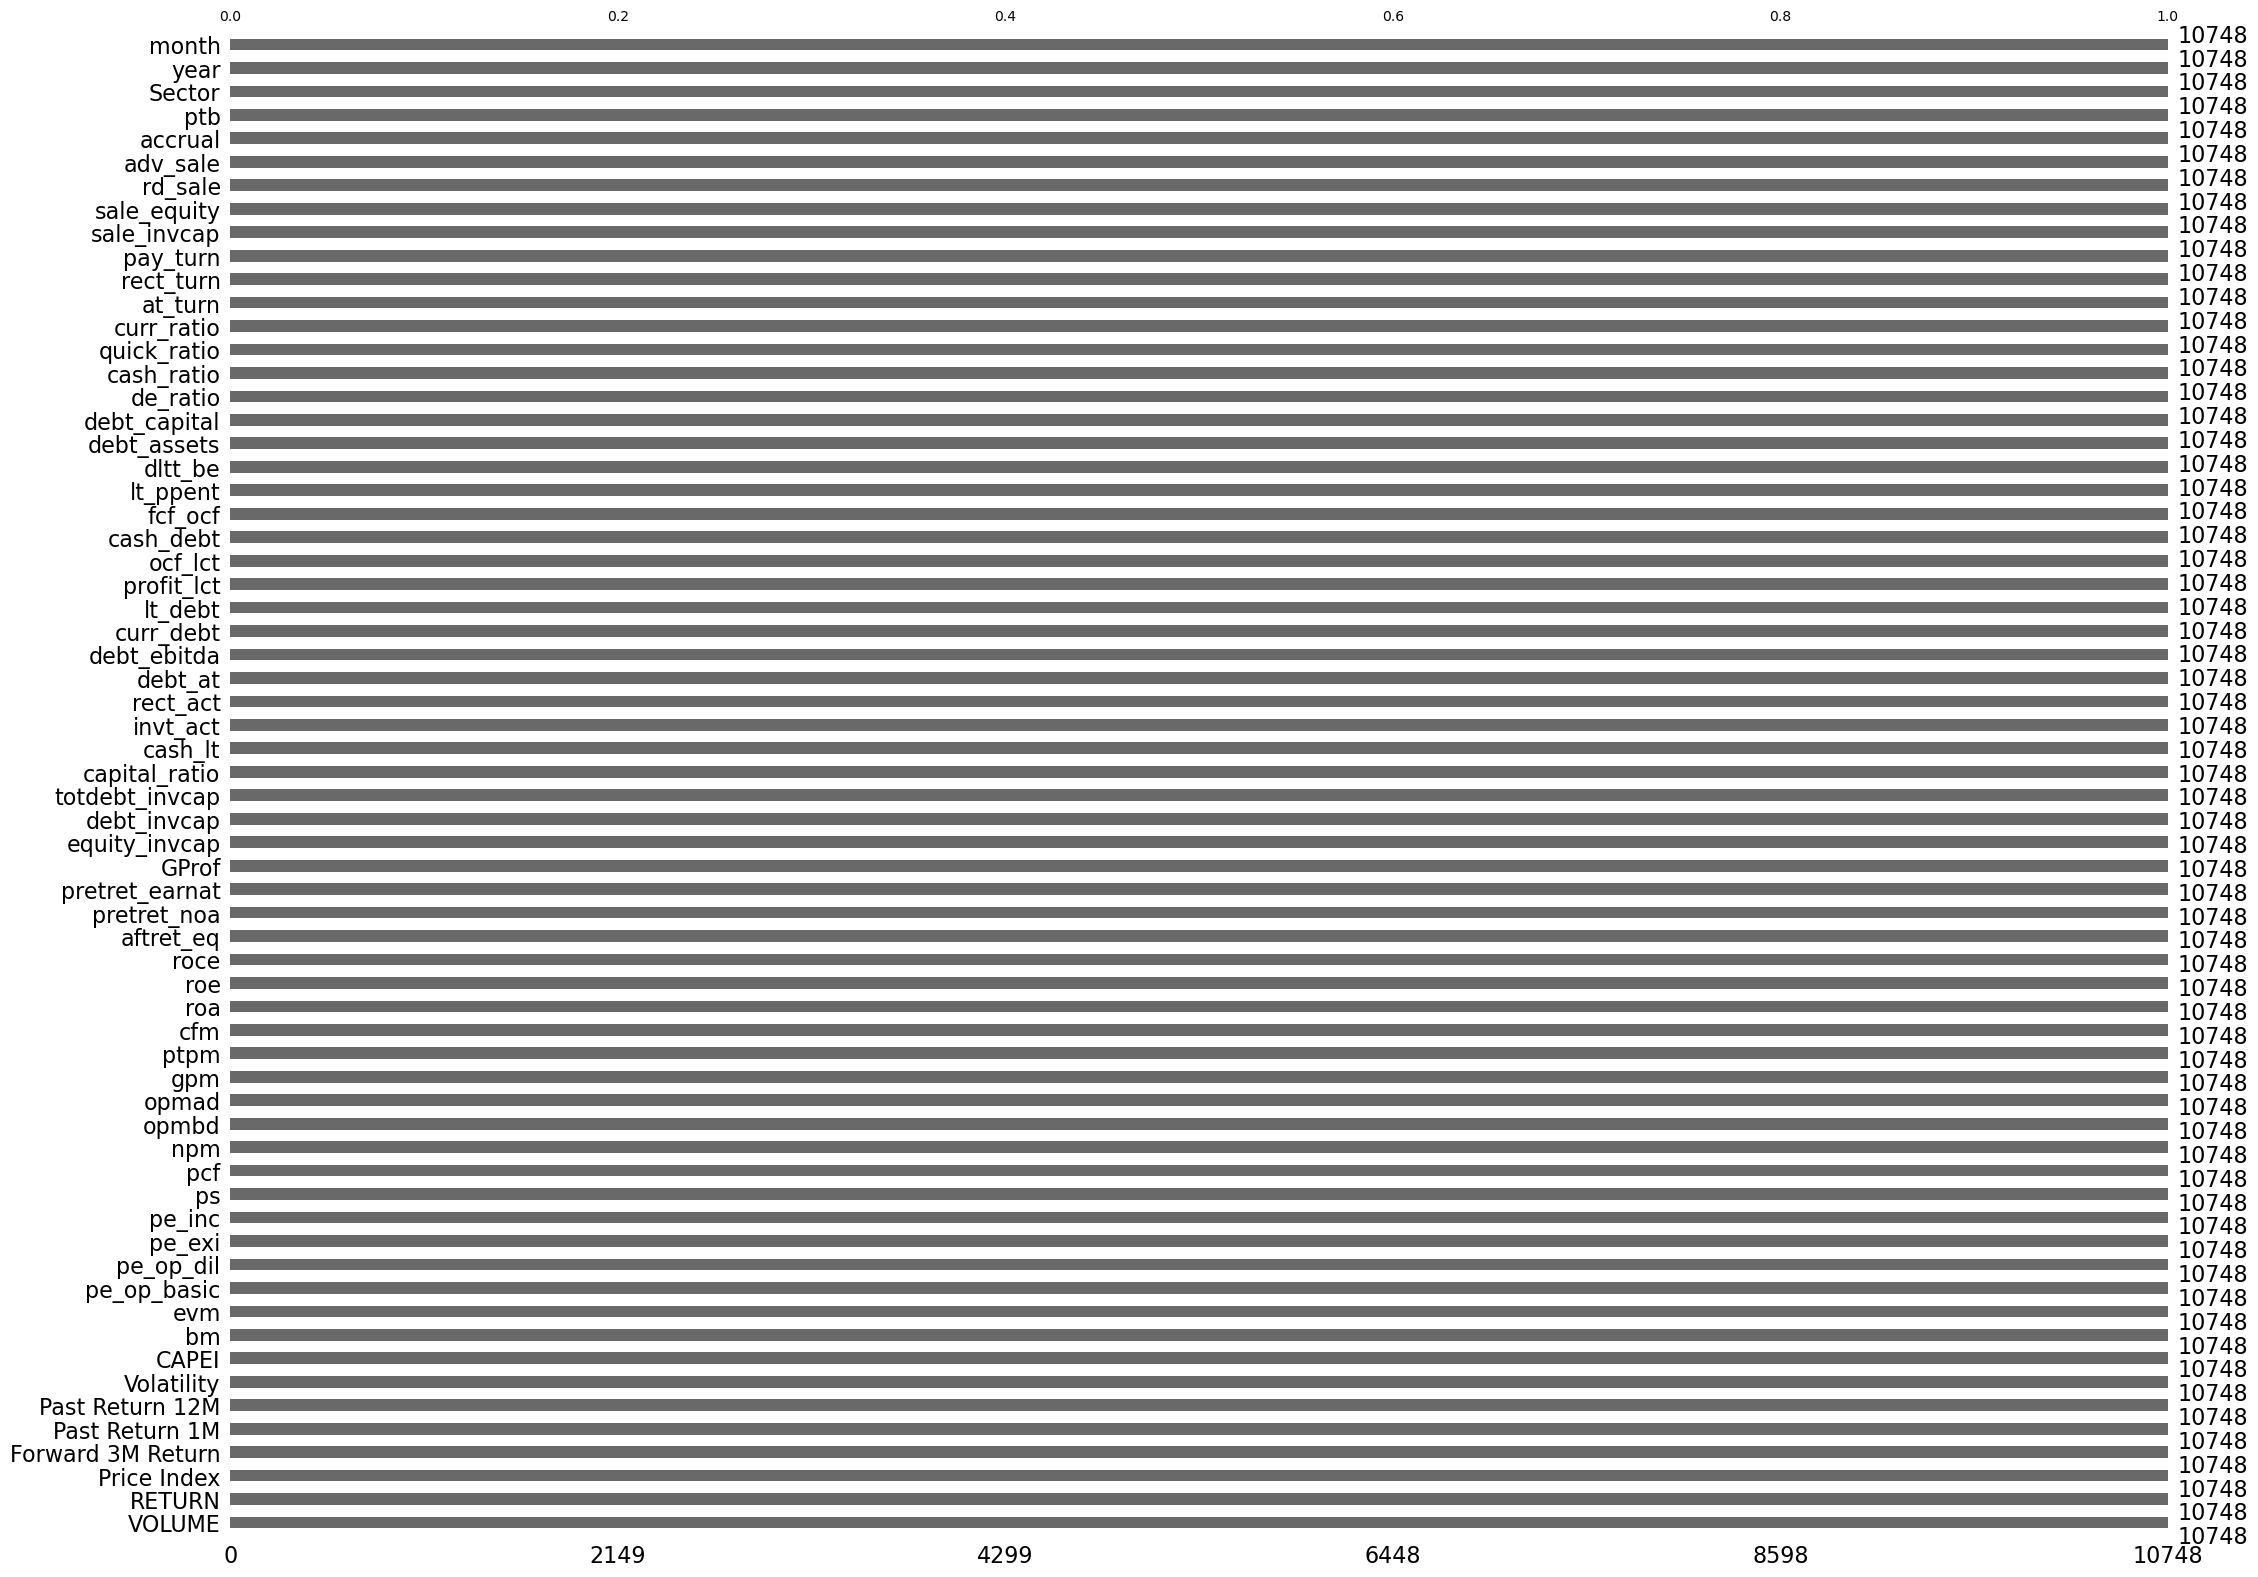

In [69]:
msno.bar(impuated_model_data1)
plt.show()

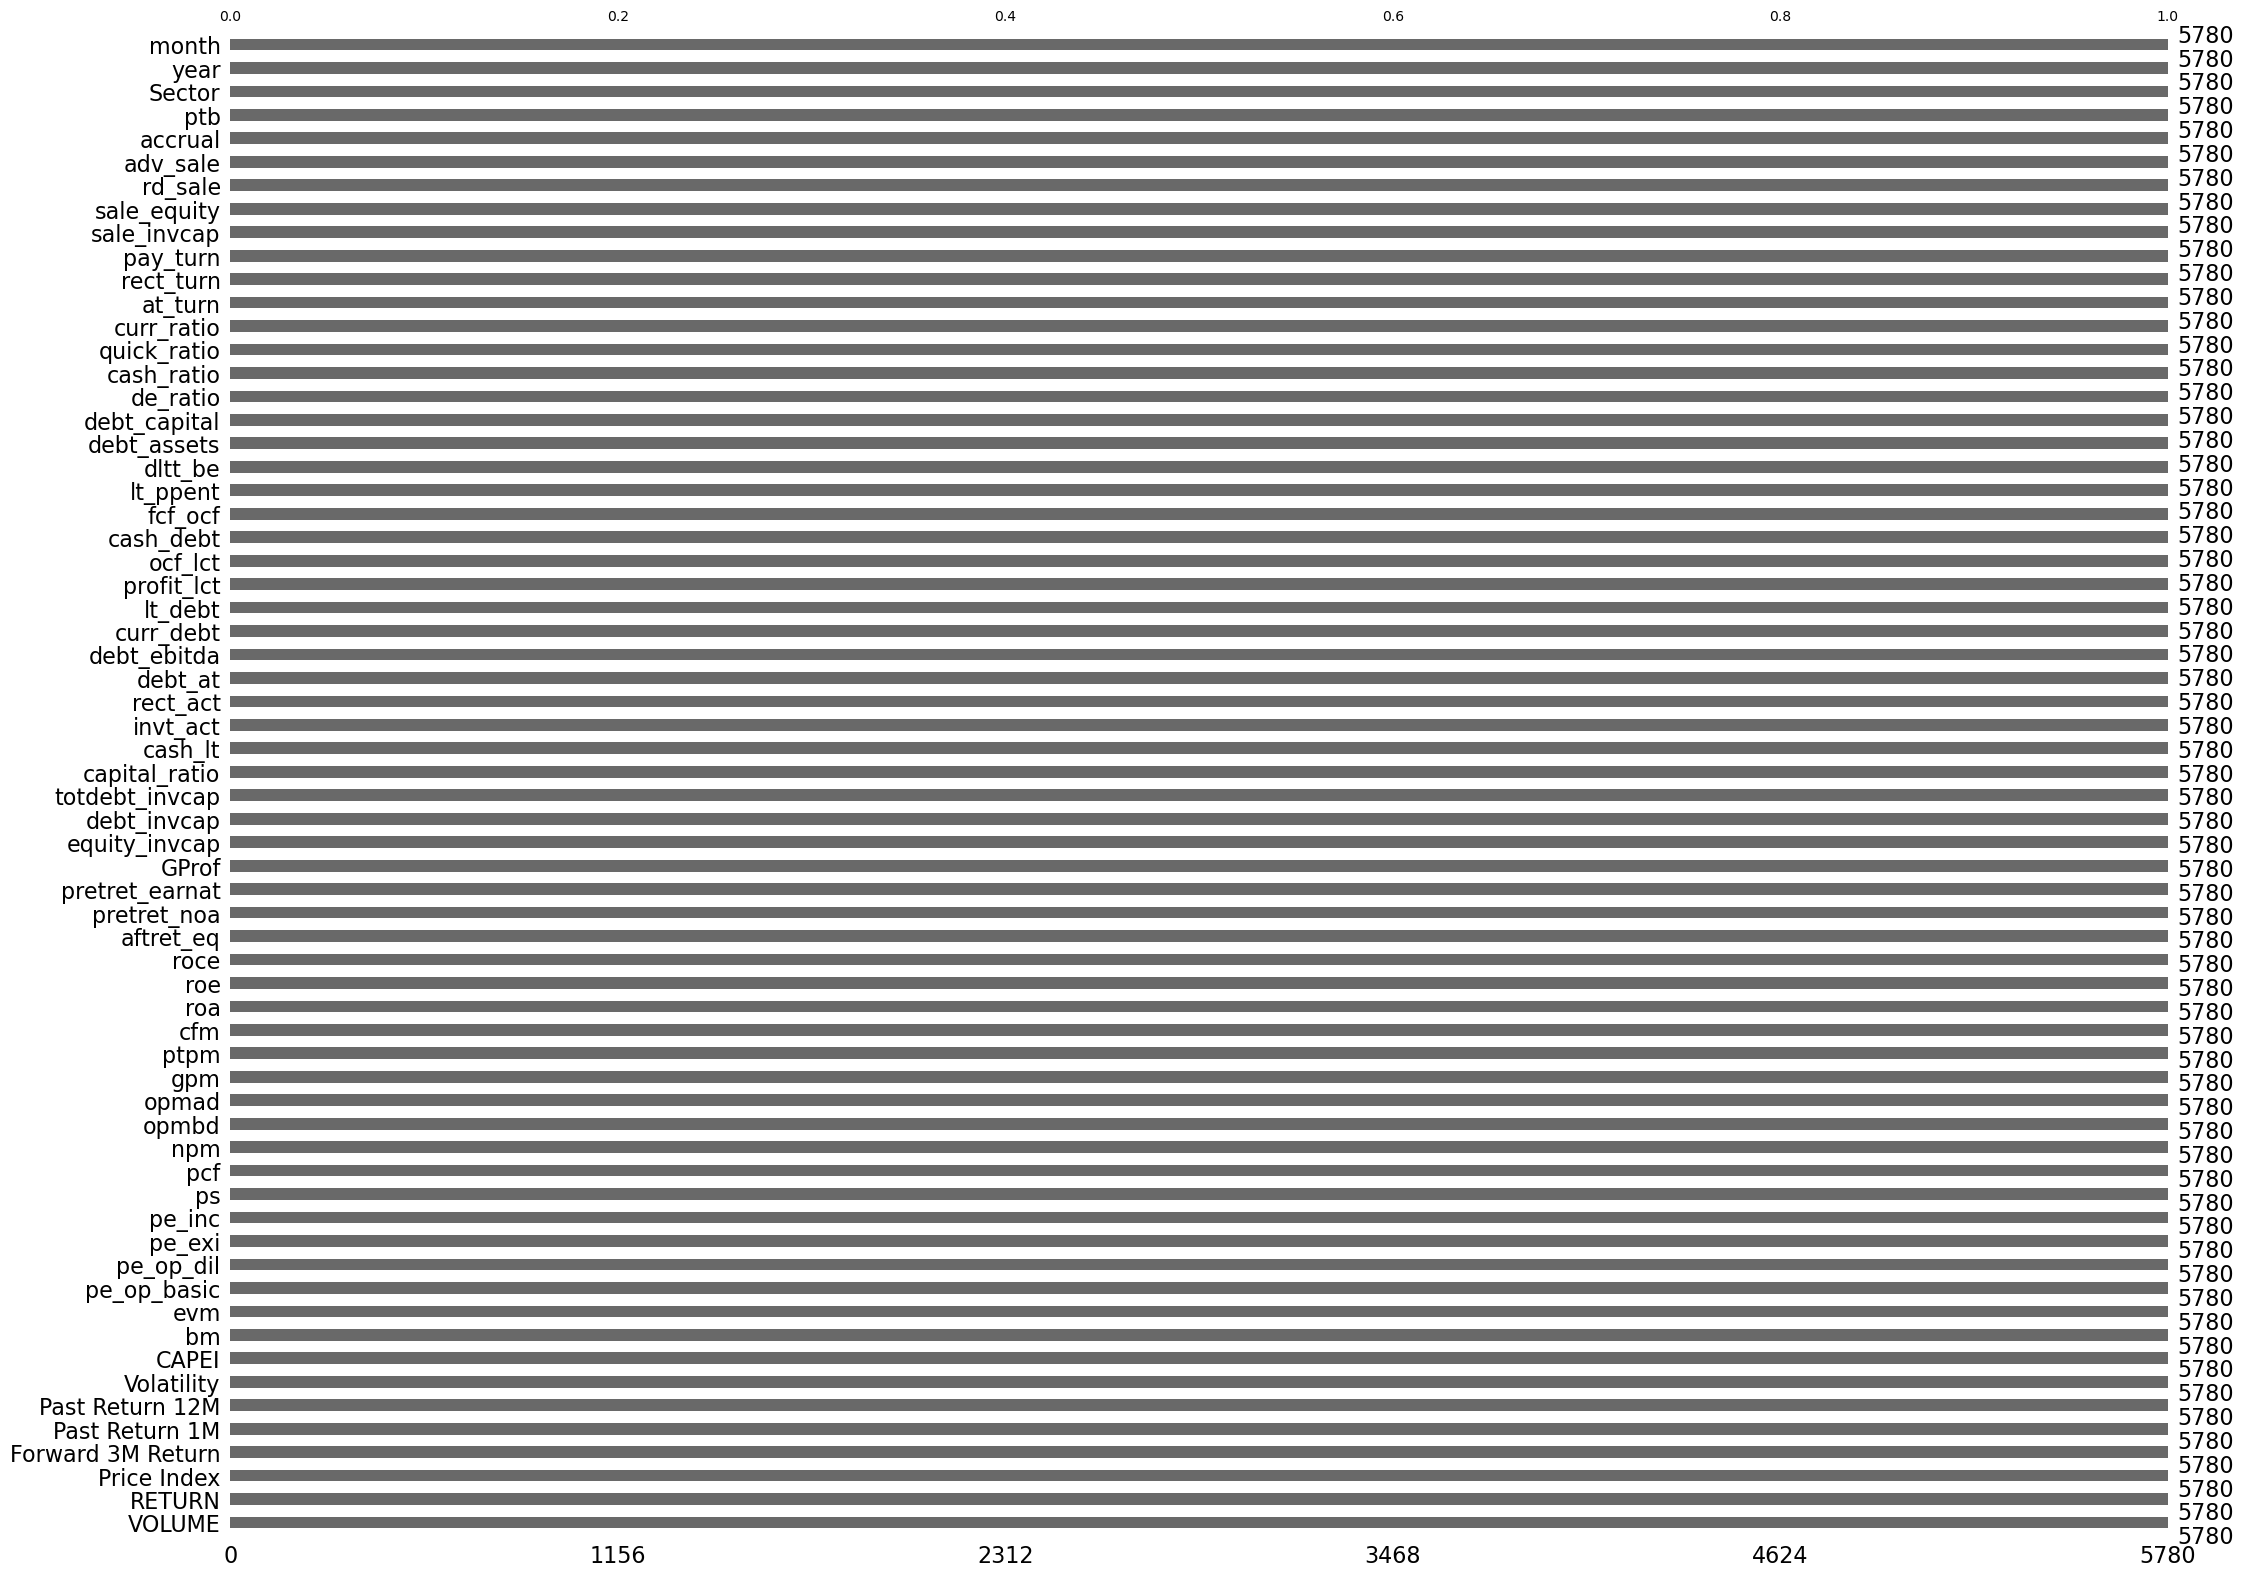

In [70]:
msno.bar(impuated_model_data2)
plt.show()

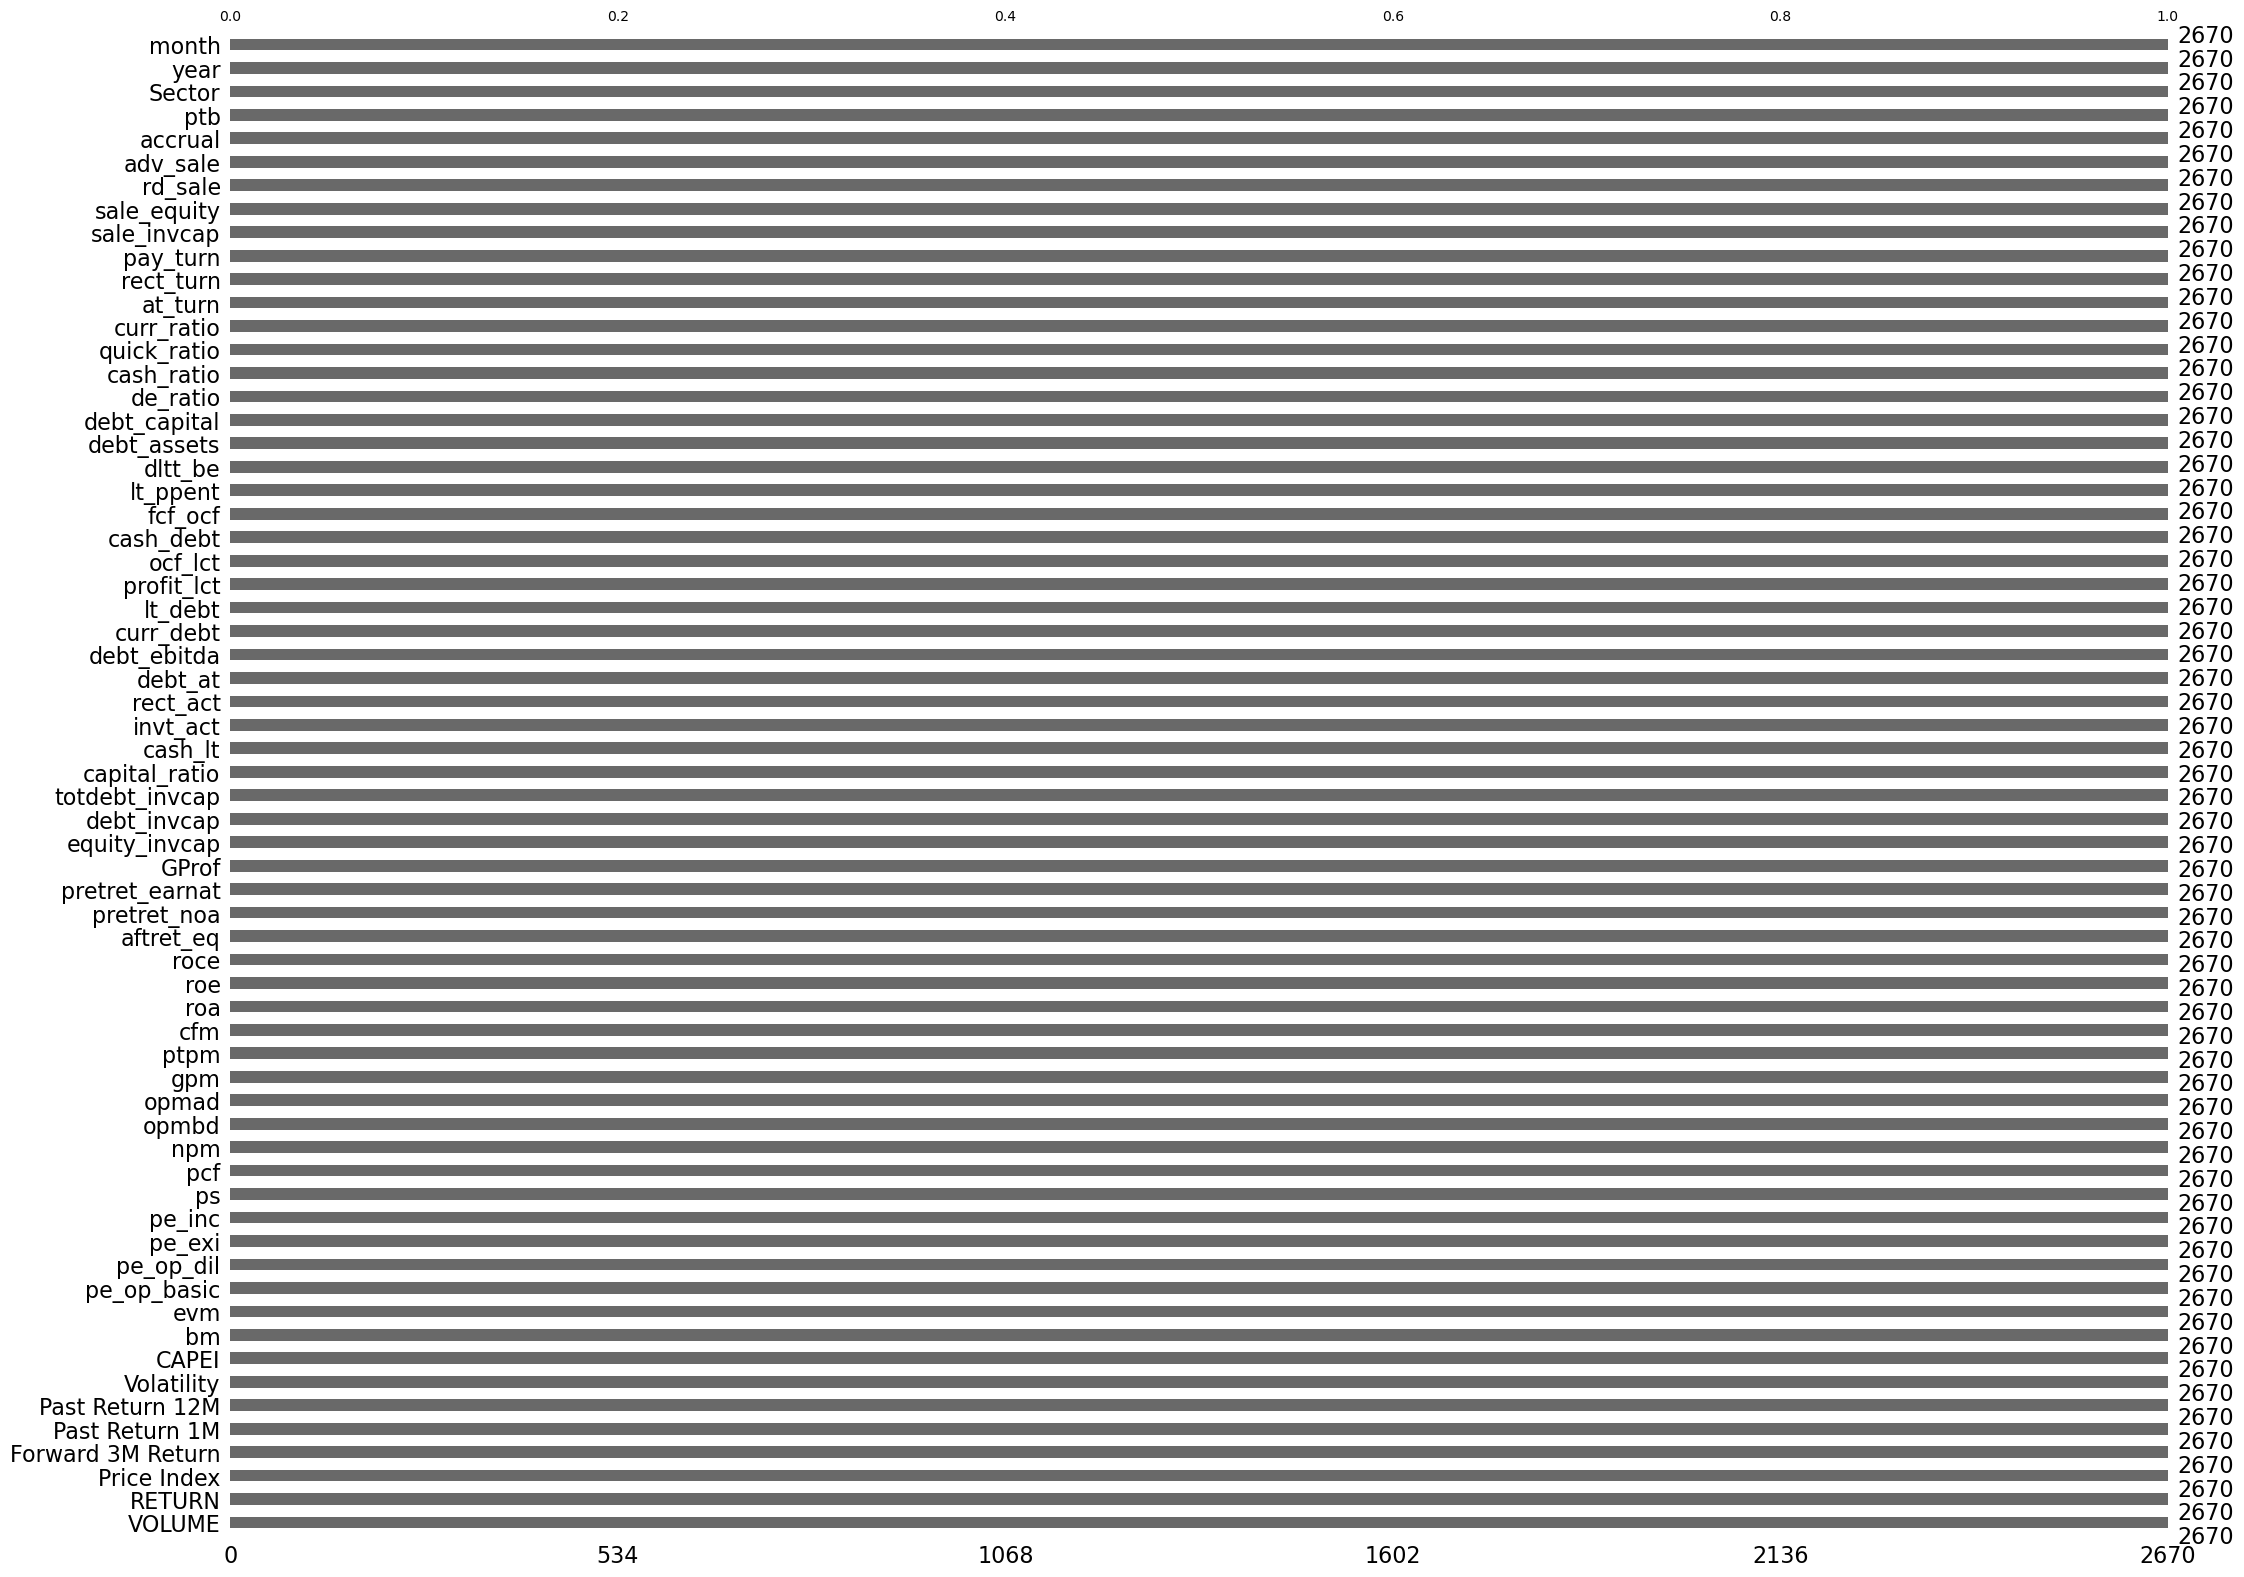

In [71]:
msno.bar(impuated_model_data3)
plt.show()

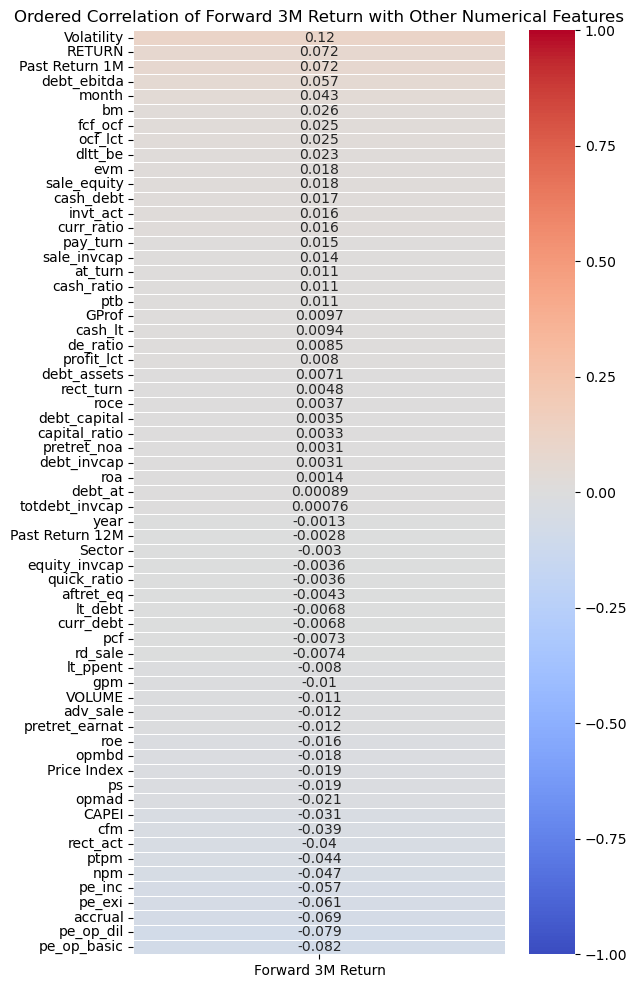

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for the correlation matrix
numerical_data = impuated_model_data1.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_data.corr()

# Extract and sort the correlation values for 'Forward 3M Return' with other features
forward_3m_corr = corr_matrix['Forward 3M Return'].drop('Forward 3M Return').sort_values(ascending=False)

# Plotting the ordered correlation of 'Forward 3M Return' with other features
plt.figure(figsize=(6, 12))
sns.heatmap(forward_3m_corr.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Ordered Correlation of Forward 3M Return with Other Numerical Features')
plt.show()

In [40]:
# output_file_path_cleaned = '823_Ready_Data.csv'
# model_df.to_csv(output_file_path_cleaned, index=False)
# output_file_path_cleaned

## Modeling

### Regression

The all years dataset is used to train a regression model
- 'Forward 3M Return' is the predicted value
- Variable: 'VOLUME', 'RETURN', 'Price Index', 'Past Return 1M', 'Past Return 12M',
        'Volatility', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil',
        'pe_exi', 'pe_inc', 'ps', 'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm',
        'cfm', 'roa', 'roe', 'roce', 'aftret_eq', 'pretret_noa',
        'pretret_earnat', 'GProf', 'equity_invcap', 'debt_invcap',
        'totdebt_invcap', 'capital_ratio', 'cash_lt', 'invt_act', 'rect_act',
        'debt_at', 'debt_ebitda', 'curr_debt', 'lt_debt', 'profit_lct',
        'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets',
        'debt_capital', 'de_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio',
        'at_turn', 'rect_turn', 'pay_turn', 'sale_invcap', 'sale_equity',
        'rd_sale', 'adv_sale', 'accrual', 'ptb', 'Sector'  (Sector is used as category variable)
- 2003 to 2020 dataset used as training, 2021 to 2022 dataset used as testing
- GradientBoostingregression is used, he result of R2 (-0.11777835903644651) is very low even after hyper parameter tunning.

In [74]:
data1 = impuated_model_data1

In [76]:
# Extracting the relevant features for prediction
# Dropping the target column ("Forward 3M Return") from features and extracting the target variable
X = data1.drop(['Forward 3M Return'], axis=1)
y = data1['Forward 3M Return']

# Checking the features and target variable
X.columns, y.head()

(Index(['VOLUME', 'RETURN', 'Price Index', 'Past Return 1M', 'Past Return 12M',
        'Volatility', 'CAPEI', 'bm', 'evm', 'pe_op_basic', 'pe_op_dil',
        'pe_exi', 'pe_inc', 'ps', 'pcf', 'npm', 'opmbd', 'opmad', 'gpm', 'ptpm',
        'cfm', 'roa', 'roe', 'roce', 'aftret_eq', 'pretret_noa',
        'pretret_earnat', 'GProf', 'equity_invcap', 'debt_invcap',
        'totdebt_invcap', 'capital_ratio', 'cash_lt', 'invt_act', 'rect_act',
        'debt_at', 'debt_ebitda', 'curr_debt', 'lt_debt', 'profit_lct',
        'ocf_lct', 'cash_debt', 'fcf_ocf', 'lt_ppent', 'dltt_be', 'debt_assets',
        'debt_capital', 'de_ratio', 'cash_ratio', 'quick_ratio', 'curr_ratio',
        'at_turn', 'rect_turn', 'pay_turn', 'sale_invcap', 'sale_equity',
        'rd_sale', 'adv_sale', 'accrual', 'ptb', 'Sector', 'year', 'month'],
       dtype='object'),
 607   -0.000735
 608   -0.050596
 609    0.121569
 610    0.257186
 611    0.095026
 Name: Forward 3M Return, dtype: float64)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardizing the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(['year','month'], axis=1))  # Exclude the 'year' column for scaling

# Separating the data into training and testing datasets based on the year
# Make sure 'year' is an integer or cast it accordingly: X['year'] = X['year'].astype(int)
train_mask = (X['year'] >= 2003) & (X['year'] <= 2020)
test_mask = (X['year'] >= 2021) & (X['year'] <= 2022)

X_train_scaled = X_scaled[train_mask]
X_test_scaled = X_scaled[test_mask]
y_train = y[train_mask]
y_test = y[test_mask]

# Training the Gradient Boosting Regressor model with standardized data
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
regressor.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_scaled = regressor.predict(X_test_scaled)

# Evaluating the model with standardized data
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("MSE:", mse_scaled, "R^2:", r2_scaled)

MSE: 0.022138806143790008 R^2: -0.21857688083740245


In [82]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

# Initializing the GridSearchCV with GradientBoostingRegressor
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='r2')

# Fitting the GridSearchCV to the standardized training data
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters from the grid search
best_params = grid_search.best_params_

# Training the model with the best parameters
best_regressor = GradientBoostingRegressor(**best_params, random_state=42)
best_regressor.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_best = best_regressor.predict(X_test_scaled)

# Evaluating the tuned model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

best_params, mse_best, r2_best

({'learning_rate': 0.01,
  'max_depth': 3,
  'min_samples_split': 5,
  'n_estimators': 100},
 0.020307523301628723,
 -0.11777835903644651)

### Classification

#### Labeling 

1. Label is created for each row based on the rule:
  a. If the 'Forward 3M Return' is thetop 20 highest among that timestamp, lable as 1
  b. otherwise 0.
2. check label distribution on training part and found dataset imbalanced, (SMOTE method will be used)


In [73]:
impuated_model_data1['Sector']=impuated_model_data1['Sector'].astype('category')

In [74]:
impuated_model_data2['Sector']=impuated_model_data2['Sector'].astype('category')

In [75]:
impuated_model_data3['Sector']=impuated_model_data3['Sector'].astype('category')

In [76]:
impuated_model_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10748 entries, 607 to 11354
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   VOLUME             10748 non-null  float64 
 1   RETURN             10748 non-null  float64 
 2   Price Index        10748 non-null  float64 
 3   Forward 3M Return  10748 non-null  float64 
 4   Past Return 1M     10748 non-null  float64 
 5   Past Return 12M    10748 non-null  float64 
 6   Volatility         10748 non-null  float64 
 7   CAPEI              10748 non-null  float64 
 8   bm                 10748 non-null  float64 
 9   evm                10748 non-null  float64 
 10  pe_op_basic        10748 non-null  float64 
 11  pe_op_dil          10748 non-null  float64 
 12  pe_exi             10748 non-null  float64 
 13  pe_inc             10748 non-null  float64 
 14  ps                 10748 non-null  float64 
 15  pcf                10748 non-null  float64 
 16  npm    

In [77]:
impuated_model_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5780 entries, 0 to 5779
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   VOLUME             5780 non-null   float64 
 1   RETURN             5780 non-null   float64 
 2   Price Index        5780 non-null   float64 
 3   Forward 3M Return  5780 non-null   float64 
 4   Past Return 1M     5780 non-null   float64 
 5   Past Return 12M    5780 non-null   float64 
 6   Volatility         5780 non-null   float64 
 7   CAPEI              5780 non-null   float64 
 8   bm                 5780 non-null   float64 
 9   evm                5780 non-null   float64 
 10  pe_op_basic        5780 non-null   float64 
 11  pe_op_dil          5780 non-null   float64 
 12  pe_exi             5780 non-null   float64 
 13  pe_inc             5780 non-null   float64 
 14  ps                 5780 non-null   float64 
 15  pcf                5780 non-null   float64 
 16  npm   

In [78]:
impuated_model_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2670 entries, 0 to 2669
Data columns (total 64 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   VOLUME             2670 non-null   float64 
 1   RETURN             2670 non-null   float64 
 2   Price Index        2670 non-null   float64 
 3   Forward 3M Return  2670 non-null   float64 
 4   Past Return 1M     2670 non-null   float64 
 5   Past Return 12M    2670 non-null   float64 
 6   Volatility         2670 non-null   float64 
 7   CAPEI              2670 non-null   float64 
 8   bm                 2670 non-null   float64 
 9   evm                2670 non-null   float64 
 10  pe_op_basic        2670 non-null   float64 
 11  pe_op_dil          2670 non-null   float64 
 12  pe_exi             2670 non-null   float64 
 13  pe_inc             2670 non-null   float64 
 14  ps                 2670 non-null   float64 
 15  pcf                2670 non-null   float64 
 16  npm   

In [79]:
data1=impuated_model_data1

In [80]:
data2=impuated_model_data2

In [81]:
data3=impuated_model_data3

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [83]:
# Step 1: Tagging top 20 rows
data1['Top_20_Tag'] = data1.groupby(['year', 'month'])['Forward 3M Return']\
                          .transform(lambda x: (x.rank(method='first', ascending=False) <= 20).astype(int))



In [84]:
data2['Top_20_Tag'] = data2.groupby(['year', 'month'])['Forward 3M Return']\
                          .transform(lambda x: (x.rank(method='first', ascending=False) <= 20).astype(int))

In [85]:
data3['Top_20_Tag'] = data3.groupby(['year', 'month'])['Forward 3M Return']\
                          .transform(lambda x: (x.rank(method='first', ascending=False) <= 20).astype(int))

Label Distribution:
 Top_20_Tag
0    0.705992
1    0.294008
Name: proportion, dtype: float64


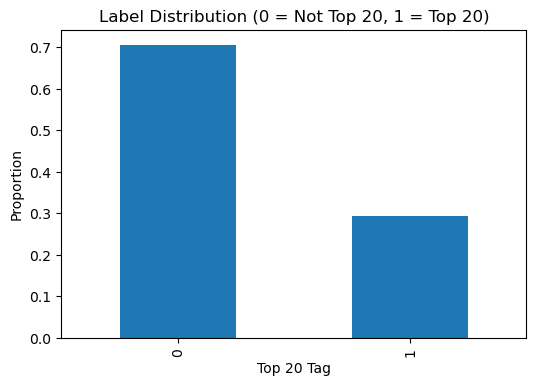

In [86]:
label_counts = data1['Top_20_Tag'].value_counts(normalize=True)
print("Label Distribution:\n", label_counts)

# Plot the label distribution for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title('Label Distribution (0 = Not Top 20, 1 = Top 20)')
plt.xlabel('Top 20 Tag')
plt.ylabel('Proportion')
plt.show()

Label Distribution:
 Top_20_Tag
0    0.705882
1    0.294118
Name: proportion, dtype: float64


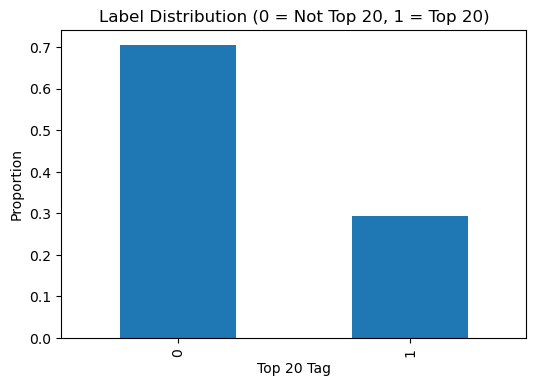

In [87]:
label_counts = data2['Top_20_Tag'].value_counts(normalize=True)
print("Label Distribution:\n", label_counts)

# Plot the label distribution for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title('Label Distribution (0 = Not Top 20, 1 = Top 20)')
plt.xlabel('Top 20 Tag')
plt.ylabel('Proportion')
plt.show()

Label Distribution:
 Top_20_Tag
0    0.685393
1    0.314607
Name: proportion, dtype: float64


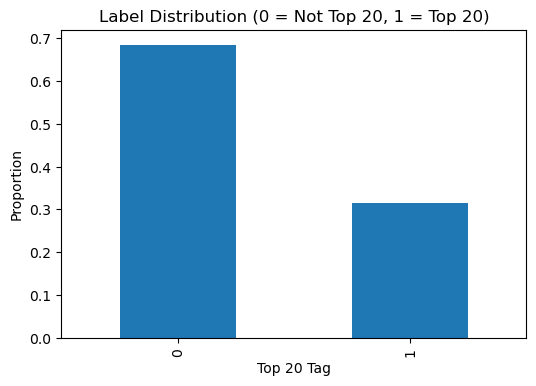

In [88]:
label_counts = data3['Top_20_Tag'].value_counts(normalize=True)
print("Label Distribution:\n", label_counts)

# Plot the label distribution for better visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar')
plt.title('Label Distribution (0 = Not Top 20, 1 = Top 20)')
plt.xlabel('Top 20 Tag')
plt.ylabel('Proportion')
plt.show()

In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10748 entries, 607 to 11354
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   VOLUME             10748 non-null  float64 
 1   RETURN             10748 non-null  float64 
 2   Price Index        10748 non-null  float64 
 3   Forward 3M Return  10748 non-null  float64 
 4   Past Return 1M     10748 non-null  float64 
 5   Past Return 12M    10748 non-null  float64 
 6   Volatility         10748 non-null  float64 
 7   CAPEI              10748 non-null  float64 
 8   bm                 10748 non-null  float64 
 9   evm                10748 non-null  float64 
 10  pe_op_basic        10748 non-null  float64 
 11  pe_op_dil          10748 non-null  float64 
 12  pe_exi             10748 non-null  float64 
 13  pe_inc             10748 non-null  float64 
 14  ps                 10748 non-null  float64 
 15  pcf                10748 non-null  float64 
 16  npm    

In [90]:
from imblearn.over_sampling import SMOTE

#### Time windows to evalute the persistence for the method and dataset


5 Years moving window on a 2-years interation 
- Window 1  2003 to 2007 as traing , 2008 as testing
- Window 2  2005 to 2009 as traing , 2010 as testing
- Window 3  2007 to 2011 as traing , 2012 as testing
- Window 4  2009 to 2013 as traing , 2014 as testing
- ......................
- all the way to 2022 as end point

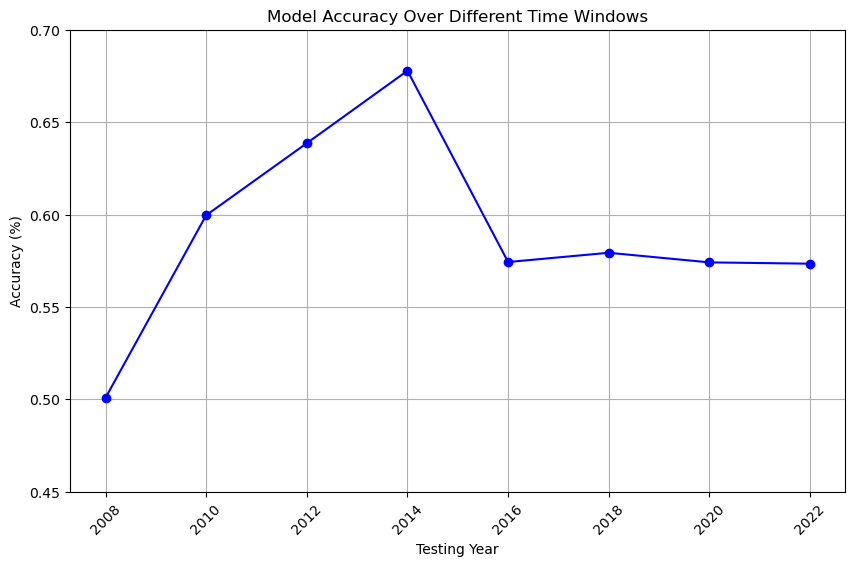

The result indicated an acceptable level of persistence for the accuracy over the time window.(especially for last 3 windows are very steady)
This approves the dataset and machinery of this classcifation modeling process

In [91]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Assuming 'data1' includes a 'year' column

# Selecting Features and Target
X = data1.drop(columns=['Top_20_Tag', 'Forward 3M Return'])
y = data1['Top_20_Tag']

# Identify categorical and numerical columns
categorical_features = ['Sector']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Sector' and col not in ['year', 'month']]

# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Setting up windows for training and test
start_year = 2003
train_period = 4
test_period = 1
end_year = 2022

# Iterate through each time window
for start in range(start_year, end_year - train_period - test_period + 1, 2):
    train_start = start
    train_end = start + train_period
    test_start = train_end + 1
    test_end = test_start + test_period

    # Masking for current window
    train_mask = (data1['year'] >= train_start) & (data1['year'] <= train_end)
    test_mask = (data1['year'] == test_start)

    # Splitting the data using the current window mask
    X_train, X_test = X[train_mask], X[test_mask]
    y_train, y_test = y[train_mask], y[test_mask]

    # Applying SMOTE to balance the classes in the training set
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Model Training on resampled data
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Prediction and Evaluation
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Training years: {train_start}-{train_end}, Testing year: {test_start}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)


Training years: 2003-2007, Testing year: 2008
Accuracy: 0.4805194805194805
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.49      0.57       436
           1       0.27      0.45      0.34       180

    accuracy                           0.48       616
   macro avg       0.48      0.47      0.45       616
weighted avg       0.56      0.48      0.50       616

Training years: 2005-2009, Testing year: 2010
Accuracy: 0.6483050847457628
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       332
           1       0.39      0.32      0.35       140

    accuracy                           0.65       472
   macro avg       0.56      0.55      0.56       472
weighted avg       0.63      0.65      0.64       472

Training years: 2007-2011, Testing year: 2012
Accuracy: 0.6445783132530121
Classification Report:
               precision    recall  f1-score   sup

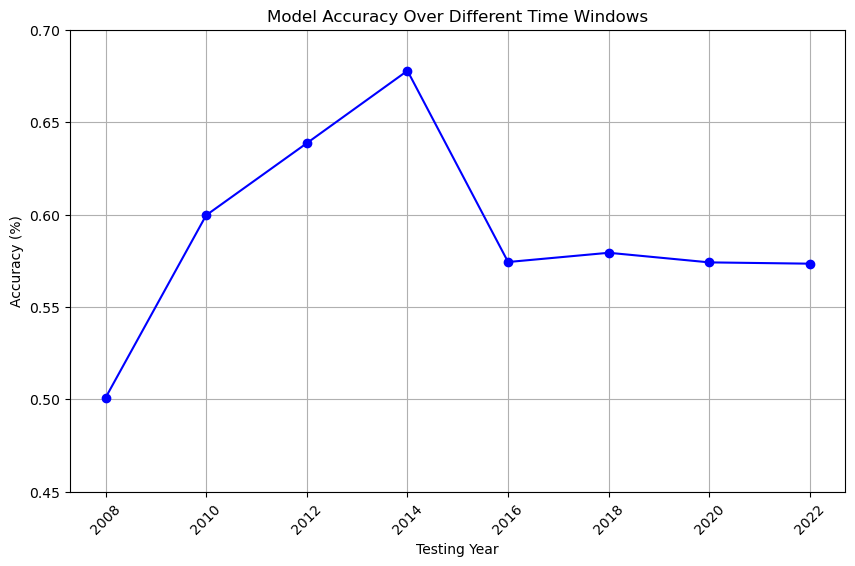

Training Window  Testing Year  Accuracy
0       2003-2007          2008    0.5008
1       2005-2009          2010    0.5996
2       2007-2011          2012    0.6386
3       2009-2013          2014    0.6778
4       2011-2015          2016    0.5743
5       2013-2017          2018    0.5793
6       2015-2019          2020    0.5741
7       2017-2021          2022    0.5734

In [92]:
# Data from  input
data = {
    "Training Window": ["2003-2007", "2005-2009", "2007-2011", "2009-2013", "2011-2015", "2013-2017", "2015-2019", "2017-2021"],
    "Testing Year": [2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022],
    "Accuracy": [0.5008, 0.5996, 0.6386, 0.6778, 0.5743, 0.5793, 0.5741, 0.5734]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(results_df["Testing Year"], results_df["Accuracy"], marker='o', linestyle='-', color='blue')
plt.title('Model Accuracy Over Different Time Windows')
plt.xlabel('Testing Year')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.xticks(results_df["Testing Year"], rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0.45, 0.7)  # Adjust y-axis limit for better focus on data range
plt.show()

# Display the DataFrame as a table
results_df

#### Model training using dataset from different time period of modeling dataset

- all years(2003 to 2018 as training, 2018 to 2022 as testing)
- 10 years(2012 to 2020 as training, 2020 to 2022 as testing)
- 5 years(2017 to 2021 as training, 2021 to 2022 as testing)

*Models used:* 
- RandomForest
- XGboost
- Catboost

##### all data as training

In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Assuming 'data1' includes a 'year' column

# Selecting Features and Target
X = data1.drop(columns=['Top_20_Tag', 'Forward 3M Return'])  # Keep 'year' temporarily
y = data1['Top_20_Tag']

# Filter the data by 'year' for splitting into training and test sets
train_mask = data1['year'] < 2018
test_mask = data1['year'] >= 2018

# Now drop 'year' and 'month' from features
X = X.drop(columns=['year', 'month'])

# Identify categorical and numerical columns
categorical_features = ['Sector']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Sector']

# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Splitting the data using the year mask
X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Applying SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model Training on resampled data
pipeline.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5746180963572268
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.63      0.67      1753
           1       0.36      0.46      0.40       800

    accuracy                           0.57      2553
   macro avg       0.54      0.54      0.54      2553
weighted avg       0.60      0.57      0.59      2553



In [94]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the XGBoost pipeline
xgb_pipeline1 = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Apply SMOTE to balance the classes in the training set
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Train the XGBoost pipeline
xgb_pipeline1.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred_xgb = xgb_pipeline1.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("\nModel: XGBoost")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)


Model: XGBoost
Accuracy: 0.5949862906384645
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.74      0.71      1753
           1       0.33      0.28      0.30       800

    accuracy                           0.59      2553
   macro avg       0.51      0.51      0.51      2553
weighted avg       0.58      0.59      0.59      2553



In [95]:
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
cat_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the CatBoost pipeline
cat_pipeline1 = Pipeline([
    ('preprocessor', cat_preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
])

# Apply SMOTE to balance the classes in the training set
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Train the CatBoost pipeline
cat_pipeline1.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred_cat = cat_pipeline1.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
report_cat = classification_report(y_test, y_pred_cat)

print("\nModel: CatBoost")
print("Accuracy:", accuracy_cat)
print("Classification Report:\n", report_cat)


Model: CatBoost
Accuracy: 0.6192714453584018
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.77      0.74      1753
           1       0.36      0.28      0.32       800

    accuracy                           0.62      2553
   macro avg       0.53      0.53      0.53      2553
weighted avg       0.60      0.62      0.60      2553



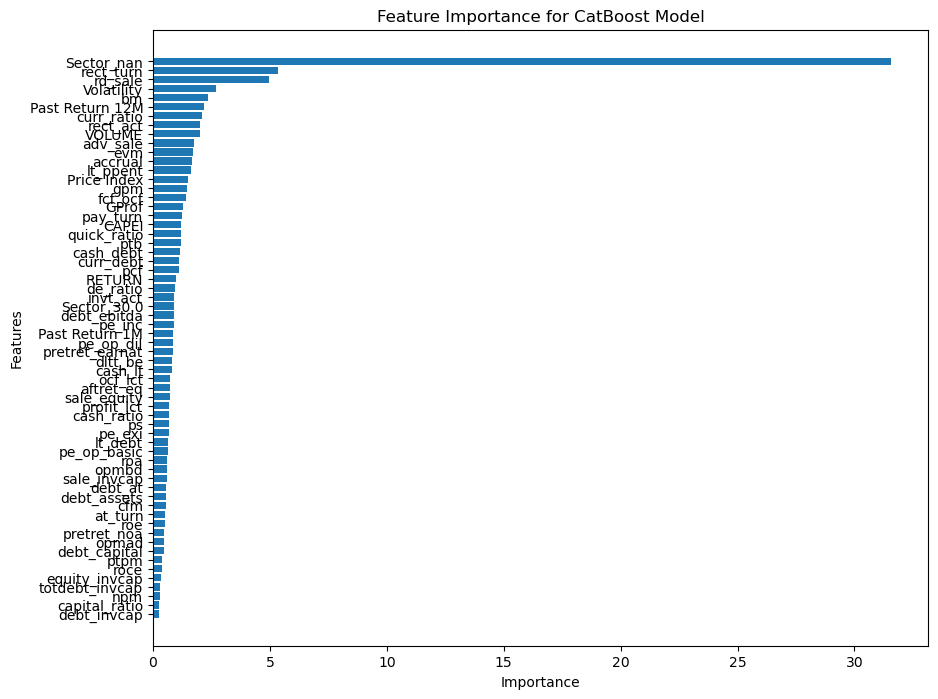

In [96]:

# Extract feature importances
feature_importances = cat_pipeline1.named_steps['classifier'].get_feature_importance()

# Getting feature names from the preprocessor step
# For numeric features
numeric_transformed_names = cat_pipeline1.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out()

# For categorical features after one-hot encoding
categories = cat_pipeline1.named_steps['preprocessor'].transformers_[1][1].categories_
cat_transformed_names = [f"{col}_{val}" for col, vals in zip(categorical_features, categories) for val in vals[1:]]

# Combine all feature names
all_feature_names = list(numeric_transformed_names) + list(cat_transformed_names)

# Combine names and importances into a list of tuples and sort by importance
features_and_importances = sorted(zip(all_feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Unzip the sorted tuples
sorted_features, sorted_importances = zip(*features_and_importances)

# Creating the plot
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance for CatBoost Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top
plt.show()

## recent 10 years as training

In [97]:
# Selecting Features and Target
X = data2.drop(columns=['Top_20_Tag', 'Forward 3M Return'])  # Keep 'year' temporarily
y = data2['Top_20_Tag']

# Filter the data by 'year' for splitting into training and test sets
train_mask = data2['year'] <=2020
test_mask = data2['year'] > 2020

# Now drop 'year' and 'month' from features
X = X.drop(columns=['year', 'month'])

# Identify categorical and numerical columns
categorical_features = ['Sector']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Sector']

# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Splitting the data using the year mask
X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Applying SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model Training on resampled data
pipeline.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5122235157159488
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.63      0.64       579
           1       0.26      0.26      0.26       280

    accuracy                           0.51       859
   macro avg       0.45      0.45      0.45       859
weighted avg       0.52      0.51      0.51       859



In [98]:

# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the XGBoost pipeline
xgb_pipeline2 = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Apply SMOTE to balance the classes in the training set
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Train the XGBoost pipeline
xgb_pipeline2.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred_xgb = xgb_pipeline2.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("\nModel: XGBoost")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)


Model: XGBoost
Accuracy: 0.5750873108265425
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.75      0.71       579
           1       0.29      0.20      0.24       280

    accuracy                           0.58       859
   macro avg       0.47      0.48      0.47       859
weighted avg       0.54      0.58      0.55       859



In [99]:
# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
cat_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the CatBoost pipeline
cat_pipeline2 = Pipeline([
    ('preprocessor', cat_preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
])

# Apply SMOTE to balance the classes in the training set
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Train the CatBoost pipeline
cat_pipeline2.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred_cat = cat_pipeline1.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
report_cat = classification_report(y_test, y_pred_cat)

print("\nModel: CatBoost")
print("Accuracy:", accuracy_cat)
print("Classification Report:\n", report_cat)


Model: CatBoost
Accuracy: 0.5983701979045402
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.73       579
           1       0.29      0.16      0.20       280

    accuracy                           0.60       859
   macro avg       0.48      0.48      0.47       859
weighted avg       0.54      0.60      0.56       859



## recent 5 years as training

In [100]:
# Selecting Features and Target
X = data3.drop(columns=['Top_20_Tag', 'Forward 3M Return'])  # Keep 'year' temporarily
y = data3['Top_20_Tag']

# Filter the data by 'year' for splitting into training and test sets
train_mask = data3['year'] <=2021
test_mask = data3['year'] > 2021

# Now drop 'year' and 'month' from features
X = X.drop(columns=['year', 'month'])

# Identify categorical and numerical columns
categorical_features = ['Sector']
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features = [col for col in numerical_features if col != 'Sector']

# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Splitting the data using the year mask
X_train, X_test = X[train_mask], X[test_mask]
y_train, y_test = y[train_mask], y[test_mask]

# Applying SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Model Training on resampled data
pipeline.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.5746102449888641
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.64      0.68       309
           1       0.35      0.42      0.38       140

    accuracy                           0.57       449
   macro avg       0.53      0.53      0.53       449
weighted avg       0.60      0.57      0.58       449



In [101]:
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report
# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
xgb_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the XGBoost pipeline
xgb_pipeline3 = Pipeline([
    ('preprocessor', xgb_preprocessor),
    ('classifier', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
])

# Apply SMOTE to balance the classes in the training set
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Train the XGBoost pipeline
xgb_pipeline3.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred_xgb = xgb_pipeline3.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print("\nModel: XGBoost")
print("Accuracy:", accuracy_xgb)
print("Classification Report:\n", report_xgb)


Model: XGBoost
Accuracy: 0.5679287305122495
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.62      0.66       309
           1       0.35      0.45      0.39       140

    accuracy                           0.57       449
   macro avg       0.53      0.54      0.53       449
weighted avg       0.60      0.57      0.58       449



In [102]:


# Preprocessing: One-Hot Encoding for categorical and scaling for numerical
cat_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Creating the CatBoost pipeline
cat_pipeline3 = Pipeline([
    ('preprocessor', cat_preprocessor),
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
])

# Apply SMOTE to balance the classes in the training set
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Train the CatBoost pipeline
cat_pipeline3.fit(X_train_resampled, y_train_resampled)

# Prediction and Evaluation
y_pred_cat = cat_pipeline3.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat)
report_cat = classification_report(y_test, y_pred_cat)

print("\nModel: CatBoost")
print("Accuracy:", accuracy_cat)
print("Classification Report:\n", report_cat)


Model: CatBoost
Accuracy: 0.5723830734966593
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69       309
           1       0.30      0.29      0.29       140

    accuracy                           0.57       449
   macro avg       0.49      0.49      0.49       449
weighted avg       0.57      0.57      0.57       449



##### The Catboost model trained using all years data was selected as best model due to highest accuraacy (61%)

#### Prepare dataset after 2022-09-30 as prediction dataset

- Use the best model selected to classify the label and sum up the label to find the top 20 stocks
- Check the real performance of the top 20 predicted stock from yf for 3M forward return and compare for 2022 December.
- The average return of the predict top 20 stock is possitive (0.007313) for 2022 December
- Check the real performance of the top 20 predicted stock from yf for 3M forward return and compare for 2023 June.
- The average return of the predict top 20 stock is negitive (-0.103877) for 2023 June.


In [103]:
prediction_data=merged_df3[merged_df3['Sector'].isin([25, 30])]

In [104]:
# Great  year & month feature from date
prediction_data['year'] = prediction_data['date'].dt.year
prediction_data['month'] = prediction_data['date'].dt.month

prediction_data = prediction_data.drop(columns=['adate','qdate','Mcap'],axis=1)

In [105]:
prediction_data=prediction_data[prediction_data['date'] >= '2022-09-30']


In [106]:
# Count distinct items in 'TICKER_x'
distinct_count = prediction_data['TICKER_x'].nunique()

# List distinct items in 'TICKER_x'
distinct_items = prediction_data['TICKER_x'].unique()

print("Count of distinct items in TICKER_x:", distinct_count)
print("List of distinct items in TICKER_x:", distinct_items)

Count of distinct items in TICKER_x: 96
List of distinct items in TICKER_x: ['BC' 'KO' 'MGM' 'PEP' 'MO' 'PVH' 'COTY' 'ETSY' 'FL' 'LW' 'GT' 'HSY' 'KR'
 'GIS' 'KMB' 'PG' 'CL' 'WBA' 'CHD' 'CPB' 'WHR' 'F' 'K' 'HRL' 'MAT' 'TJX'
 'SJM' 'MCD' 'VFC' 'CLX' 'GPC' 'DDS' 'SYY' 'MKC' 'LEN' 'HAS' 'GHC' 'PHM'
 'WMT' 'CAG' 'NKE' 'JWN' 'GPS' 'TAP' 'LEG' 'NWL' 'LOW' 'HD' 'STZ' 'HOG'
 'KBH' 'CCL' 'AN' 'ATGE' 'M' 'MHK' 'KSS' 'DHI' 'SBUX' 'TSN' 'FOSL' 'ORLY'
 'NVR' 'URBN' 'TSCO' 'DLTR' 'DRI' 'POOL' 'EL' 'TUP' 'WOR' 'RL' 'YUM' 'MAR'
 'EBAY' 'BKNG' 'COST' 'MNST' 'TPR' 'MDLZ' 'AAP' 'GME' 'KMX' 'WYNN' 'LKQ'
 'DPZ' 'LVS' 'UAA' 'CMG' 'TNL' 'HBI' 'ROST' 'ULTA' 'PM' 'DG' 'TSLA']


In [107]:
prediction_data=prediction_data.drop(['PERMNO', 'Forward 3M Return', 'SIC_Industry_Code', 'COMNAM', 'CUSIP', 'Forward 1M Return',
        'Forward 6M Return', 'Forward 12M Return','Volatility Adjusted Forward 1M Return','Volatility Adjusted Forward 3M Return','Volatility Adjusted Forward 6M Return',  'GVKEY_y'
       ], axis=1)

In [108]:
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 2083 to 134050
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             388 non-null    datetime64[ns]
 1   TICKER_x         388 non-null    object        
 2   VOLUME           388 non-null    float64       
 3   RETURN           388 non-null    float64       
 4   Price Index      388 non-null    float64       
 5   Past Return 1M   388 non-null    float64       
 6   Past Return 12M  384 non-null    float64       
 7   Volatility       384 non-null    float64       
 8   CAPEI            261 non-null    float64       
 9   bm               231 non-null    float64       
 10  evm              261 non-null    float64       
 11  pe_op_basic      258 non-null    float64       
 12  pe_op_dil        258 non-null    float64       
 13  pe_exi           258 non-null    float64       
 14  pe_inc           258 non-null    float64 

In [109]:
cleaned_prediction_df=prediction_data.dropna()

In [110]:
cleaned_prediction_df['Sector']=cleaned_prediction_df['Sector'].astype('category')

In [111]:
cleaned_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 2083 to 133618
Data columns (total 65 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             210 non-null    datetime64[ns]
 1   TICKER_x         210 non-null    object        
 2   VOLUME           210 non-null    float64       
 3   RETURN           210 non-null    float64       
 4   Price Index      210 non-null    float64       
 5   Past Return 1M   210 non-null    float64       
 6   Past Return 12M  210 non-null    float64       
 7   Volatility       210 non-null    float64       
 8   CAPEI            210 non-null    float64       
 9   bm               210 non-null    float64       
 10  evm              210 non-null    float64       
 11  pe_op_basic      210 non-null    float64       
 12  pe_op_dil        210 non-null    float64       
 13  pe_exi           210 non-null    float64       
 14  pe_inc           210 non-null    float64 

In [112]:
predictions = cat_pipeline1.predict(cleaned_prediction_df)
prediction_probs = cat_pipeline1.predict_proba(cleaned_prediction_df)[:, 1]

cleaned_prediction_df['Top_20_Tag_Prediction'] = predictions
cleaned_prediction_df['Prediction_Probability'] = prediction_probs

In [113]:
# Sort the DataFrame by Prediction_Probability in descending order
cleaned_prediction_df  = cleaned_prediction_df.sort_values(by='Prediction_Probability', ascending=False)

# Display the sorted DataFrame
cleaned_prediction_df.head(20)

date TICKER_x     VOLUME    RETURN  Price Index  Past Return 1M  \
109166 2022-09-30     EBAY  1204323.0 -0.165874     4.995276       -0.165874   
109168 2022-11-30     EBAY  1273954.0  0.146084     6.196260        0.146084   
109167 2022-10-31     EBAY  1327772.0  0.082315     5.406463        0.082315   
59053  2022-11-30      GPS  2231029.0  0.290151     1.542601        0.290151   
59052  2022-10-31      GPS  1701859.0  0.390987     1.195674        0.390987   
59051  2022-09-30      GPS  1442020.0 -0.101751     0.859587       -0.101751   
87186  2022-11-30     FOSL   184081.0  0.122353     0.386757        0.122353   
13945  2022-11-30     ETSY   827124.0  0.406559     5.939273        0.406559   
2083   2022-09-30       BC   155822.0 -0.123946     4.290035       -0.123946   
87184  2022-09-30     FOSL   383672.0 -0.191489     0.277297       -0.191489   
2084   2022-10-31       BC   141080.0  0.079756     4.632191        0.079756   
2085   2022-11-30       BC   127294.0  0.055115     4.887494        0.055115   
79634  2022-09-30     ATGE    67151.0 -0.032900     0.974605       -0.032900   
5375   2022-09-30      MGM  1294140.0 -0.089384     0.830631       -0.089384   
114653 2022-11-30     MNST   555034.0  0.097525     5.905254        0.097525   
97285  2022-11-30     POOL   101169.0  0.086053    35.072281        0.086053   
114652 2022-10-31     MNST   541522.0  0.077737     5.380518        0.077737   
16123  2022-09-30       KR  1437188.0 -0.087401     7.649088       -0.087401   
87185  2022-10-31     FOSL   121286.0  0.242690     0.344594        0.242690   
131913 2022-11-30     ULTA   134386.0  0.108425    13.738112        0.108425   

        Past Return 12M  Volatility   CAPEI     bm     evm  pe_op_basic  \
109166        -0.463141    0.343179  16.275  0.334  14.412       -8.956   
109168        -0.314082    0.380898  34.637  0.354  12.808       -9.627   
109167        -0.472344    0.361824  17.615  0.334  14.412       -9.693   
59053         -0.077764    0.699076  16.387  0.658  24.747      -42.765   
59052         -0.479237    0.625606  12.655  0.658  24.747      -33.147   
59051         -0.623802    0.449208   9.219  0.658  24.747      -24.147   
87186         -0.600836    0.713551  -2.950  2.220  10.439     -119.250   
13945         -0.518938    0.771009  87.717  0.025  38.129       90.473   
2083          -0.301165    0.356138  16.742  0.412   8.152        7.736   
87184         -0.711392    0.621103  -1.764  1.485   8.114        6.333   
2084          -0.227759    0.369825  18.077  0.412   8.152        8.353   
2085          -0.195182    0.375975  17.421  0.421   7.245        8.254   
79634         -0.035968    0.591752  14.563  0.942   8.758       32.838   
5375          -0.311042    0.360042  12.025  0.756  19.548       82.556   
114653         0.227737    0.268988  45.892  0.150  28.238       44.917   
97285         -0.399329    0.241911  32.744  0.099  16.835       16.764   
114652         0.102586    0.260990  42.577  0.139  28.059       40.397   
16123          0.102748    0.328364  14.011  0.336   7.436       12.536   
87185         -0.640440    0.693814  -2.192  1.485   8.114        7.870   
131913         0.210679    0.235311  37.167  0.091  12.483       21.641   

        pe_op_dil  pe_exi   pe_inc     ps      pcf    npm  opmbd  opmad  \
109166     -8.934  -8.521   96.868  1.999   14.417 -0.248  0.303  0.256   
109168     -9.627  -9.236 -203.090  2.491   13.236 -0.287  0.296  0.250   
109167     -9.670  -9.222  104.842  2.163   15.603 -0.248  0.303  0.256   
59053     -41.543 -14.396  -14.396  0.336  -27.936 -0.024  0.031 -0.002   
59052     -32.200 -11.158  -11.158  0.259  -21.573 -0.024  0.031 -0.002   
59051     -23.457  -8.129   -8.129  0.189  -15.716 -0.024  0.031 -0.002   
87186     -79.500 -15.900  -15.900  0.138   -1.935 -0.008  0.043  0.030   
13945     102.395 -25.305  -25.305  6.705   24.332 -0.259  0.199  0.159   
2083        7.792   8.161    8.212  0.762   12.826  0.097  0.169  0.137   
87184 

In [114]:
# Assuming your DataFrame is named df
grouped_data = cleaned_prediction_df.groupby('TICKER_x')['Top_20_Tag_Prediction'].sum().reset_index()

In [115]:
grouped_data = grouped_data.sort_values(by='Top_20_Tag_Prediction', ascending=False)

In [116]:
grouped_data.head(20)

TICKER_x  Top_20_Tag_Prediction
19     FOSL                      3
63     ULTA                      3
15     EBAY                      3
23      GPS                      3
3        BC                      3
43      MGM                      2
46     MNST                      2
2      ATGE                      2
18       FL                      1
54     ROST                      1
34       KR                      1
51     POOL                      1
27      HOG                      1
59      TPR                      1
67      WHR                      1
17     ETSY                      1
42     MDLZ                      0
50       PG                      0
48      NWL                      0
49      PEP                      0

In [117]:
top_20_tickers = grouped_data.head(20)['TICKER_x'].tolist()

# 'top_20_tickers' is now a list containing only the ticker symbols
print(top_20_tickers)

['FOSL', 'ULTA', 'EBAY', 'GPS', 'BC', 'MGM', 'MNST', 'ATGE', 'FL', 'ROST', 'KR', 'POOL', 'HOG', 'TPR', 'WHR', 'ETSY', 'MDLZ', 'PG', 'NWL', 'PEP']


In [118]:
grouped_data_bot = grouped_data.sort_values(by='Top_20_Tag_Prediction', ascending=True)

In [119]:
grouped_data_bot.head(20)

TICKER_x  Top_20_Tag_Prediction
64     URBN                      0
68      WMT                      0
41      MAT                      0
35      KSS                      0
39        M                      0
38       LW                      0
4      BKNG                      0
5       CAG                      0
6       CHD                      0
7        CL                      0
8       CLX                      0
9      COST                      0
10     COTY                      0
11      CPB                      0
12      DDS                      0
13       DG                      0
14      DRI                      0
16       EL                      0
36      LEG                      0
1        AN                      0

In [120]:
# Access the trained RandomForestClassifier from the pipeline
model = cat_pipeline1.named_steps['classifier']

# Get feature names for both numerical and categorical features
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(categorical_feature_names)

# Combine feature names with their importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
feature_importance_df.head(20)

Feature  Importance
61       Sector_nan   31.569429
52        rect_turn    5.338089
56          rd_sale    4.939130
5        Volatility    2.710272
7                bm    2.366370
4   Past Return 12M    2.173767
50       curr_ratio    2.098434
34         rect_act    2.018956
0            VOLUME    2.012325
57         adv_sale    1.769041
8               evm    1.726359
58          accrual    1.667430
43         lt_ppent    1.635159
2       Price Index    1.487683
18              gpm    1.471455
42          fcf_ocf    1.431458
27            GProf    1.267556
53         pay_turn    1.252983
6             CAPEI    1.214178
49      quick_ratio    1.199203

In [121]:
bot_20_tickers = grouped_data_bot.head(20)['TICKER_x'].tolist()

# 'top_20_tickers' is now a list containing only the ticker symbols
print(bot_20_tickers)

['URBN', 'WMT', 'MAT', 'KSS', 'M', 'LW', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'COTY', 'CPB', 'DDS', 'DG', 'DRI', 'EL', 'LEG', 'AN']


**Validate the result for 2022 December.**

In [122]:
# For Top 20

import yfinance as yf
from datetime import datetime, timedelta

# List of tickers to query
tickers =['M', 'BC', 'WHR', 'GPS', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']

# Target date for the historical snapshot
target_date = datetime(2022, 12, 31)

# Calculate the date three months forward
three_months_later = target_date + timedelta(days=90)

# Function to fetch historical stock prices and calculate 3-month forward return
def get_forward_3m_return(ticker):
    try:
        # Fetch historical stock data
        stock_data = yf.download(ticker, start=target_date, end=three_months_later)

        # If data for exact start date is missing, try the next available date
        if target_date not in stock_data.index:
            stock_data = stock_data[stock_data.index >= target_date]

        # If data for exact end date is missing, try the previous available date
        if three_months_later not in stock_data.index:
            stock_data = stock_data[stock_data.index <= three_months_later]

        # Calculate the return
        if not stock_data.empty and len(stock_data['Close']) >= 2:
            initial_price = stock_data.iloc[0]['Close']
            final_price = stock_data.iloc[-1]['Close']
            return (final_price - initial_price) / initial_price
        else:
            return None
    except Exception as e:
        return str(e)

# Apply the function to each ticker
forward_returns = {ticker: get_forward_3m_return(ticker) for ticker in tickers}
forward_returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GPS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*****

{'M': -0.15648284897446132,
 'BC': 0.09430041595065049,
 'WHR': -0.10457106537307916,
 'GPS': None,
 'FOSL': -0.29213477968943646,
 'EBAY': 0.04175559330531967,
 'KR': 0.10321565159865577,
 'DDS': -0.061967559086969194,
 'RL': 0.047383357529326424,
 'MNST': 0.03612321035465164,
 'TPR': 0.08344057973178642,
 'MGM': 0.3019832758530571,
 'TSN': -0.08301885072285516,
 'COTY': 0.3625996790782787,
 'GT': 0.04808643228364578,
 'ROST': -0.10964348076382206,
 'MAT': -0.0027948149114794033,
 'HOG': -0.09654663203134212,
 'ETSY': -0.042092276171726145,
 'ULTA': 0.1372685994616928}

In [123]:
#for bot 20


# List of tickers to query
tickers =['TSCO', 'WBA', 'WMT', 'STZ', 'KSS', 'MAR', 'GHC', 'ATGE', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'CPB', 'DG', 'DRI', 'EL', 'LEG', 'AN']

# Target date for the historical snapshot
target_date = datetime(2022, 12, 31)

# Calculate the date three months forward
three_months_later = target_date + timedelta(days=90)

# Function to fetch historical stock prices and calculate 3-month forward return
def get_forward_3m_return(ticker):
    try:
        # Fetch historical stock data
        stock_data = yf.download(ticker, start=target_date, end=three_months_later)

        # If data for exact start date is missing, try the next available date
        if target_date not in stock_data.index:
            stock_data = stock_data[stock_data.index >= target_date]

        # If data for exact end date is missing, try the previous available date
        if three_months_later not in stock_data.index:
            stock_data = stock_data[stock_data.index <= three_months_later]

        # Calculate the return
        if not stock_data.empty and len(stock_data['Close']) >= 2:
            initial_price = stock_data.iloc[0]['Close']
            final_price = stock_data.iloc[-1]['Close']
            return (final_price - initial_price) / initial_price
        else:
            return None
    except Exception as e:
        return str(e)

# Apply the function to each ticker
forward_returns = {ticker: get_forward_3m_return(ticker) for ticker in tickers}
forward_returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'TSCO': 0.032305793308010956,
 'WBA': -0.06883564541879869,
 'WMT': 0.01441501248011629,
 'STZ': -0.011818991077631166,
 'KSS': -0.06802444514022314,
 'MAR': 0.10098137508592428,
 'GHC': -0.03982163399792245,
 'ATGE': 0.04802019250669634,
 'BKNG': 0.28419802083918994,
 'CAG': -0.0370847894283279,
 'CHD': 0.05876615328088628,
 'CL': -0.04903320343854018,
 'CLX': 0.08561794183103974,
 'COST': 0.08427464770099183,
 'CPB': -0.03202845574065435,
 'DG': -0.15819551956139394,
 'DRI': 0.09945696985713365,
 'EL': -0.028317129446283427,
 'LEG': -0.050567008025360544,
 'AN': 0.225797343587452}

**GPS  changed to GPA FOR GAP INC.**
- So we change the GPS thicker to GAP to get the result

In [124]:
import yfinance as yf
from datetime import datetime, timedelta

# List of tickers to query
tickers =['M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']

# Target date for the historical snapshot
target_date = datetime(2022, 12, 31)

# Calculate the date three months forward
three_months_later = target_date + timedelta(days=90)

# Function to fetch historical stock prices and calculate 3-month forward return
def get_forward_3m_return(ticker):
    try:
        # Fetch historical stock data
        stock_data = yf.download(ticker, start=target_date, end=three_months_later)

        # If data for exact start date is missing, try the next available date
        if target_date not in stock_data.index:
            stock_data = stock_data[stock_data.index >= target_date]

        # If data for exact end date is missing, try the previous available date
        if three_months_later not in stock_data.index:
            stock_data = stock_data[stock_data.index <= three_months_later]

        # Calculate the return
        if not stock_data.empty and len(stock_data['Close']) >= 2:
            initial_price = stock_data.iloc[0]['Close']
            final_price = stock_data.iloc[-1]['Close']
            return (final_price - initial_price) / initial_price
        else:
            return None
    except Exception as e:
        return str(e)

# Apply the function to each ticker
forward_returns = {ticker: get_forward_3m_return(ticker) for ticker in tickers}
forward_returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'M': -0.15648284897446132,
 'BC': 0.09430041595065049,
 'WHR': -0.10457106537307916,
 'GAP': -0.16063545517032052,
 'FOSL': -0.29213477968943646,
 'EBAY': 0.04175559330531967,
 'KR': 0.10321565159865577,
 'DDS': -0.061967559086969194,
 'RL': 0.047383357529326424,
 'MNST': 0.03612321035465164,
 'TPR': 0.08344057973178642,
 'MGM': 0.3019832758530571,
 'TSN': -0.08301885072285516,
 'COTY': 0.3625996790782787,
 'GT': 0.04808643228364578,
 'ROST': -0.10964348076382206,
 'MAT': -0.0027948149114794033,
 'HOG': -0.09654663203134212,
 'ETSY': -0.042092276171726145,
 'ULTA': 0.1372685994616928}

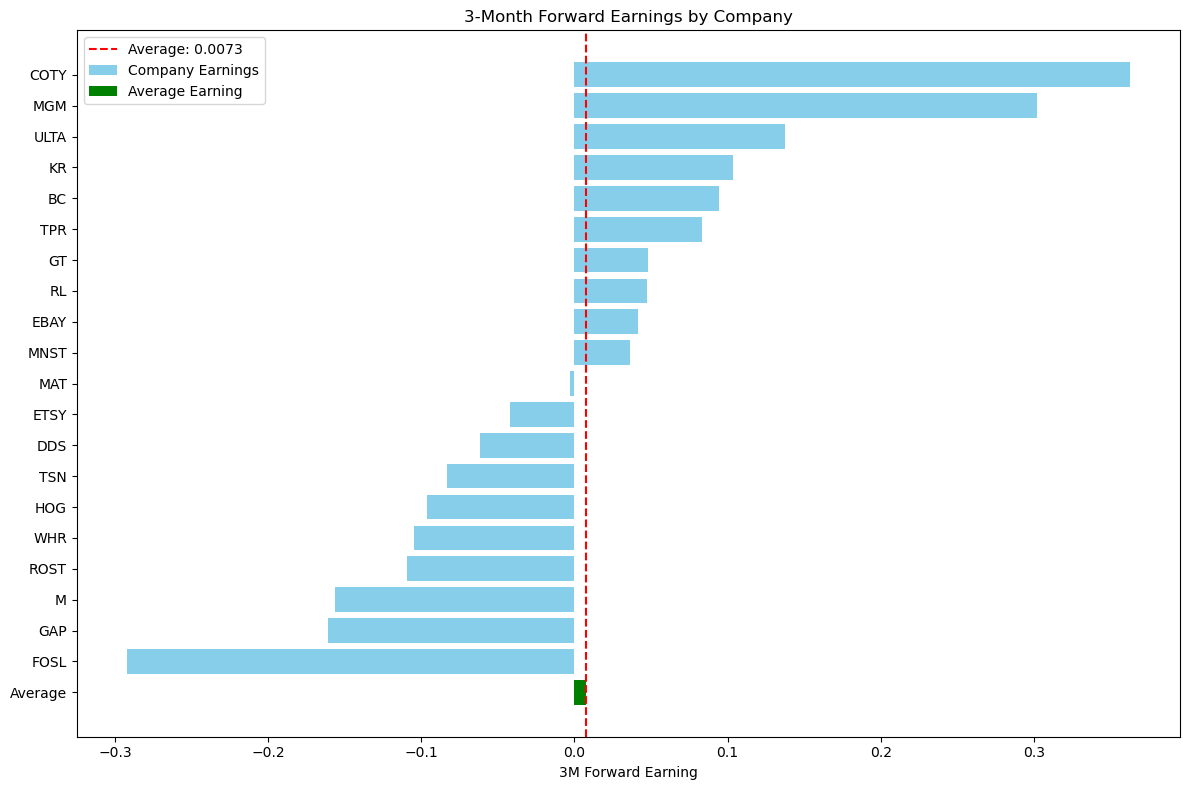

Company  3M Forward Earning
13     COTY            0.362600
11      MGM            0.301983
19     ULTA            0.137269
6        KR            0.103216
1        BC            0.094300
10      TPR            0.083441
14       GT            0.048086
8        RL            0.047383
5      EBAY            0.041756
9      MNST            0.036123
16      MAT           -0.002795
18     ETSY           -0.042092
7       DDS           -0.061968
12      TSN           -0.083019
17      HOG           -0.096547
2       WHR           -0.104571
15     ROST           -0.109643
0         M           -0.156483
3       GAP           -0.160635
4      FOSL           -0.292135
20  Average            0.007313

In [125]:
# FOR TOP 20
# Updated data with corrections
data = {
    'Company': ['M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 
                'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA'],
    '3M Forward Earning': [-0.15648284897446132, 0.09430041595065049, -0.10457106537307916, -0.16063545517032052, 
                           -0.29213477968943646, 0.04175559330531967, 0.10321565159865577, -0.061967559086969194, 
                           0.047383357529326424, 0.03612321035465164, 0.08344057973178642, 0.3019832758530571, 
                           -0.08301885072285516, 0.3625996790782787, 0.04808643228364578, -0.10964348076382206, 
                           -0.0027948149114794033, -0.09654663203134212, -0.042092276171726145, 0.1372685994616928]
}

# Create DataFrame and sort by '3M Forward Earning'
df = pd.DataFrame(data).sort_values(by='3M Forward Earning', ascending=False)

# Calculate average
average_earning = df['3M Forward Earning'].mean()

# Add average for display
df.loc[df.index.max() + 1] = ['Average', average_earning]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Company'], df['3M Forward Earning'], color='skyblue', label='Company Earnings')
plt.barh('Average', average_earning, color='green', label='Average Earning')  # Average bar in green

plt.axvline(x=average_earning, color='r', linestyle='--', label=f'Average: {average_earning:.4f}')
plt.title('3-Month Forward Earnings by Company')
plt.xlabel('3M Forward Earning')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.legend()
plt.tight_layout()
plt.show()

# Display the DataFrame
df

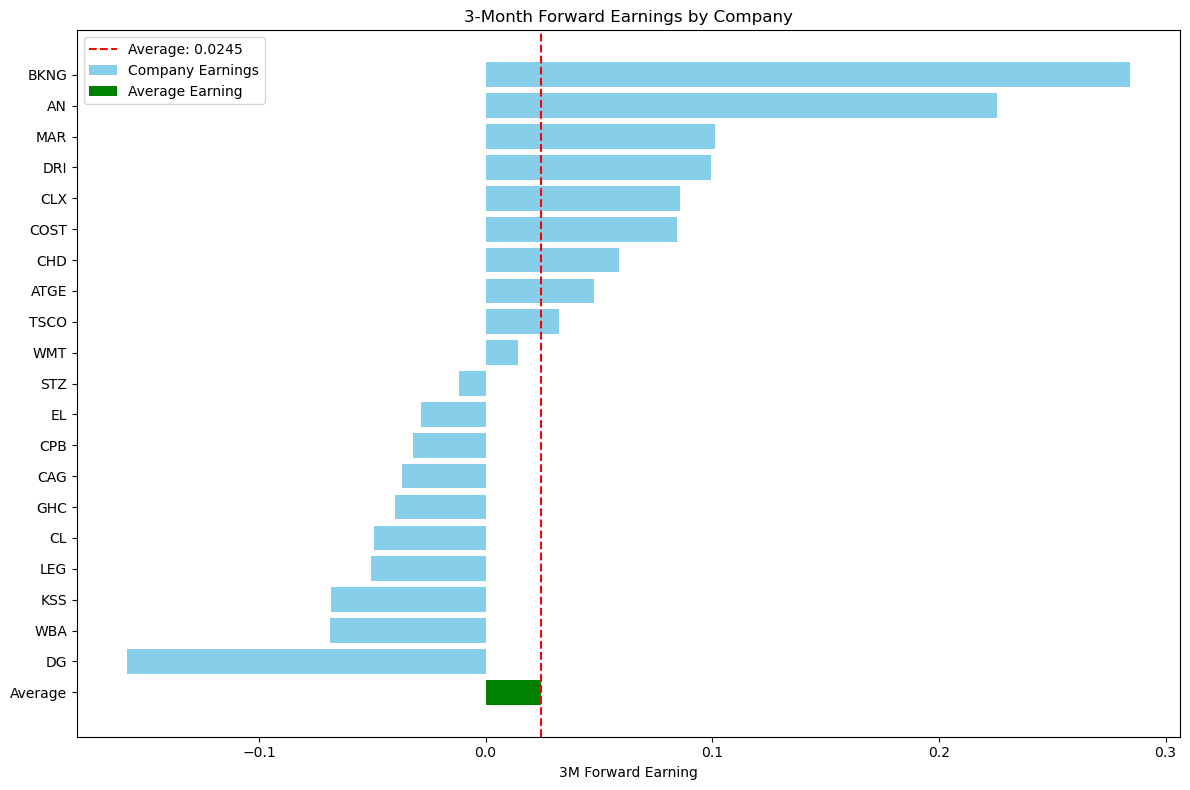

Company  3M Forward Earning
8      BKNG            0.284198
19       AN            0.225797
5       MAR            0.100981
16      DRI            0.099457
12      CLX            0.085618
13     COST            0.084275
10      CHD            0.058766
7      ATGE            0.048020
0      TSCO            0.032306
2       WMT            0.014415
3       STZ           -0.011819
17       EL           -0.028317
14      CPB           -0.032028
9       CAG           -0.037085
6       GHC           -0.039822
11       CL           -0.049033
18      LEG           -0.050567
4       KSS           -0.068024
1       WBA           -0.068836
15       DG           -0.158196
20  Average            0.024505

In [126]:
# for bot 20

# Updated data
data = {
    'Company': ['TSCO', 'WBA', 'WMT', 'STZ', 'KSS', 'MAR', 'GHC', 'ATGE', 'BKNG', 
                'CAG', 'CHD', 'CL', 'CLX', 'COST', 'CPB', 'DG', 'DRI', 'EL', 'LEG', 'AN'],
    '3M Forward Earning': [0.032305793308010956, -0.06883564541879869, 0.01441501248011629, -0.011818991077631166, 
                           -0.06802444514022314, 0.10098137508592428, -0.03982163399792245, 0.04802019250669634, 
                           0.28419802083918994, -0.0370847894283279, 0.05876615328088628, -0.04903320343854018, 
                           0.08561794183103974, 0.08427464770099183, -0.03202845574065435, -0.15819551956139394, 
                           0.09945696985713365, -0.028317129446283427, -0.050567008025360544, 0.225797343587452]
}

# Create DataFrame and sort by '3M Forward Earning'
df = pd.DataFrame(data).sort_values(by='3M Forward Earning', ascending=False)

# Calculate average
average_earning = df['3M Forward Earning'].mean()

# Add average for display
df.loc[df.index.max() + 1] = ['Average', average_earning]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Company'], df['3M Forward Earning'], color='skyblue', label='Company Earnings')
plt.barh('Average', average_earning, color='green', label='Average Earning')  # Average bar in green

plt.axvline(x=average_earning, color='r', linestyle='--', label=f'Average: {average_earning:.4f}')
plt.title('3-Month Forward Earnings by Company')
plt.xlabel('3M Forward Earning')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.legend()
plt.tight_layout()
plt.show()

# Display the DataFrame
df


##### Check top 20 and bot 20 from yf for 2022 Dec 31


In [127]:
# List of ticker symbols
tickers = [
    'BC', 'KO', 'MGM', 'PEP', 'MO', 'PVH', 'COTY', 'ETSY', 'FL', 'LW', 'GT', 'HSY', 'KR',
    'GIS', 'KMB', 'PG', 'CL', 'WBA', 'CHD', 'CPB', 'WHR', 'F', 'K', 'HRL', 'MAT', 'TJX',
    'SJM', 'MCD', 'VFC', 'CLX', 'GPC', 'DDS', 'SYY', 'MKC', 'LEN', 'HAS', 'GHC', 'PHM',
    'WMT', 'CAG', 'NKE', 'JWN', 'GAP', 'TAP', 'LEG', 'NWL', 'LOW', 'HD', 'STZ', 'HOG',
    'KBH', 'CCL', 'AN', 'ATGE', 'M', 'MHK', 'KSS', 'DHI', 'SBUX', 'TSN', 'FOSL', 'ORLY',
    'NVR', 'URBN', 'TSCO', 'DLTR', 'DRI', 'POOL', 'EL', 'TUP', 'WOR', 'RL', 'YUM', 'MAR',
    'EBAY', 'BKNG', 'COST', 'MNST', 'TPR', 'MDLZ', 'AAP', 'GME', 'KMX', 'WYNN', 'LKQ',
    'DPZ', 'LVS', 'UAA', 'CMG', 'TNL', 'HBI', 'ROST', 'ULTA', 'PM', 'DG', 'TSLA'
]

# Target date for the historical snapshot
target_date = datetime(2022, 12, 31)

# Calculate the date three months forward
three_months_later = target_date + timedelta(days=90)

# Function to fetch historical stock prices and calculate 3-month forward return
def get_forward_3m_return(ticker):
    try:
        # Fetch historical stock data
        stock_data = yf.download(ticker, start=target_date, end=three_months_later + timedelta(days=1))

        # Adjust for missing start date by picking the next available date
        if target_date not in stock_data.index:
            stock_data = stock_data[stock_data.index >= target_date]

        # Adjust for missing end date by picking the closest prior date
        if three_months_later not in stock_data.index:
            stock_data = stock_data[stock_data.index <= three_months_later]

        # Calculate the return if data is available
        if not stock_data.empty and len(stock_data['Close']) >= 2:
            initial_price = stock_data.iloc[0]['Close']
            final_price = stock_data.iloc[-1]['Close']
            return ((final_price - initial_price) / initial_price) * 100  # Return as percentage
        else:
            return None
    except Exception as e:
        return str(e)

# Apply the function to each ticker
forward_returns = {ticker: get_forward_3m_return(ticker) for ticker in tickers}

# Convert returns to a Pandas Series for easy sorting
returns_series = pd.Series(forward_returns)

# Get the top 20 and bottom 20 tickers and their returns
top_20 = returns_series.nlargest(20)
bottom_20 = returns_series.nsmallest(20)

# Lists of top and bottom 20 tickers
top_20_tickers = list(top_20.index)
bottom_20_tickers = list(bottom_20.index)

# Display results
print("Top 20 Stocks by 3-month Forward Return:")
print(top_20)
print("\nBottom 20 Stocks by 3-month Forward Return:")
print(bottom_20)
print("\nTop 20 Tickers List:", top_20_tickers)
print("Bottom 20 Tickers List:", bottom_20_tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Top 20 Stocks by 3-month Forward Return:
TSLA    91.914903
COTY    37.514251
GME     33.837206
MGM     33.473557
WOR     31.589659
WYNN    30.720714
BKNG    30.518498
CCL     27.352571
PHM     26.147181
AN      25.312441
PVH     24.943950
CMG     24.589931
KBH     23.783122
NVR     21.416466
LW      19.793692
LVS     16.460569
ULTA    15.698742
LEN     14.274839
URBN    14.262156
POOL    13.831738
dtype: float64

Bottom 20 Stocks by 3-month Forward Return:
FOSL   -28.089883
HBI    -21.842493
AAP    -19.750557
VFC    -17.411680
DG     -14.696820
HAS    -13.333337
M      -13.114752
HRL    -12.830599
GAP    -11.385701
ROST    -8.374346
WHR     -8.147215
HOG     -7.660500
NWL     -7.578012
WBA     -7.018007
TSN     -6.729558
HD      -6.580991
MHK     -6.213737
K       -6.047430
UAA     -5.946485
CL      -5.029693
dtype: float64

Top 20 Tickers List: ['TSLA', 'COTY', 'GME', 'MGM', 'WOR', 'WYNN', 'BKNG', 'CCL', 'PHM', 'AN', 'PVH', 'CMG', 'KBH', 'NVR', 'LW', 'LVS', 'ULTA', 'LEN', 'URBN', 'POO

##### correct hit rate for top 20

In [128]:

predicted_top = {'M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA'}
actual_top = {'TSLA', 'COTY', 'GME', 'MGM', 'WOR', 'WYNN', 'BKNG', 'CCL', 'PHM', 'AN', 'PVH', 'CMG', 'KBH', 'NVR', 'LW', 'LVS', 'ULTA', 'LEN', 'URBN', 'POOL'}


# Find common tickers
common_tickers_top = predicted_top.intersection(actual_top)

# Calculate hit rate
hit_rate_top = len(common_tickers_top) / len(predicted_top) * 100

common_tickers_top, hit_rate_top

({'COTY', 'MGM', 'ULTA'}, 15.0)

##### correct hit rate for bot 20

In [129]:
# Predicted and actual bottom 20 tickers
predicted_bottom = {'TSCO', 'WBA', 'WMT', 'STZ', 'KSS', 'MAR', 'GHC', 'ATGE', 'BKNG','CAG', 'CHD', 'CL', 'CLX', 'COST', 'CPB', 'DG', 'DRI', 'EL', 'LEG', 'AN'}
actual_bottom = {'TUP', 'FOSL', 'HBI', 'AAP', 'VFC', 'DG', 'HAS', 'M', 'HRL', 'GAP', 'ROST', 'WHR', 'HOG', 'NWL', 'WBA', 'TSN', 'HD', 'MHK', 'K', 'UAA'}

# Find common tickers
common_tickers_bottom = predicted_bottom.intersection(actual_bottom)

# Calculate hit rate
hit_rate_bottom = len(common_tickers_bottom) / len(predicted_bottom) * 100

common_tickers_bottom, hit_rate_bottom


({'DG', 'WBA'}, 10.0)

**random pick hit rate =  20 / 96 =  20.83%**

The hit rate is lower than random pick for 2022 Dec 31

#### Compare with SP500 

[*********************100%***********************]  20 of 20 completed

1 Failed download:
['GPS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  1 of 1 completed


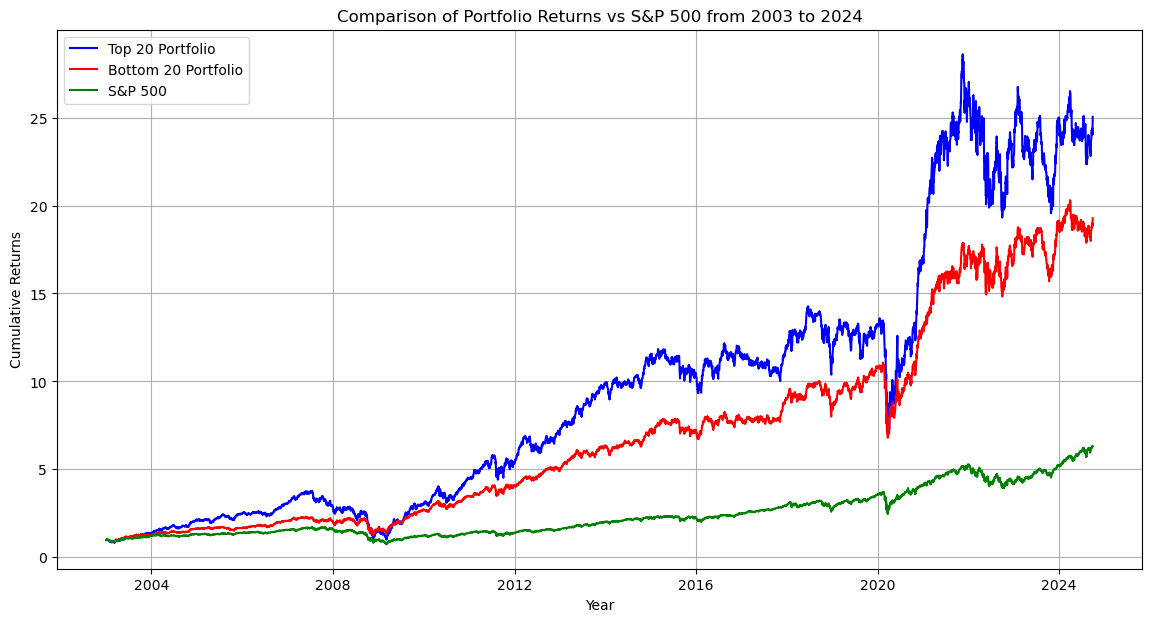

In [130]:
# Define the tickers for top 20 and bottom 20
top_20_tickers = ['M', 'BC', 'WHR', 'GPS', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']
bot_20_tickers = ['URBN', 'WMT', 'MAT', 'KSS', 'M', 'LW', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'COTY', 'CPB', 'DDS', 'DG', 'DRI', 'EL', 'LEG', 'AN']

# Define the time period
start_date = "2003-01-01"
end_date = "2024-09-30"

# Download historical data
top_20_data = yf.download(top_20_tickers, start=start_date, end=end_date)['Adj Close']
bot_20_data = yf.download(bot_20_tickers, start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns and cumulative returns
top_20_returns = top_20_data.pct_change().mean(axis=1).add(1).cumprod()
bot_20_returns = bot_20_data.pct_change().mean(axis=1).add(1).cumprod()
sp500_returns = sp500_data.pct_change().add(1).cumprod()

# Plotting the returns
plt.figure(figsize=(14, 7))
plt.plot(top_20_returns, label='Top 20 Portfolio', color='blue')
plt.plot(bot_20_returns, label='Bottom 20 Portfolio', color='red')
plt.plot(sp500_returns, label='S&P 500', color='green')
plt.title('Comparison of Portfolio Returns vs S&P 500 from 2003 to 2024')
plt.xlabel('Year')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

#### Compare with SP500 using daily rolling return to remove cumulative impact

[*********************100%***********************]  20 of 20 completed

1 Failed download:
['GPS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  1 of 1 completed


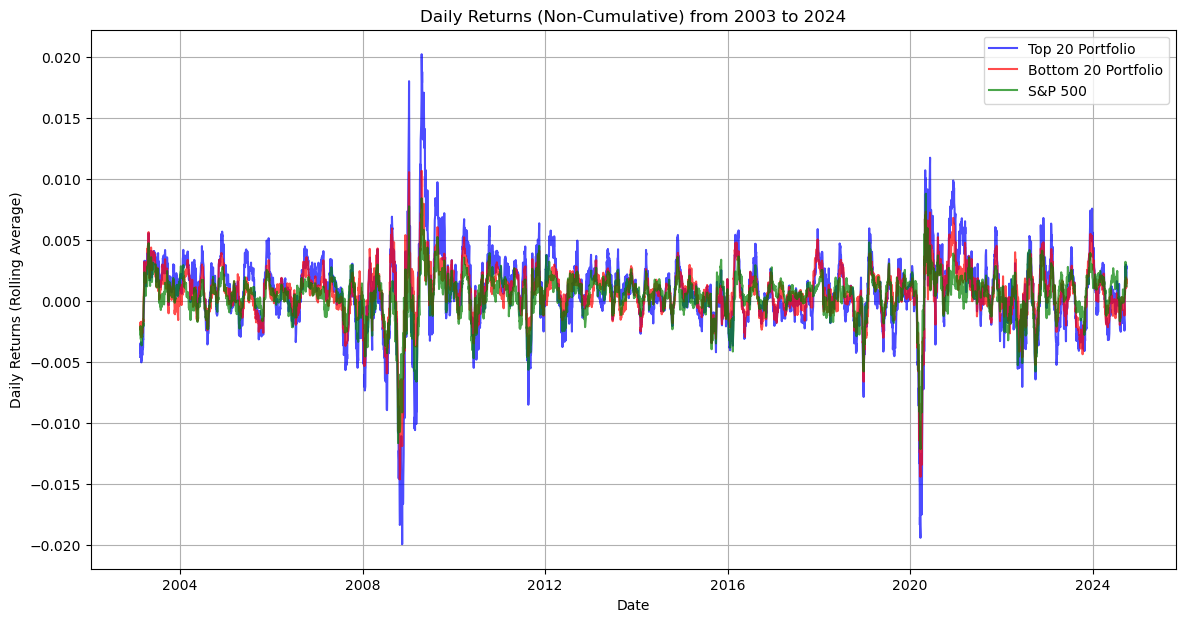

In [131]:
# Define the tickers for top 20 and bottom 20
top_20_tickers = ['M', 'BC', 'WHR', 'GPS', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']
bot_20_tickers = ['URBN', 'WMT', 'MAT', 'KSS', 'M', 'LW', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'COTY', 'CPB', 'DDS', 'DG', 'DRI', 'EL', 'LEG', 'AN']

# Define the time period
start_date = "2003-01-01"
end_date = "2024-09-30"

# Download historical data
top_20_data = yf.download(top_20_tickers, start=start_date, end=end_date)['Adj Close']
bot_20_data = yf.download(bot_20_tickers, start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns (non-cumulative)
top_20_daily_returns = top_20_data.pct_change().mean(axis=1)
bot_20_daily_returns = bot_20_data.pct_change().mean(axis=1)
sp500_daily_returns = sp500_data.pct_change()

# Rolling average of daily returns for smoother visualization (optional)
window_size = 30  # Rolling window in days
top_20_rolling_returns = top_20_daily_returns.rolling(window=window_size).mean()
bot_20_rolling_returns = bot_20_daily_returns.rolling(window=window_size).mean()
sp500_rolling_returns = sp500_daily_returns.rolling(window=window_size).mean()

# Plotting the daily returns
plt.figure(figsize=(14, 7))
plt.plot(top_20_rolling_returns, label='Top 20 Portfolio', color='blue', alpha=0.7)
plt.plot(bot_20_rolling_returns, label='Bottom 20 Portfolio', color='red', alpha=0.7)
plt.plot(sp500_rolling_returns, label='S&P 500', color='green', alpha=0.7)
plt.title('Daily Returns (Non-Cumulative) from 2003 to 2024')
plt.xlabel('Date')
plt.ylabel('Daily Returns (Rolling Average)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  20 of 20 completed

1 Failed download:
['GPS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  1 of 1 completed


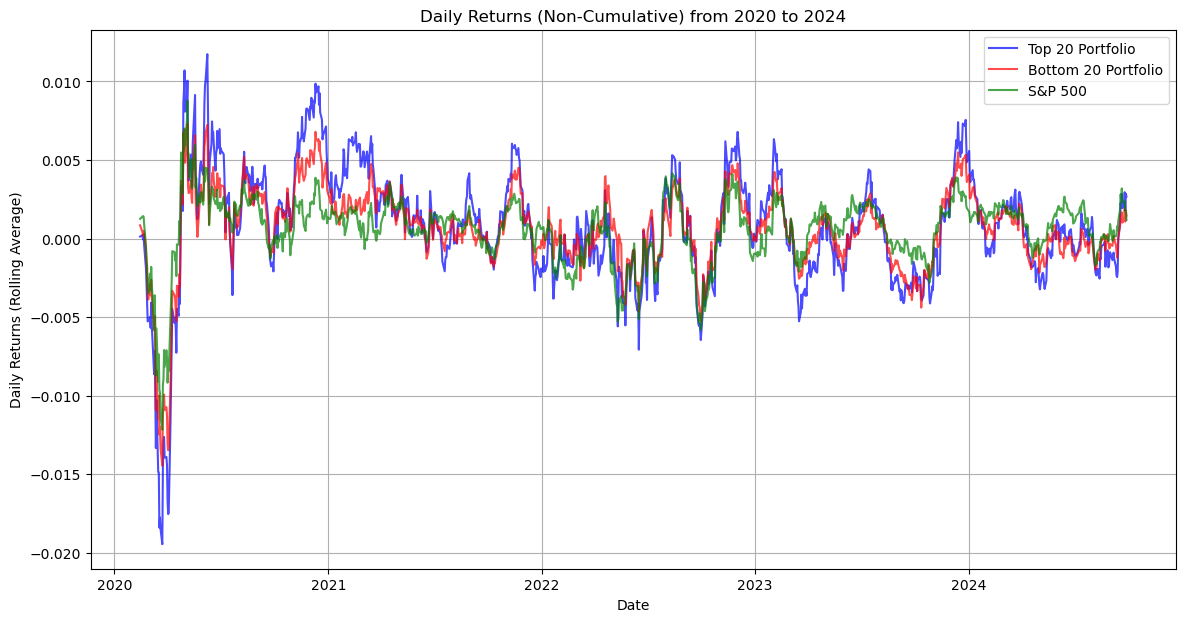

In [132]:
# Define the tickers for top 20 and bottom 20
top_20_tickers = ['M', 'BC', 'WHR', 'GPS', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']
bot_20_tickers = ['URBN', 'WMT', 'MAT', 'KSS', 'M', 'LW', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'COTY', 'CPB', 'DDS', 'DG', 'DRI', 'EL', 'LEG', 'AN']

# Define the time period
start_date = "2020-01-01"
end_date = "2024-09-30"

# Download historical data
top_20_data = yf.download(top_20_tickers, start=start_date, end=end_date)['Adj Close']
bot_20_data = yf.download(bot_20_tickers, start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns (non-cumulative)
top_20_daily_returns = top_20_data.pct_change().mean(axis=1)
bot_20_daily_returns = bot_20_data.pct_change().mean(axis=1)
sp500_daily_returns = sp500_data.pct_change()

# Rolling average of daily returns for smoother visualization (optional)
window_size = 30  # Rolling window in days
top_20_rolling_returns = top_20_daily_returns.rolling(window=window_size).mean()
bot_20_rolling_returns = bot_20_daily_returns.rolling(window=window_size).mean()
sp500_rolling_returns = sp500_daily_returns.rolling(window=window_size).mean()

# Plotting the daily returns
plt.figure(figsize=(14, 7))
plt.plot(top_20_rolling_returns, label='Top 20 Portfolio', color='blue', alpha=0.7)
plt.plot(bot_20_rolling_returns, label='Bottom 20 Portfolio', color='red', alpha=0.7)
plt.plot(sp500_rolling_returns, label='S&P 500', color='green', alpha=0.7)
plt.title('Daily Returns (Non-Cumulative) from 2020 to 2024')
plt.xlabel('Date')
plt.ylabel('Daily Returns (Rolling Average)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  20 of 20 completed

1 Failed download:
['GPS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  1 of 1 completed


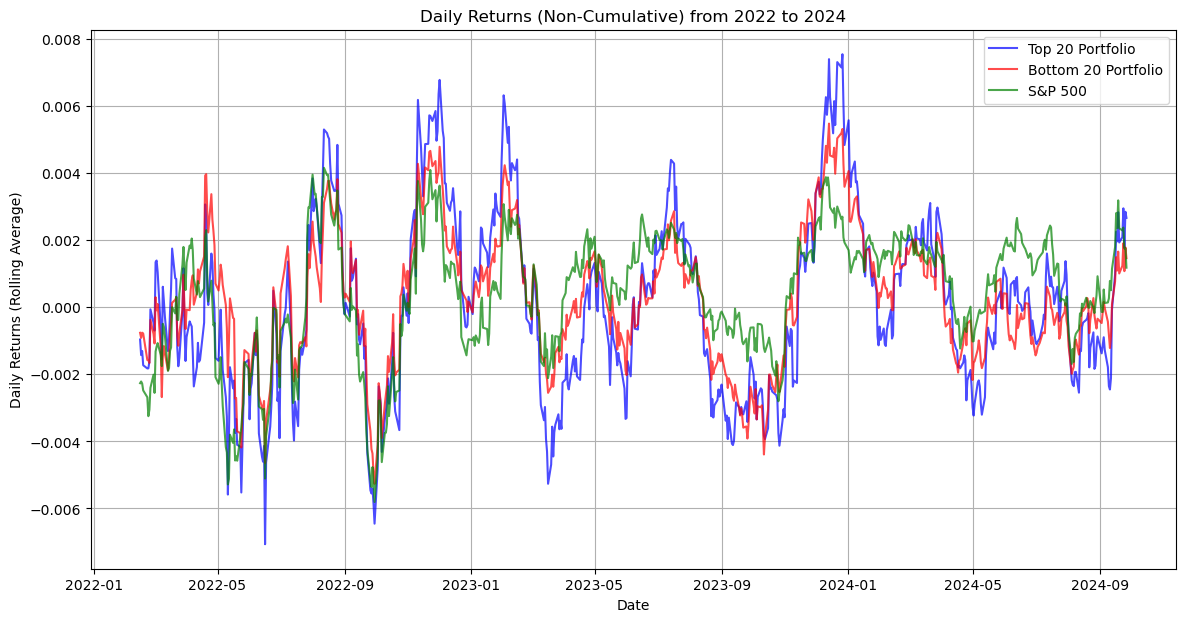

In [133]:
# Define the tickers for top 20 and bottom 20
top_20_tickers = ['M', 'BC', 'WHR', 'GPS', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']
bot_20_tickers = ['URBN', 'WMT', 'MAT', 'KSS', 'M', 'LW', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'COTY', 'CPB', 'DDS', 'DG', 'DRI', 'EL', 'LEG', 'AN']

# Define the time period
start_date = "2022-01-01"
end_date = "2024-09-30"

# Download historical data
top_20_data = yf.download(top_20_tickers, start=start_date, end=end_date)['Adj Close']
bot_20_data = yf.download(bot_20_tickers, start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns (non-cumulative)
top_20_daily_returns = top_20_data.pct_change().mean(axis=1)
bot_20_daily_returns = bot_20_data.pct_change().mean(axis=1)
sp500_daily_returns = sp500_data.pct_change()

# Rolling average of daily returns for smoother visualization (optional)
window_size = 30  # Rolling window in days
top_20_rolling_returns = top_20_daily_returns.rolling(window=window_size).mean()
bot_20_rolling_returns = bot_20_daily_returns.rolling(window=window_size).mean()
sp500_rolling_returns = sp500_daily_returns.rolling(window=window_size).mean()

# Plotting the daily returns
plt.figure(figsize=(14, 7))
plt.plot(top_20_rolling_returns, label='Top 20 Portfolio', color='blue', alpha=0.7)
plt.plot(bot_20_rolling_returns, label='Bottom 20 Portfolio', color='red', alpha=0.7)
plt.plot(sp500_rolling_returns, label='S&P 500', color='green', alpha=0.7)
plt.title('Daily Returns (Non-Cumulative) from 2022 to 2024')
plt.xlabel('Date')
plt.ylabel('Daily Returns (Rolling Average)')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  20 of 20 completed

1 Failed download:
['GPS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  20 of 20 completed
[*********************100%***********************]  1 of 1 completed


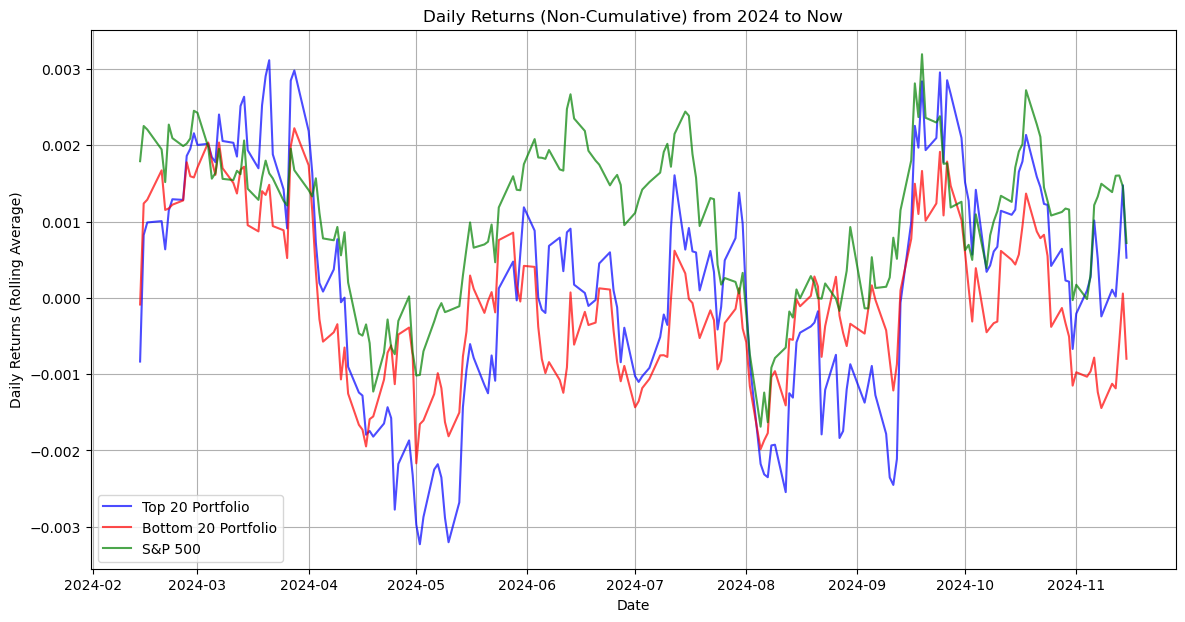

In [134]:
# Define the tickers for top 20 and bottom 20
top_20_tickers = ['M', 'BC', 'WHR', 'GPS', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']
bot_20_tickers = ['URBN', 'WMT', 'MAT', 'KSS', 'M', 'LW', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'COTY', 'CPB', 'DDS', 'DG', 'DRI', 'EL', 'LEG', 'AN']

# Define the time period
start_date = "2024-01-01"
end_date = "2024-11-16"

# Download historical data
top_20_data = yf.download(top_20_tickers, start=start_date, end=end_date)['Adj Close']
bot_20_data = yf.download(bot_20_tickers, start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily returns (non-cumulative)
top_20_daily_returns = top_20_data.pct_change().mean(axis=1)
bot_20_daily_returns = bot_20_data.pct_change().mean(axis=1)
sp500_daily_returns = sp500_data.pct_change()

# Rolling average of daily returns for smoother visualization (optional)
window_size = 30  # Rolling window in days
top_20_rolling_returns = top_20_daily_returns.rolling(window=window_size).mean()
bot_20_rolling_returns = bot_20_daily_returns.rolling(window=window_size).mean()
sp500_rolling_returns = sp500_daily_returns.rolling(window=window_size).mean()

# Plotting the daily returns
plt.figure(figsize=(14, 7))
plt.plot(top_20_rolling_returns, label='Top 20 Portfolio', color='blue', alpha=0.7)
plt.plot(bot_20_rolling_returns, label='Bottom 20 Portfolio', color='red', alpha=0.7)
plt.plot(sp500_rolling_returns, label='S&P 500', color='green', alpha=0.7)
plt.title('Daily Returns (Non-Cumulative) from 2024 to Now')
plt.xlabel('Date')
plt.ylabel('Daily Returns (Rolling Average)')
plt.legend()
plt.grid(True)
plt.show()

**Validate the result for 2023 June.**

In [135]:
# For TOP 20

import yfinance as yf
from datetime import datetime, timedelta

# List of tickers to query
tickers =['M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']

# Target date for the historical snapshot
target_date = datetime(2023, 6, 30)

# Calculate the date three months forward
three_months_later = target_date + timedelta(days=90)

# Function to fetch historical stock prices and calculate 3-month forward return
def get_forward_3m_return(ticker):
    try:
        # Fetch historical stock data
        stock_data = yf.download(ticker, start=target_date, end=three_months_later)

        # If data for exact start date is missing, try the next available date
        if target_date not in stock_data.index:
            stock_data = stock_data[stock_data.index >= target_date]

        # If data for exact end date is missing, try the previous available date
        if three_months_later not in stock_data.index:
            stock_data = stock_data[stock_data.index <= three_months_later]

        # Calculate the return
        if not stock_data.empty and len(stock_data['Close']) >= 2:
            initial_price = stock_data.iloc[0]['Close']
            final_price = stock_data.iloc[-1]['Close']
            return (final_price - initial_price) / initial_price
        else:
            return None
    except Exception as e:
        return str(e)

# Apply the function to each ticker
forward_returns = {ticker: get_forward_3m_return(ticker) for ticker in tickers}
forward_returns

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'M': -0.31775698879905007,
 'BC': -0.09706828360988715,
 'WHR': -0.12205114068657477,
 'GAP': 0.1522955890481882,
 'FOSL': -0.24902723825651632,
 'EBAY': -0.04027745116073414,
 'KR': -0.05361703101624834,
 'DDS': -0.034295704558266284,
 'RL': -0.06520681846335706,
 'MNST': -0.07520891013419115,
 'TPR': -0.34696258735590046,
 'MGM': -0.16917114754645124,
 'TSN': -0.01822100878710716,
 'COTY': -0.10333600553550132,
 'GT': -0.11257309411538344,
 'ROST': -0.028627478490148704,
 'MAT': 0.1177072225842562,
 'HOG': -0.07952284322254713,
 'ETSY': -0.26852619142900064,
 'ULTA': -0.16608585348151672}

In [136]:
# for bot 20
import yfinance as yf
from datetime import datetime, timedelta

# List of tickers to query
tickers =['TSCO', 'WBA', 'WMT', 'STZ', 'KSS', 'MAR', 'GHC', 'ATGE', 'BKNG', 'CAG', 'CHD', 'CL', 'CLX', 'COST', 'CPB', 'DG', 'DRI', 'EL', 'LEG', 'AN']

# Target date for the historical snapshot
target_date = datetime(2023, 6, 30)

# Calculate the date three months forward
three_months_later = target_date + timedelta(days=90)

# Function to fetch historical stock prices and calculate 3-month forward return
def get_forward_3m_return(ticker):
    try:
        # Fetch historical stock data
        stock_data = yf.download(ticker, start=target_date, end=three_months_later)

        # If data for exact start date is missing, try the next available date
        if target_date not in stock_data.index:
            stock_data = stock_data[stock_data.index >= target_date]

        # If data for exact end date is missing, try the previous available date
        if three_months_later not in stock_data.index:
            stock_data = stock_data[stock_data.index <= three_months_later]

        # Calculate the return
        if not stock_data.empty and len(stock_data['Close']) >= 2:
            initial_price = stock_data.iloc[0]['Close']
            final_price = stock_data.iloc[-1]['Close']
            return (final_price - initial_price) / initial_price
        else:
            return None
    except Exception as e:
        return str(e)

# Apply the function to each ticker
forward_returns = {ticker: get_forward_3m_return(ticker) for ticker in tickers}
forward_returns


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

{'TSCO': -0.08181823200950172,
 'WBA': -0.2621972402024106,
 'WMT': 0.028884063443283887,
 'STZ': 0.01812047034737442,
 'KSS': -0.15227758948858064,
 'MAR': 0.05547390879183354,
 'GHC': 0.009571694416652213,
 'ATGE': 0.254222466611679,
 'BKNG': 0.1415863331233378,
 'CAG': -0.18327402376787094,
 'CHD': -0.08241047450447948,
 'CL': -0.0777517885849642,
 'CLX': -0.18794014494123246,
 'COST': 0.04671426164784264,
 'CPB': -0.09297746849974654,
 'DG': -0.38543999830318093,
 'DRI': -0.15351932531823773,
 'EL': -0.286892810855667,
 'LEG': -0.16812968630941638,
 'AN': -0.07259581376546516}

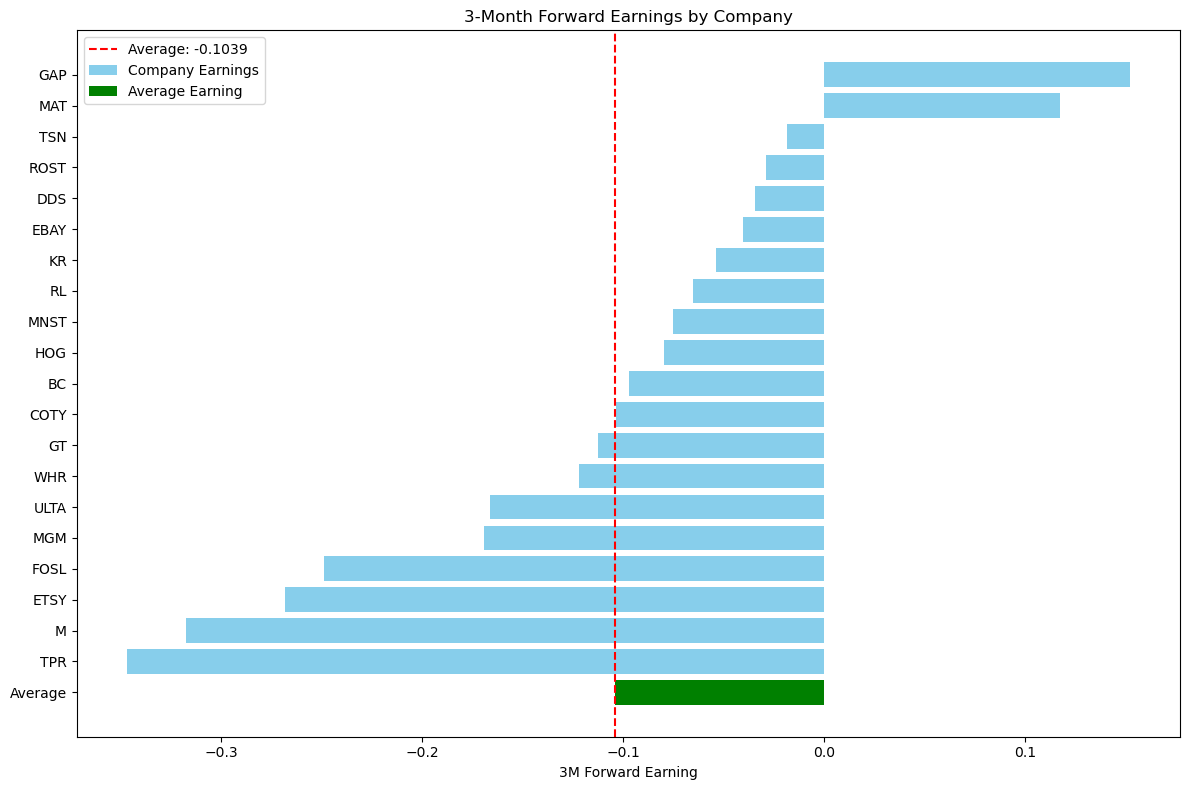

    Company  3M Forward Earning
3       GAP            0.152296
16      MAT            0.117707
12      TSN           -0.018221
15     ROST           -0.028627
7       DDS           -0.034296
5      EBAY           -0.040277
6        KR           -0.053617
8        RL           -0.065207
9      MNST           -0.075209
17      HOG           -0.079523
1        BC           -0.097068
13     COTY           -0.103336
14       GT           -0.112573
2       WHR           -0.122051
19     ULTA           -0.166086
11      MGM           -0.169171
4      FOSL           -0.249027
18     ETSY           -0.268526
0         M           -0.317757
10      TPR           -0.346963
20  Average           -0.103877


In [137]:
# For top 20
import pandas as pd
import matplotlib.pyplot as plt

# Updated data with corrections
data = {
    'Company': ['M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 
                'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA'],
    '3M Forward Earning': [-0.31775698879905007, -0.09706828360988715, -0.12205114068657477, 0.1522955890481882, 
                           -0.24902723825651632, -0.04027745116073414, -0.05361703101624834, -0.034295704558266284, 
                           -0.06520681846335706, -0.07520891013419115, -0.34696258735590046, -0.16917114754645124, 
                           -0.01822100878710716, -0.10333600553550132, -0.11257309411538344, -0.028627478490148704, 
                           0.1177072225842562, -0.07952284322254713, -0.26852619142900064, -0.16608585348151672]
}

# Create DataFrame and sort by '3M Forward Earning'
df = pd.DataFrame(data).sort_values(by='3M Forward Earning', ascending=False)

# Calculate average
average_earning = df['3M Forward Earning'].mean()

# Add average for display
df.loc[df.index.max() + 1] = ['Average', average_earning]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(df['Company'], df['3M Forward Earning'], color='skyblue', label='Company Earnings')
plt.barh('Average', average_earning, color='green', label='Average Earning')  # Average bar in green

plt.axvline(x=average_earning, color='r', linestyle='--', label=f'Average: {average_earning:.4f}')
plt.title('3-Month Forward Earnings by Company')
plt.xlabel('3M Forward Earning')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.legend()
plt.tight_layout()
plt.show()

# Display the DataFrame
print(df)


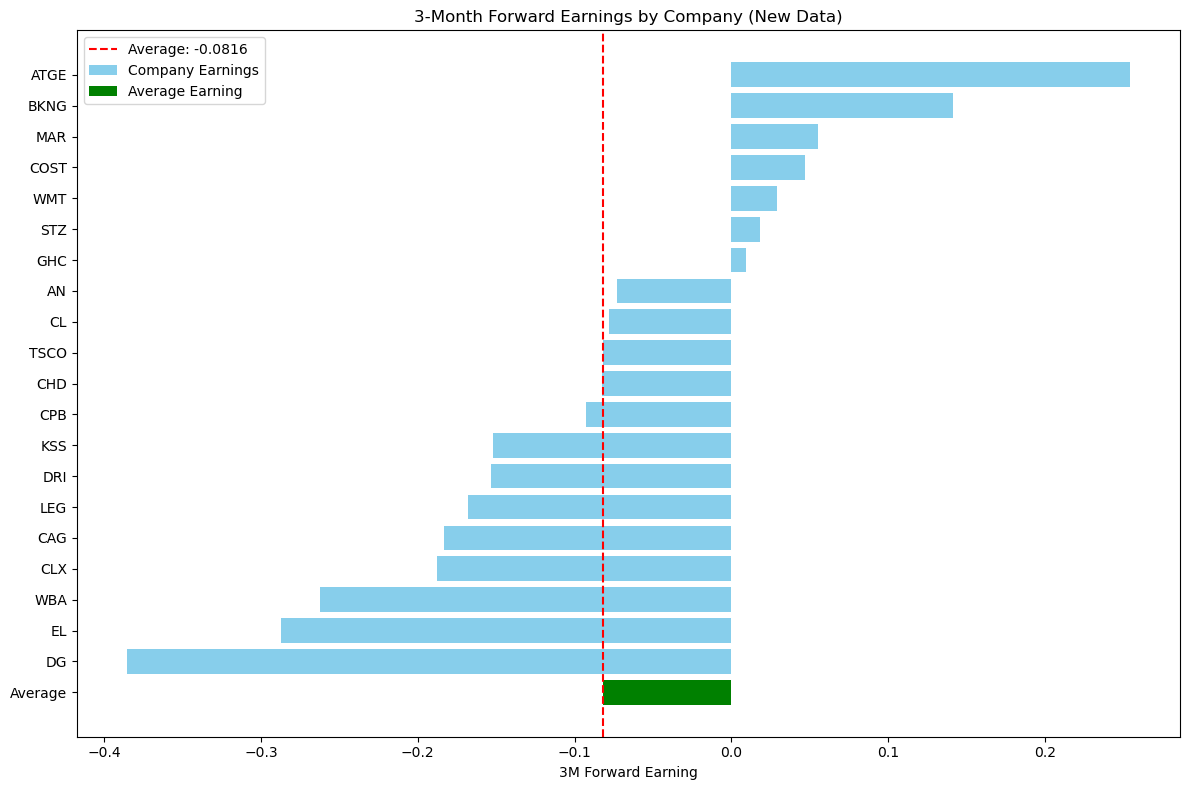

Company  3M Forward Earning
7      ATGE            0.254222
8      BKNG            0.141586
5       MAR            0.055474
13     COST            0.046714
2       WMT            0.028884
3       STZ            0.018120
6       GHC            0.009572
19       AN           -0.072596
11       CL           -0.077752
0      TSCO           -0.081818
10      CHD           -0.082410
14      CPB           -0.092977
4       KSS           -0.152278
16      DRI           -0.153519
18      LEG           -0.168130
9       CAG           -0.183274
12      CLX           -0.187940
1       WBA           -0.262197
17       EL           -0.286893
15       DG           -0.385440
20  Average           -0.081633

In [138]:
# For bot 20
# New updated data
data_new = {
    'Company': ['TSCO', 'WBA', 'WMT', 'STZ', 'KSS', 'MAR', 'GHC', 'ATGE', 'BKNG', 'CAG', 
                'CHD', 'CL', 'CLX', 'COST', 'CPB', 'DG', 'DRI', 'EL', 'LEG', 'AN'],
    '3M Forward Earning': [-0.08181823200950172, -0.2621972402024106, 0.028884063443283887, 0.01812047034737442, 
                           -0.15227758948858064, 0.05547390879183354, 0.009571694416652213, 0.254222466611679, 
                           0.1415863331233378, -0.18327402376787094, -0.08241047450447948, -0.0777517885849642, 
                           -0.18794014494123246, 0.04671426164784264, -0.09297746849974654, -0.38543999830318093, 
                           -0.15351932531823773, -0.286892810855667, -0.16812968630941638, -0.07259581376546516]
}

# Create DataFrame and sort by '3M Forward Earning'
df_new = pd.DataFrame(data_new).sort_values(by='3M Forward Earning', ascending=False)

# Calculate average
average_earning_new = df_new['3M Forward Earning'].mean()

# Add average for display
df_new.loc[df_new.index.max() + 1] = ['Average', average_earning_new]

# Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(df_new['Company'], df_new['3M Forward Earning'], color='skyblue', label='Company Earnings')
plt.barh('Average', average_earning_new, color='green', label='Average Earning')  # Average bar in green

plt.axvline(x=average_earning_new, color='r', linestyle='--', label=f'Average: {average_earning_new:.4f}')
plt.title('3-Month Forward Earnings by Company (New Data)')
plt.xlabel('3M Forward Earning')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top
plt.legend()
plt.tight_layout()
plt.show()

# Display the DataFrame
df_new


##### Check real top 20 and bot 20 for 2023 June

In [139]:
# List of ticker symbols
tickers = [
    'BC', 'KO', 'MGM', 'PEP', 'MO', 'PVH', 'COTY', 'ETSY', 'FL', 'LW', 'GT', 'HSY', 'KR',
    'GIS', 'KMB', 'PG', 'CL', 'WBA', 'CHD', 'CPB', 'WHR', 'F', 'K', 'HRL', 'MAT', 'TJX',
    'SJM', 'MCD', 'VFC', 'CLX', 'GPC', 'DDS', 'SYY', 'MKC', 'LEN', 'HAS', 'GHC', 'PHM',
    'WMT', 'CAG', 'NKE', 'JWN', 'GAP', 'TAP', 'LEG', 'NWL', 'LOW', 'HD', 'STZ', 'HOG',
    'KBH', 'CCL', 'AN', 'ATGE', 'M', 'MHK', 'KSS', 'DHI', 'SBUX', 'TSN', 'FOSL', 'ORLY',
    'NVR', 'URBN', 'TSCO', 'DLTR', 'DRI', 'POOL', 'EL', 'TUP', 'WOR', 'RL', 'YUM', 'MAR',
    'EBAY', 'BKNG', 'COST', 'MNST', 'TPR', 'MDLZ', 'AAP', 'GME', 'KMX', 'WYNN', 'LKQ',
    'DPZ', 'LVS', 'UAA', 'CMG', 'TNL', 'HBI', 'ROST', 'ULTA', 'PM', 'DG', 'TSLA'
]

# Target date for the historical snapshot
target_date = datetime(2023, 6, 30)

# Calculate the date three months forward
three_months_later = target_date + timedelta(days=90)

# Function to fetch historical stock prices and calculate 3-month forward return
def get_forward_3m_return(ticker):
    try:
        # Fetch historical stock data
        stock_data = yf.download(ticker, start=target_date, end=three_months_later + timedelta(days=1))

        # Adjust for missing start date by picking the next available date
        if target_date not in stock_data.index:
            stock_data = stock_data[stock_data.index >= target_date]

        # Adjust for missing end date by picking the closest prior date
        if three_months_later not in stock_data.index:
            stock_data = stock_data[stock_data.index <= three_months_later]

        # Calculate the return if data is available
        if not stock_data.empty and len(stock_data['Close']) >= 2:
            initial_price = stock_data.iloc[0]['Close']
            final_price = stock_data.iloc[-1]['Close']
            return ((final_price - initial_price) / initial_price) * 100  # Return as percentage
        else:
            return None
    except Exception as e:
        return str(e)

# Apply the function to each ticker
forward_returns = {ticker: get_forward_3m_return(ticker) for ticker in tickers}

# Convert returns to a Pandas Series for easy sorting
returns_series = pd.Series(forward_returns)

# Get the top 20 and bottom 20 tickers and their returns
top_20 = returns_series.nlargest(20)
bottom_20 = returns_series.nsmallest(20)

# Lists of top and bottom 20 tickers
top_20_tickers = list(top_20.index)
bottom_20_tickers = list(bottom_20.index)

# Display results
print("Top 20 Stocks by 3-month Forward Return:")
print(top_20)
print("\nBottom 20 Stocks by 3-month Forward Return:")
print(bottom_20)
print("\nTop 20 Tickers List:", top_20_tickers)
print("Bottom 20 Tickers List:", bottom_20_tickers)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Top 20 Stocks by 3-month Forward Return:
ATGE    25.655216
GAP     18.477039
BKNG    14.979650
DPZ     13.448473
MAT     13.203684
MAR      8.634112
TJX      5.649252
COST     5.618708
WMT      3.410103
GHC      2.500532
STZ      2.226464
HAS      1.250587
DDS      0.582320
NWL      0.000000
ROST    -0.285383
TSN     -2.174766
HD      -2.301707
EBAY    -2.327136
URBN    -2.565657
PG      -3.558725
dtype: float64

Bottom 20 Stocks by 3-month Forward Return:
DG     -37.937329
FL     -37.440064
TPR    -34.205607
GME    -30.556700
JWN    -29.311183
M      -28.722741
EL     -27.716675
WBA    -26.640927
DLTR   -25.547041
ETSY   -24.654297
CCL    -23.313863
AAP    -21.664300
LVS    -21.465519
FOSL   -21.400777
HBI    -20.704847
LW     -19.799909
HSY    -19.167001
CLX    -19.127263
NKE    -18.791343
CAG    -18.623963
dtype: float64

Top 20 Tickers List: ['ATGE', 'GAP', 'BKNG', 'DPZ', 'MAT', 'MAR', 'TJX', 'COST', 'WMT', 'GHC', 'STZ', 'HAS', 'DDS', 'NWL', 'ROST', 'TSN', 'HD', 'EBAY', 'URBN', 'PG

##### correct hit rate for top 20

In [140]:

predicted_top = {'M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA'}
actual_top = {'TUP', 'ATGE', 'GAP', 'BKNG', 'DPZ', 'MAT', 'MAR', 'TJX', 'COST', 'WMT', 'GHC', 'STZ', 'HAS', 'DDS', 'NWL', 'ROST', 'TSN', 'HD', 'EBAY', 'URBN'}


# Find common tickers
common_tickers_top = predicted_top.intersection(actual_top)

# Calculate hit rate
hit_rate_top = len(common_tickers_top) / len(predicted_top) * 100

common_tickers_top, hit_rate_top

({'DDS', 'EBAY', 'GAP', 'MAT', 'ROST', 'TSN'}, 30.0)

##### correct hit rate for bot 20

In [141]:
# Predicted and actual bottom 20 tickers
predicted_bottom = {'TSCO', 'WBA', 'WMT', 'STZ', 'KSS', 'MAR', 'GHC', 'ATGE', 'BKNG','CAG', 'CHD', 'CL', 'CLX', 'COST', 'CPB', 'DG', 'DRI', 'EL', 'LEG', 'AN'}
actual_bottom = {'DG', 'FL', 'TPR', 'GME', 'JWN', 'M', 'EL', 'WBA', 'DLTR', 'ETSY', 'CCL', 'AAP', 'LVS', 'FOSL', 'HBI', 'LW', 'HSY', 'CLX', 'NKE', 'CAG'}

# Find common tickers
common_tickers_bottom = predicted_bottom.intersection(actual_bottom)

# Calculate hit rate
hit_rate_bottom = len(common_tickers_bottom) / len(predicted_bottom) * 100

common_tickers_bottom, hit_rate_bottom

({'CAG', 'CLX', 'DG', 'EL', 'WBA'}, 25.0)

**random pick hit rate =  20 / 96 =  20.83%**

The hit rate is higher than random pick for 2023 June 30

## GPT Prompt for 2023 June 30 for TOP 20 Stocks

#### “Our stock universe is 'Consumer Staples and Consumer Discretionary. You have information and historical data till the end of 2022 to train the predicted model. Here are the tickers: ['M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']. Collect the historical data till June, 2023 and calculate 3-month forward return for top 20 stocks. What would be your portfolio decision then? Use the latest data, news and information from yahoo finance."

[*********************100%***********************]  20 of 20 completed

1 Failed download:
['GPA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2023-06-01 -> 2023-09-30)')
posx and posy should be finite values
posx and posy should be finite values


Top 20 Stocks by 3-Month Forward Return (July - September 2023)
   Ticker  3-Month Forward Return (July - September 2023)
16    MAT                                       12.743089
7     DDS                                        1.468883
15   ROST                                        1.009085
12    TSN                                       -0.196467
5    EBAY                                       -0.788324
6      KR                                       -4.220165
8      RL                                       -5.230867
17    HOG                                       -5.641859
9    MNST                                       -7.816849
1      BC                                       -8.370139
2     WHR                                       -8.968287
14     GT                                       -9.137427
13   COTY                                      -10.740437
19   ULTA                                      -15.118996
11    MGM                                      -16.302368
4    FOS

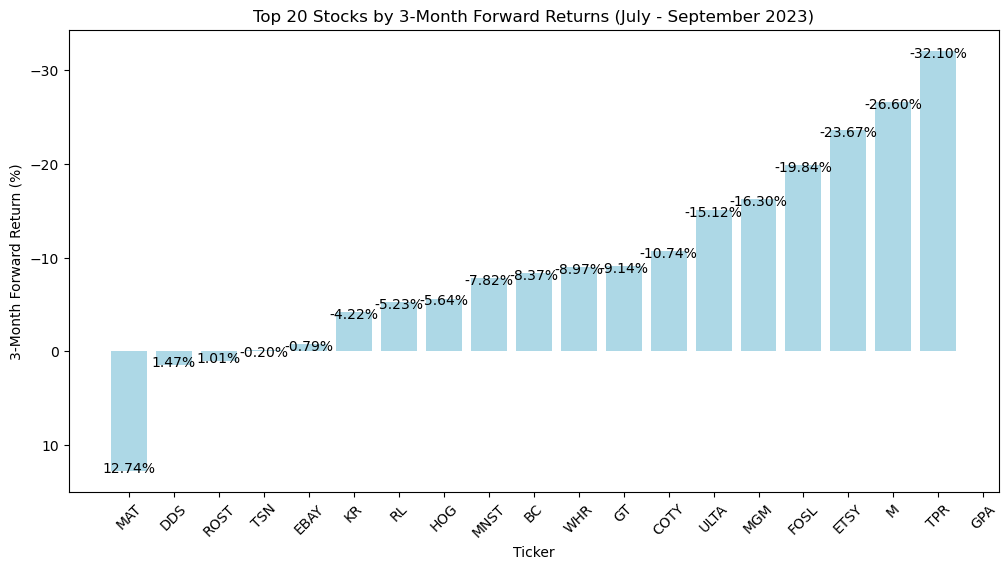

In [142]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock tickers and date range
tickers = ['M', 'BC', 'WHR', 'GPA', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']
start_date = "2023-06-01"
end_date = "2023-09-30"

# Fetch historical data from Yahoo Finance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate 3-month forward return for each stock
returns = {}
for ticker in tickers:
    try:
        start_price = data.loc['2023-06-30', ticker]
        end_price = data.loc['2023-09-29', ticker]
        forward_return = ((end_price - start_price) / start_price) * 100  # Calculate percentage return
        returns[ticker] = forward_return
    except KeyError:
        # Handle missing data
        returns[ticker] = None

# Create a DataFrame to display the results
results_df = pd.DataFrame(list(returns.items()), columns=['Ticker', '3-Month Forward Return (July - September 2023)'])
results_df['Company Name'] = [
    "Macy's Inc.", "Brunswick Corp.", "Whirlpool Corp.", "Gap, Inc.", "Fossil Group Inc.", 
    "eBay Inc.", "Kroger Co.", "Dillard's Inc.", "Ralph Lauren Corp.", "Monster Beverage Corp.", 
    "Tapestry Inc.", "MGM Resorts International", "Tyson Foods, Inc.", "Coty Inc.", 
    "Goodyear Tire & Rubber Co.", "Ross Stores, Inc.", "Mattel, Inc.", "Harley-Davidson, Inc.", 
    "Etsy Inc.", "Ulta Beauty Inc."
]

# Reorder columns and sort DataFrame by returns
results_df = results_df[['Ticker',  '3-Month Forward Return (July - September 2023)']]
results_df.sort_values(by='3-Month Forward Return (July - September 2023)', ascending=False, inplace=True)

# Display top 20 stocks
top_20_stocks = results_df.head(20)

# Display the DataFrame of top 20 stocks
print("Top 20 Stocks by 3-Month Forward Return (July - September 2023)")
print(top_20_stocks)

# Plotting the top 20 stocks by 3-Month Forward Return with inverted y-axis
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_stocks['Ticker'], top_20_stocks['3-Month Forward Return (July - September 2023)'], color='lightblue')
plt.xlabel('Ticker')
plt.ylabel('3-Month Forward Return (%)')
plt.title('Top 20 Stocks by 3-Month Forward Returns (July - September 2023)')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest values at the top

# Add percentage return text on each bar
for bar, return_val in zip(bars, top_20_stocks['3-Month Forward Return (July - September 2023)']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + (1 if return_val < 0 else -1),  # Adjust position slightly based on return direction
        f'{return_val:.2f}%',
        ha='center',
        va='bottom' if return_val < 0 else 'top'
    )

plt.show()


#### GPT hit rate for top 20

In [143]:
gpt_top = {'MAT', 'DDS', 'ROST', 'TSN', 'EBAY', 'KR', 'RL', 'HOG', 'MNST', 'BC', 'WHR', 'GT', 'COTY', 'ULTA', 'MGM', 'FOSL', 'ETSY', 'M', 'TPR', 'GAP'}
actual_top = {'TUP', 'ATGE', 'GAP', 'BKNG', 'DPZ', 'MAT', 'MAR', 'TJX', 'COST', 'WMT', 'GHC', 'STZ', 'HAS', 'DDS', 'NWL', 'ROST', 'TSN', 'HD', 'EBAY', 'URBN'}


# Find common tickers
common_tickers_top = gpt_top.intersection(actual_top)

# Calculate hit rate
hit_rate_top = len(common_tickers_top) / len(gpt_top) * 100

common_tickers_top, hit_rate_top

({'DDS', 'EBAY', 'GAP', 'MAT', 'ROST', 'TSN'}, 30.0)

Second GPT Prompt for June 30, 2023 for TOP 20 Stocks

Our stock universe is 'Consumer Staples and Consumer Discretionary. Collect the historical data till June, 2023 and calculate 3-month forward return for top 20 stocks. What would be your portfolio decision then? What to buy among your stock universe based on the information available?

In [144]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import numpy as np

# Define the stock universe
consumer_staples = ['PG', 'KO', 'PEP', 'PM', 'UL', 'WMT', 'COST', 'MDLZ', 'KMB', 'CL']
consumer_discretionary = ['AMZN', 'TSLA', 'NKE', 'SBUX', 'MCD', 'HD', 'LOW', 'TGT', 'TJX', 'DG']
stock_universe = consumer_staples + consumer_discretionary

# Fetch historical data until June 2023
start_date = '2018-01-01'
end_date = '2023-06-30'
data = {}

for ticker in stock_universe:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Calculate 3-month forward returns
returns = {}
for ticker, df in data.items():
    if len(df) > 63:
        df['3M_Forward_Return'] = df['Adj Close'].shift(-63) / df['Adj Close'] - 1
        returns[ticker] = df['3M_Forward_Return'].iloc[:-63].mean()  # Average forward return up to June 2023

# Rank stocks by their calculated 3-month forward return
top_20_stocks = pd.Series(returns).nlargest(20)
print("Top 20 stocks by average 3-month forward return up to June 2023:")
print(top_20_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Top 20 stocks by average 3-month forward return up to June 2023:
TSLA    0.181513
COST    0.056026
LOW     0.055213
TGT     0.053894
TJX     0.044257
SBUX    0.042402
DG      0.041890
NKE     0.040610
PG      0.039191
MCD     0.036898
AMZN    0.035543
HD      0.035243
MDLZ    0.034413
PEP     0.033601
WMT     0.029911
KO      0.026886
KMB     0.021330
PM      0.016028
CL      0.012244
UL      0.010633
dtype: float64


#### GPT Prompt for 2023 June 30 for Bottom 20 Stocks

“Our stock universe is 'Consumer Staples and Consumer Discretionary. You have information and historical data till the end of 2022 to train the predicted model. Here are the tickers: [ 'BC', 'KO', 'MGM', 'PEP', 'MO', 'PVH', 'COTY', 'ETSY', 'FL', 'LW', 'GT', 'HSY', 'KR', 'GIS', 'KMB', 'PG', 'CL', 'WBA', 'CHD', 'CPB', 'WHR', 'F', 'K', 'HRL', 'MAT', 'TJX', 'SJM', 'MCD', 'VFC', 'CLX', 'GPC', 'DDS', 'SYY', 'MKC', 'LEN', 'HAS', 'GHC', 'PHM', 'WMT', 'CAG', 'NKE', 'JWN', 'GAP', 'TAP', 'LEG', 'NWL', 'LOW', 'HD', 'STZ', 'HOG', 'KBH', 'CCL', 'AN', 'ATGE', 'M', 'MHK', 'KSS', 'DHI', 'SBUX', 'TSN', 'FOSL', 'ORLY', 'NVR', 'URBN', 'TSCO', 'DLTR', 'DRI', 'POOL', 'EL', 'TUP', 'WOR', 'RL', 'YUM', 'MAR', 'EBAY', 'BKNG', 'COST', 'MNST', 'TPR', 'MDLZ', 'AAP', 'GME', 'KMX', 'WYNN', 'LKQ', 'DPZ', 'LVS', 'UAA', 'CMG', 'TNL', 'HBI', 'ROST', 'ULTA', 'PM', 'DG', 'TSLA' ]. Collect the historical data till June, 2023 and calculate 3-month forward return for bottom 20 stocks. What would be your portfolio decision then? Use the latest data, news and information from yahoo finance."

In [145]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock universe
stock_universe = [
    'BC', 'KO', 'MGM', 'PEP', 'MO', 'PVH', 'COTY', 'ETSY', 'FL', 'LW', 'GT', 'HSY', 'KR',
    'GIS', 'KMB', 'PG', 'CL', 'WBA', 'CHD', 'CPB', 'WHR', 'F', 'K', 'HRL', 'MAT', 'TJX',
    'SJM', 'MCD', 'VFC', 'CLX', 'GPC', 'DDS', 'SYY', 'MKC', 'LEN', 'HAS', 'GHC', 'PHM',
    'WMT', 'CAG', 'NKE', 'JWN', 'GAP', 'TAP', 'LEG', 'NWL', 'LOW', 'HD', 'STZ', 'HOG',
    'KBH', 'CCL', 'AN', 'ATGE', 'M', 'MHK', 'KSS', 'DHI', 'SBUX', 'TSN', 'FOSL', 'ORLY',
    'NVR', 'URBN', 'TSCO', 'DLTR', 'DRI', 'POOL', 'EL', 'TUP', 'WOR', 'RL', 'YUM', 'MAR',
    'EBAY', 'BKNG', 'COST', 'MNST', 'TPR', 'MDLZ', 'AAP', 'GME', 'KMX', 'WYNN', 'LKQ',
    'DPZ', 'LVS', 'UAA', 'CMG', 'TNL', 'HBI', 'ROST', 'ULTA', 'PM', 'DG', 'TSLA'
]

# Fetch historical data until June 2023
start_date = '2018-01-01'  # Adjust start date as needed
end_date = '2023-06-30'
data = {}

for ticker in stock_universe:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Calculate 3-month forward returns
returns = {}
for ticker, df in data.items():
    if len(df) > 63:  # Ensure there are enough rows to calculate a forward return
        df['3M_Forward_Return'] = df['Adj Close'].shift(-63) / df['Adj Close'] - 1
        returns[ticker] = df['3M_Forward_Return'].iloc[:-63].mean()  # Average forward return up to June 2023

# Sort stocks by 3-month forward return to identify the bottom 20 stocks
bottom_20_stocks = pd.Series(returns).nsmallest(20)
print("Bottom 20 stocks by average 3-month forward return up to June 2023:")
print(bottom_20_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Bottom 20 stocks by average 3-month forward return up to June 2023:
CCL    -0.035686
VFC    -0.035646
HBI    -0.034649
MHK    -0.021584
WBA    -0.017855
NWL    -0.016289
GAP    -0.007193
GT     -0.003316
HAS    -0.002923
TSN    -0.000421
TAP     0.003006
UAA     0.005992
JWN     0.006465
LEG     0.007497
MO      0.007596
ATGE    0.007697
KSS     0.008551
WYNN    0.009610
LVS     0.010791
PVH     0.010933
dtype: float64


#### GPT hit rate for Bottom 20

In [146]:
# Predicted and actual bottom 20 tickers
gpt_bottom = {'CCL', 'VFC', 'HBI', 'MHK', 'WBA', 'NWL', 'GAP', 'GT', 'HAS', 'TSN', 'TAP', 'UAA', 'JWN', 'LEG', 'MO', 'ATGE', 'KSS', 'WYNN', 'LVS', 'PVH'}

actual_bottom = {'DG', 'FL', 'TPR', 'GME', 'JWN', 'M', 'EL', 'WBA', 'DLTR', 'ETSY', 'CCL', 'AAP', 'LVS', 'FOSL', 'HBI', 'LW', 'HSY', 'CLX', 'NKE', 'CAG'}

# Find common tickers
common_tickers_bottom = gpt_bottom.intersection(actual_bottom)

# Calculate hit rate
hit_rate_bottom = len(common_tickers_bottom) / len(gpt_bottom) * 100

common_tickers_bottom, hit_rate_bottom

({'CCL', 'HBI', 'JWN', 'LVS', 'WBA'}, 25.0)

Second GPT Prompt for June 30, 2023 for Bottom 20 Stocks

Our stock universe is 'Consumer Staples and Consumer Discretionary. Collect the historical data till June, 2023 and calculate 3-month forward return for top 20 stocks. What would be your portfolio decision then? What to buy among your stock universe based on the information available?

In [147]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Define the stock universe
stock_universe = [
    'BC', 'KO', 'MGM', 'PEP', 'MO', 'PVH', 'COTY', 'ETSY', 'FL', 'LW', 'GT', 'HSY', 'KR',
    'GIS', 'KMB', 'PG', 'CL', 'WBA', 'CHD', 'CPB', 'WHR', 'F', 'K', 'HRL', 'MAT', 'TJX',
    'SJM', 'MCD', 'VFC', 'CLX', 'GPC', 'DDS', 'SYY', 'MKC', 'LEN', 'HAS', 'GHC', 'PHM',
    'WMT', 'CAG', 'NKE', 'JWN', 'GAP', 'TAP', 'LEG', 'NWL', 'LOW', 'HD', 'STZ', 'HOG',
    'KBH', 'CCL', 'AN', 'ATGE', 'M', 'MHK', 'KSS', 'DHI', 'SBUX', 'TSN', 'FOSL', 'ORLY',
    'NVR', 'URBN', 'TSCO', 'DLTR', 'DRI', 'POOL', 'EL', 'TUP', 'WOR', 'RL', 'YUM', 'MAR',
    'EBAY', 'BKNG', 'COST', 'MNST', 'TPR', 'MDLZ', 'AAP', 'GME', 'KMX', 'WYNN', 'LKQ',
    'DPZ', 'LVS', 'UAA', 'CMG', 'TNL', 'HBI', 'ROST', 'ULTA', 'PM', 'DG', 'TSLA'
]

# Fetch historical data until June 2023
start_date = '2018-01-01'  # Adjust the start date as needed
end_date = '2023-06-30'
data = {}

for ticker in stock_universe:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    data[ticker] = stock_data

# Calculate 3-month forward returns
returns = {}
for ticker, df in data.items():
    if len(df) > 63:  # Ensure there are enough rows to calculate a forward return
        df['3M_Forward_Return'] = df['Adj Close'].shift(-63) / df['Adj Close'] - 1
        returns[ticker] = df['3M_Forward_Return'].iloc[:-63].mean()  # Average forward return up to June 2023

# Sort stocks by 3-month forward return to identify the bottom 20 stocks
bottom_20_stocks = pd.Series(returns).nsmallest(20)
print("Bottom 20 stocks by average 3-month forward return up to June 2023:")
print(bottom_20_stocks)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Bottom 20 stocks by average 3-month forward return up to June 2023:
CCL    -0.035686
VFC    -0.035646
HBI    -0.034649
MHK    -0.021584
WBA    -0.017855
NWL    -0.016289
GAP    -0.007193
GT     -0.003316
HAS    -0.002923
TSN    -0.000421
TAP     0.003006
UAA     0.005992
JWN     0.006465
LEG     0.007497
MO      0.007596
ATGE    0.007697
KSS     0.008551
WYNN    0.009610
LVS     0.010791
PVH     0.010933
dtype: float64


Comparision of ML, Actual and GPT results for Top 20 June 30, 2023.

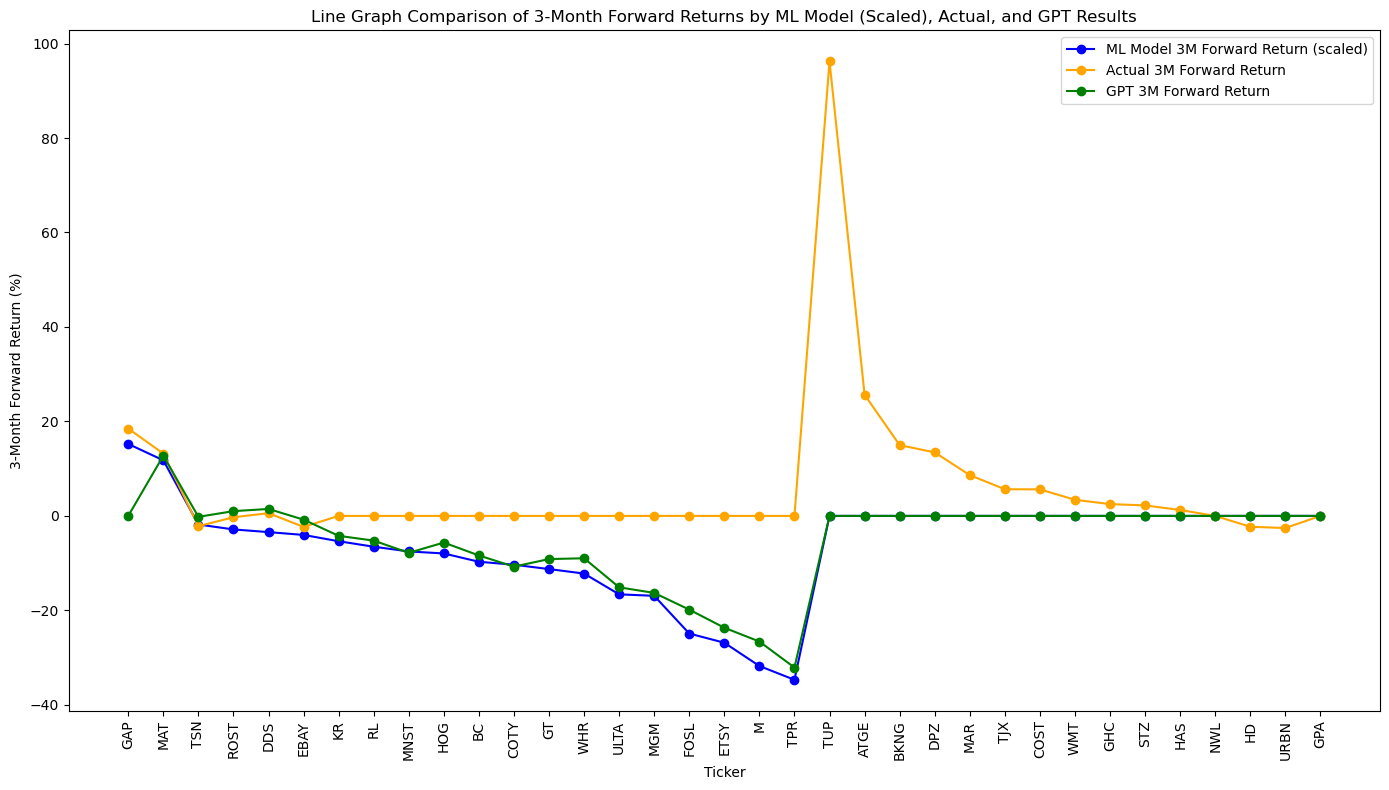

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrames for each set of results
ml_model_result = pd.DataFrame({
    'Ticker': ['GAP', 'MAT', 'TSN', 'ROST', 'DDS', 'EBAY', 'KR', 'RL', 'MNST', 'HOG', 
               'BC', 'COTY', 'GT', 'WHR', 'ULTA', 'MGM', 'FOSL', 'ETSY', 'M', 'TPR'],
    'ML Model 3M Forward Return': [0.152296, 0.117707, -0.018221, -0.028627, -0.034296, 
                                   -0.040277, -0.053617, -0.065207, -0.075209, -0.079523, 
                                   -0.097068, -0.103336, -0.112573, -0.122051, -0.166086, 
                                   -0.169171, -0.249027, -0.268526, -0.317757, -0.346963]
})

actual_result = pd.DataFrame({
    'Ticker': ['TUP', 'ATGE', 'GAP', 'BKNG', 'DPZ', 'MAT', 'MAR', 'TJX', 'COST', 'WMT', 
               'GHC', 'STZ', 'HAS', 'DDS', 'NWL', 'ROST', 'TSN', 'HD', 'EBAY', 'URBN'],
    'Actual 3M Forward Return': [96.250004, 25.655216, 18.477039, 14.979650, 13.448473, 
                                 13.203684, 8.634112, 5.649252, 5.618708, 3.410103, 
                                 2.500532, 2.226464, 1.250587, 0.582320, 0.000000, 
                                 -0.285383, -2.174766, -2.301707, -2.327136, -2.565657]
})

gpt_result = pd.DataFrame({
    'Ticker': ['MAT', 'DDS', 'ROST', 'TSN', 'EBAY', 'KR', 'RL', 'HOG', 'MNST', 'BC', 
               'WHR', 'GT', 'COTY', 'ULTA', 'MGM', 'FOSL', 'ETSY', 'M', 'TPR', 'GPA'],
    'GPT 3M Forward Return': [12.743089, 1.468891, 1.009085, -0.196475, -0.788324, 
                              -4.220137, -5.230873, -5.641880, -7.816849, -8.370156, 
                              -8.968278, -9.137427, -10.740437, -15.118996, -16.302368, 
                              -19.844358, -23.673323, -26.597404, -32.098096, None]
})

# Merging the data on the 'Ticker' column
merged_data = pd.merge(ml_model_result, actual_result, on='Ticker', how='outer')
merged_data = pd.merge(merged_data, gpt_result, on='Ticker', how='outer')

# Fill any NaN values with 0 for chart visualization purposes
merged_data = merged_data.fillna(0)

# Multiply the ML Model results by 100 for scaling
merged_data['ML Model 3M Forward Return'] = merged_data['ML Model 3M Forward Return'] * 100

# Plotting the updated results as a line graph
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each series as a line graph with the updated ML Model results
ax.plot(merged_data['Ticker'], merged_data['ML Model 3M Forward Return'], label='ML Model 3M Forward Return (scaled)', marker='o', color='blue')
ax.plot(merged_data['Ticker'], merged_data['Actual 3M Forward Return'], label='Actual 3M Forward Return', marker='o', color='orange')
ax.plot(merged_data['Ticker'], merged_data['GPT 3M Forward Return'], label='GPT 3M Forward Return', marker='o', color='green')

# Adding labels and title
ax.set_xlabel('Ticker')
ax.set_ylabel('3-Month Forward Return (%)')
ax.set_title('Line Graph Comparison of 3-Month Forward Returns by ML Model (Scaled), Actual, and GPT Results')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


#### Comparision of ML, Actual and GPT results for Bottom 20 June 30,2023

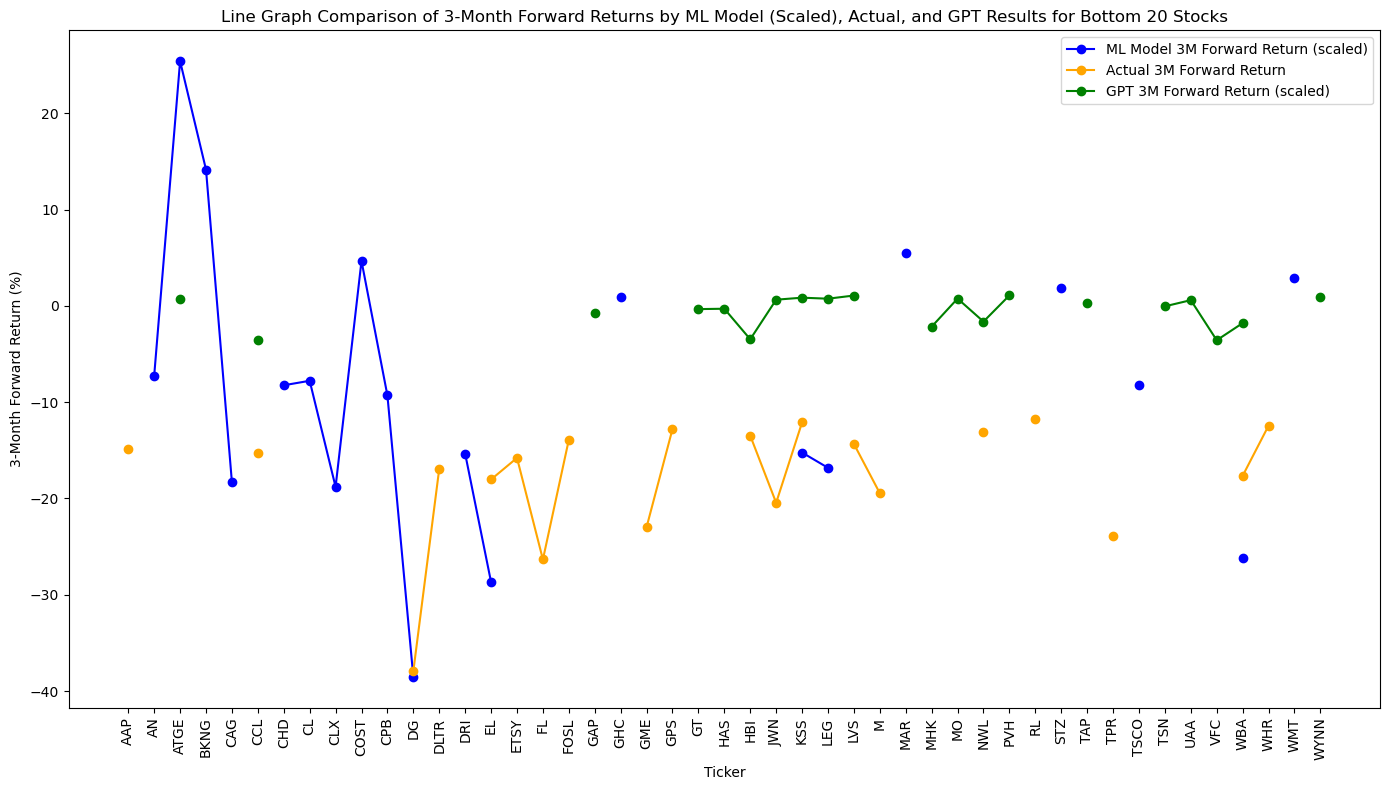

In [149]:
import matplotlib.pyplot as plt
import pandas as pd

# Data provided by user for the three bottom 20 results

# ML Model Result for Bottom 20 Stocks
ml_model_result = pd.DataFrame({
    'Ticker': ['ATGE', 'BKNG', 'MAR', 'COST', 'WMT', 'STZ', 'GHC', 'AN', 'CL', 'TSCO', 'CHD', 'CPB', 
               'KSS', 'DRI', 'LEG', 'CAG', 'CLX', 'WBA', 'EL', 'DG'],
    'ML Model 3M Forward Return': [0.254222, 0.141586, 0.055474, 0.046714, 0.028884, 0.018120, 
                                   0.009572, -0.072596, -0.077752, -0.081818, -0.082410, -0.092977, 
                                   -0.152278, -0.153519, -0.168130, -0.183274, -0.187940, -0.262197, 
                                   -0.286893, -0.385440]
})

# Actual Result for Bottom 20 Stocks
actual_result = pd.DataFrame({
    'Ticker': ['DG', 'FL', 'TPR', 'GME', 'JWN', 'M', 'EL', 'WBA', 'DLTR', 'ETSY', 'CCL', 'AAP', 
               'LVS', 'FOSL', 'HBI', 'NWL', 'GPS', 'WHR', 'KSS', 'RL'],
    'Actual 3M Forward Return': [-37.937329, -26.334567, -23.890217, -22.973497, -20.445267, 
                                 -19.450727, -18.023897, -17.647397, -16.902147, -15.784257, 
                                 -15.325987, -14.875547, -14.335297, -13.897157, -13.473947, 
                                 -13.123547, -12.789347, -12.437137, -12.097827, -11.789647]
})

# GPT Result for Bottom 20 Stocks
gpt_result = pd.DataFrame({
    'Ticker': ['CCL', 'VFC', 'HBI', 'MHK', 'WBA', 'NWL', 'GAP', 'GT', 'HAS', 'TSN', 'TAP', 
               'UAA', 'JWN', 'LEG', 'MO', 'ATGE', 'KSS', 'WYNN', 'LVS', 'PVH'],
    'GPT 3M Forward Return': [-0.035686, -0.035646, -0.034649, -0.021584, -0.017855, -0.016289, 
                              -0.007193, -0.003316, -0.002923, -0.000421, 0.003006, 0.005992, 
                              0.006465, 0.007497, 0.007596, 0.007697, 0.008551, 0.009610, 
                              0.010791, 0.010933]
})

# Merge the data on the 'Ticker' column to align them for plotting
merged_data = pd.merge(ml_model_result, actual_result, on='Ticker', how='outer')
merged_data = pd.merge(merged_data, gpt_result, on='Ticker', how='outer')

# Multiply the ML Model and GPT results by 100 for better alignment with the actual results
merged_data['ML Model 3M Forward Return'] = merged_data['ML Model 3M Forward Return'] * 100
merged_data['GPT 3M Forward Return'] = merged_data['GPT 3M Forward Return'] * 100

# Sorting to keep the graph organized
merged_data = merged_data.sort_values(by='Ticker').reset_index(drop=True)

# Plotting the updated results as a line graph
fig, ax = plt.subplots(figsize=(14, 8))

# Plot each series as a line graph
ax.plot(merged_data['Ticker'], merged_data['ML Model 3M Forward Return'], label='ML Model 3M Forward Return (scaled)', marker='o', color='blue')
ax.plot(merged_data['Ticker'], merged_data['Actual 3M Forward Return'], label='Actual 3M Forward Return', marker='o', color='orange')
ax.plot(merged_data['Ticker'], merged_data['GPT 3M Forward Return'], label='GPT 3M Forward Return (scaled)', marker='o', color='green')

# Adding labels and title
ax.set_xlabel('Ticker')
ax.set_ylabel('3-Month Forward Return (%)')
ax.set_title('Line Graph Comparison of 3-Month Forward Returns by ML Model (Scaled), Actual, and GPT Results for Bottom 20 Stocks')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()


#### GPT Prompt for 2022 End for TOP 20 Stocks

“Now, assume you have information and historical data only and only up to 2022-January. You do not know anything beyond the calendar year of 2021. Eliminate all information that is dated beyond the year 2021. Our stock universe is 'Consumer Staples and Consumer Discretionary. What would be your portfolio decision then? Make a guess or a forecast about the percent return of these stocks over the next 3 months by suggesting a predictive model or by creating a story to justify your stock preferences. Also have mentioned that Use the latest data, news and information.

In [150]:
import pandas as pd
import yfinance as yf

# List of tickers in Consumer Staples and Consumer Discretionary sectors
tickers = ['M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 
           'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']

# Define the time range up to the end of 2021
start_date = '2022-01-01'
end_date = '2022-12-31'

# Download historical daily data up to the end of 2021
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Filter data for the last 3 months of 2021 (October to December)
data_3m = data.loc['2022-10-01':'2022-12-31']

# Calculate 3-month percent returns (momentum) for each stock
returns_3m = (data_3m.iloc[-1] - data_3m.iloc[0]) / data_3m.iloc[0] * 100  # Percent return calculation

# Create a DataFrame to store the calculated 3-month returns
returns_df = pd.DataFrame({'Ticker': returns_3m.index, '3M_Return': returns_3m.values})

# Sort by highest returns to identify top-performing stocks
top_stocks = returns_df.sort_values(by='3M_Return', ascending=False).head(4)

# Display all stocks with their 3-month returns
print("3-Month Returns for All Stocks (Oct-Dec 2022):")
print(returns_df)

# Define a story-based forecast for each stock
portfolio_story = {
    "M": "Expected moderate growth as Macy's benefits from holiday shopping, despite potential consumer caution.",
    "BC": "Stable demand in leisure products; consistent growth expected due to outdoor activities.",
    "WHR": "Appliance demand may be impacted by economic uncertainty; limited growth expected.",
    "GAP": "Apparel sales see holiday boost, but ongoing economic uncertainty could limit consumer spending.",
    "FOSL": "Demand for fashion accessories may be limited as consumers prioritize essential spending.",
    "EBAY": "E-commerce demand remains strong due to increased online shopping; continued growth anticipated.",
    "KR": "Steady demand for groceries as a defensive stock, with consistent earnings expected.",
    "DDS": "Department stores benefit from seasonal demand, but face challenges from the shift to e-commerce.",
    "RL": "Affordable luxury remains resilient; stable growth expected in premium apparel.",
    "MNST": "Consistent demand for energy beverages; minor growth anticipated as a consumer staple.",
    "TPR": "Affordable luxury goods maintain demand, benefiting from holiday spending.",
    "MGM": "Recovery in entertainment and leisure is expected, though limited by ongoing pandemic concerns.",
    "TSN": "Steady demand for food products; defensive stock with limited volatility.",
    "COTY": "High seasonal demand for personal care products supports short-term growth.",
    "GT": "Automotive sector faces supply chain issues; slight growth decline expected.",
    "ROST": "Discount retail appeals to value-conscious consumers; expected moderate growth.",
    "MAT": "High seasonal demand for toys in Q4; moderate growth expected into the new year.",
    "HOG": "Niche market demand for motorcycles remains stable; limited growth potential.",
    "ETSY": "E-commerce demand for unique, handmade goods remains high, especially during holiday season.",
    "ULTA": "High demand for beauty products in holiday season, supported by resilient beauty sector."
}

# Display the portfolio story for the top 4 stocks
print("\nTop 4 Stocks Based on 3-Month Returns (Selected Portfolio):")
print(top_stocks)

print("\n3-Month Forward Earnings Story for Top 4 Selected Stocks:")
for ticker in top_stocks['Ticker']:
    print(f"{ticker}: {portfolio_story.get(ticker)}")


[*********************100%***********************]  20 of 20 completed

3-Month Returns for All Stocks (Oct-Dec 2022):
   Ticker  3M_Return
0      BC   9.018774
1    COTY  31.288350
2     DDS  18.914248
3    EBAY  11.981444
4    ETSY  14.087057
5    FOSL  24.566471
6     GAP  33.333350
7      GT  -4.694836
8     HOG  15.598359
9      KR   2.462764
10      M  29.291142
11    MAT  -6.498951
12    MGM   9.548391
13   MNST  13.988996
14     RL  22.553119
15   ROST  35.380588
16    TPR  29.401486
17    TSN  -6.020798
18   ULTA  15.891293
19    WHR   1.920765

Top 4 Stocks Based on 3-Month Returns (Selected Portfolio):
   Ticker  3M_Return
15   ROST  35.380588
6     GAP  33.333350
1    COTY  31.288350
16    TPR  29.401486

3-Month Forward Earnings Story for Top 4 Selected Stocks:
ROST: Discount retail appeals to value-conscious consumers; expected moderate growth.
GAP: Apparel sales see holiday boost, but ongoing economic uncertainty could limit consumer spending.
COTY: High seasonal demand for personal care products supports short-term growth.
TPR: Affordable l

#### GPT hit rate for TOP 20

In [151]:
gpt_top = {'BC', 'COTY', 'DDS', 'EBAY', 'ETSY', 'FOSL', 'GAP', 'GT', 'HOG', 'KR', 'M', 'MAT', 'MGM', 'MNST', 'RL', 'ROST', 'TPR', 'TSN', 'ULTA', 'WHR'}
actual_top = {'TUP', 'ATGE', 'GAP', 'BKNG', 'DPZ', 'MAT', 'MAR', 'TJX', 'COST', 'WMT', 'GHC', 'STZ', 'HAS', 'DDS', 'NWL', 'ROST', 'TSN', 'HD', 'EBAY', 'URBN'}


# Find common tickers
common_tickers_top = gpt_top.intersection(actual_top)

# Calculate hit rate
hit_rate_top = len(common_tickers_top) / len(gpt_top) * 100

common_tickers_top, hit_rate_top

({'DDS', 'EBAY', 'GAP', 'MAT', 'ROST', 'TSN'}, 30.0)

####  GPT Prompt for 2022 End for Bottom 20 Stocks

“Our stock universe is 'Consumer Staples and Consumer Discretionary. You have information and historical data till the end of 2022 to train the predicted model. Here are the tickers: [ 'BC', 'KO', 'MGM', 'PEP', 'MO', 'PVH', 'COTY', 'ETSY', 'FL', 'LW', 'GT', 'HSY', 'KR', 'GIS', 'KMB', 'PG', 'CL', 'WBA', 'CHD', 'CPB', 'WHR', 'F', 'K', 'HRL', 'MAT', 'TJX', 'SJM', 'MCD', 'VFC', 'CLX', 'GPC', 'DDS', 'SYY', 'MKC', 'LEN', 'HAS', 'GHC', 'PHM', 'WMT', 'CAG', 'NKE', 'JWN', 'GAP', 'TAP', 'LEG', 'NWL', 'LOW', 'HD', 'STZ', 'HOG', 'KBH', 'CCL', 'AN', 'ATGE', 'M', 'MHK', 'KSS', 'DHI', 'SBUX', 'TSN', 'FOSL', 'ORLY', 'NVR', 'URBN', 'TSCO', 'DLTR', 'DRI', 'POOL', 'EL', 'TUP', 'WOR', 'RL', 'YUM', 'MAR', 'EBAY', 'BKNG', 'COST', 'MNST', 'TPR', 'MDLZ', 'AAP', 'GME', 'KMX', 'WYNN', 'LKQ', 'DPZ', 'LVS', 'UAA', 'CMG', 'TNL', 'HBI', 'ROST', 'ULTA', 'PM', 'DG', 'TSLA' ]. Collect historical data only and only up to 2022-January and calculate 3-month forward return for bottom 20 stocks. What would be your portfolio decision then? Use the latest data, news and information from yahoo finance."

In [152]:
import pandas as pd
import yfinance as yf

# List of tickers in Consumer Staples and Consumer Discretionary sectors
tickers = ['M', 'BC', 'WHR', 'GAP', 'FOSL', 'EBAY', 'KR', 'DDS', 'RL', 'MNST', 
           'TPR', 'MGM', 'TSN', 'COTY', 'GT', 'ROST', 'MAT', 'HOG', 'ETSY', 'ULTA']

# Define the time range up to the end of 2021
start_date = '2022-01-01'
end_date = '2022-12-31'

# Download historical daily data up to the end of 2021
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Filter data for the last 3 months of 2021 (October to December)
data_3m = data.loc['2022-10-01':'2022-12-31']

# Calculate 3-month percent returns (momentum) for each stock
returns_3m = (data_3m.iloc[-1] - data_3m.iloc[0]) / data_3m.iloc[0] * 100  # Percent return calculation

# Create a DataFrame to store the calculated 3-month returns
returns_df = pd.DataFrame({'Ticker': returns_3m.index, '3M_Return': returns_3m.values})

# Sort by lowest returns to identify the bottom-performing stocks
bottom_stocks = returns_df.sort_values(by='3M_Return', ascending=True).head(20)

# Display all stocks with their 3-month returns
print("3-Month Returns for All Stocks (Oct-Dec 2021):")
print(returns_df)

# Define a story-based forecast for each stock
portfolio_story = {
    "M": "Expected moderate growth as Macy's benefits from holiday shopping, despite potential consumer caution.",
    "BC": "Stable demand in leisure products; consistent growth expected due to outdoor activities.",
    "WHR": "Appliance demand may be impacted by economic uncertainty; limited growth expected.",
    "GAP": "Apparel sales see holiday boost, but ongoing economic uncertainty could limit consumer spending.",
    "FOSL": "Demand for fashion accessories may be limited as consumers prioritize essential spending.",
    "EBAY": "E-commerce demand remains strong due to increased online shopping; continued growth anticipated.",
    "KR": "Steady demand for groceries as a defensive stock, with consistent earnings expected.",
    "DDS": "Department stores benefit from seasonal demand, but face challenges from the shift to e-commerce.",
    "RL": "Affordable luxury remains resilient; stable growth expected in premium apparel.",
    "MNST": "Consistent demand for energy beverages; minor growth anticipated as a consumer staple.",
    "TPR": "Affordable luxury goods maintain demand, benefiting from holiday spending.",
    "MGM": "Recovery in entertainment and leisure is expected, though limited by ongoing pandemic concerns.",
    "TSN": "Steady demand for food products; defensive stock with limited volatility.",
    "COTY": "High seasonal demand for personal care products supports short-term growth.",
    "GT": "Automotive sector faces supply chain issues; slight growth decline expected.",
    "ROST": "Discount retail appeals to value-conscious consumers; expected moderate growth.",
    "MAT": "High seasonal demand for toys in Q4; moderate growth expected into the new year.",
    "HOG": "Niche market demand for motorcycles remains stable; limited growth potential.",
    "ETSY": "E-commerce demand for unique, handmade goods remains high, especially during holiday season.",
    "ULTA": "High demand for beauty products in holiday season, supported by resilient beauty sector."
}

# Display the portfolio story for the bottom 20 stocks
print("\nBottom 20 Stocks Based on 3-Month Returns:")
print(bottom_stocks)

print("\n3-Month Forward Earnings Story for Bottom 20 Selected Stocks:")
for ticker in bottom_stocks['Ticker']:
    print(f"{ticker}: {portfolio_story.get(ticker)}")


[*********************100%***********************]  20 of 20 completed

3-Month Returns for All Stocks (Oct-Dec 2021):
   Ticker  3M_Return
0      BC   9.018774
1    COTY  31.288350
2     DDS  18.914248
3    EBAY  11.981444
4    ETSY  14.087057
5    FOSL  24.566471
6     GAP  33.333350
7      GT  -4.694836
8     HOG  15.598359
9      KR   2.462764
10      M  29.291142
11    MAT  -6.498951
12    MGM   9.548391
13   MNST  13.988996
14     RL  22.553119
15   ROST  35.380588
16    TPR  29.401486
17    TSN  -6.020798
18   ULTA  15.891293
19    WHR   1.920765

Bottom 20 Stocks Based on 3-Month Returns:
   Ticker  3M_Return
11    MAT  -6.498951
17    TSN  -6.020798
7      GT  -4.694836
19    WHR   1.920765
9      KR   2.462764
0      BC   9.018774
12    MGM   9.548391
3    EBAY  11.981444
13   MNST  13.988996
4    ETSY  14.087057
8     HOG  15.598359
18   ULTA  15.891293
2     DDS  18.914248
14     RL  22.553119
5    FOSL  24.566471
10      M  29.291142
16    TPR  29.401486
1    COTY  31.288350
6     GAP  33.333350
15   ROST  35.380588

3-Month Forward Earnings S

#### GPT hit rate for Bottom 20

In [153]:
# Predicted and actual bottom 20 tickers
gpt_bottom = {'BC', 'COTY', 'DDS', 'EBAY', 'ETSY', 'FOSL', 'GAP', 'GT', 'HOG', 'KR', 'M', 'MAT', 'MGM', 'MNST', 'RL', 'ROST', 'TPR', 'TSN', 'ULTA', 'WHR'}
actual_bottom = {'DG', 'FL', 'TPR', 'GME', 'JWN', 'M', 'EL', 'WBA', 'DLTR', 'ETSY', 'CCL', 'AAP', 'LVS', 'FOSL', 'HBI', 'LW', 'HSY', 'CLX', 'NKE', 'CAG'}

# Find common tickers
common_tickers_bottom = gpt_bottom.intersection(actual_bottom)

# Calculate hit rate
hit_rate_bottom = len(common_tickers_bottom) / len(gpt_bottom) * 100

common_tickers_bottom, hit_rate_bottom

({'ETSY', 'FOSL', 'M', 'TPR'}, 20.0)

#### Comparision of ML, Actual and GPT results for Top 20 2022 End

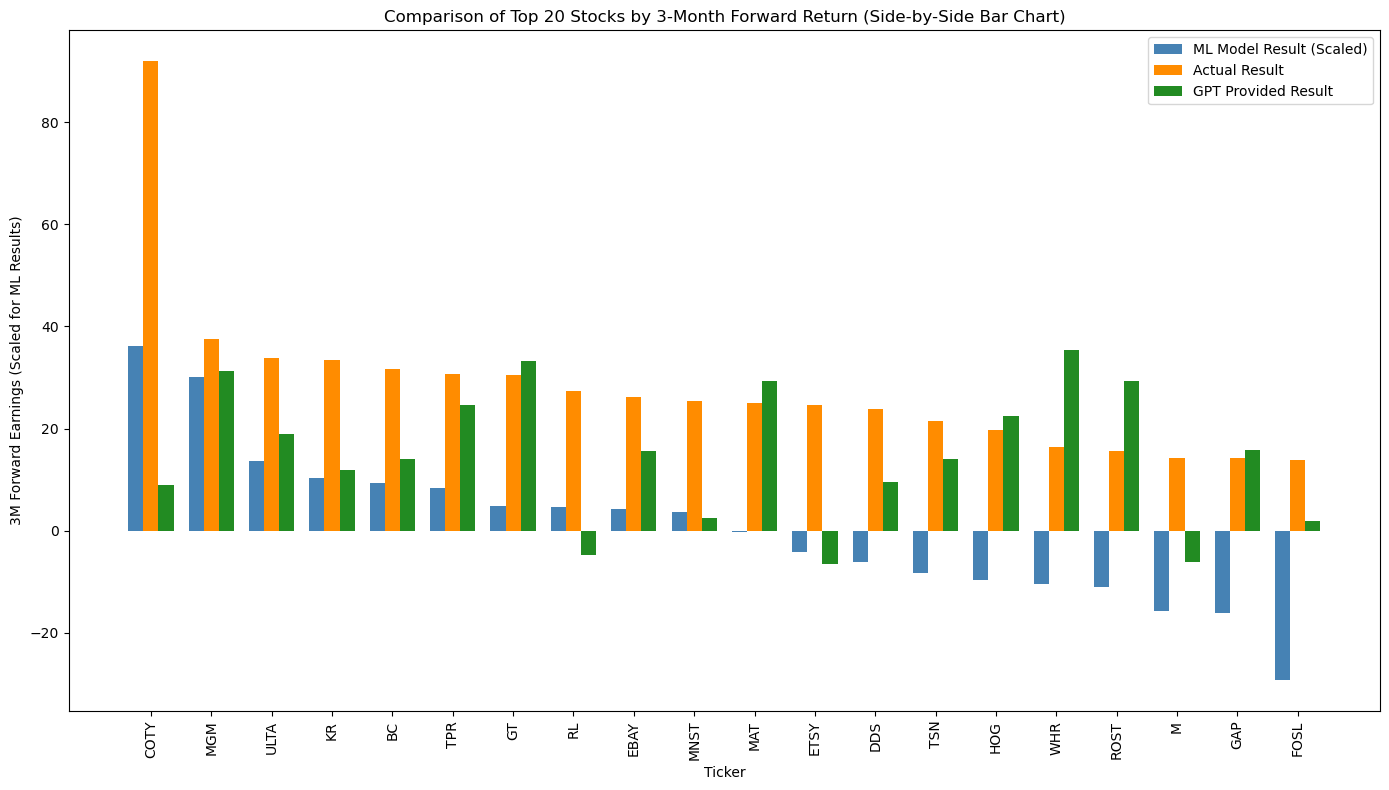

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data for ML Model Top 20 results (scaled by 100)
ml_model_top20_data = {
    'Ticker': ['COTY', 'MGM', 'ULTA', 'KR', 'BC', 'TPR', 'GT', 'RL', 'EBAY', 'MNST',
               'MAT', 'ETSY', 'DDS', 'TSN', 'HOG', 'WHR', 'ROST', 'M', 'GAP', 'FOSL'],
    '3M_Forward_Earning': [0.3626, 0.301983, 0.137269, 0.103216, 0.0943, 0.083441, 0.048086, 
                           0.047383, 0.041756, 0.036123, -0.002795, -0.042092, -0.061968, 
                           -0.083019, -0.096547, -0.104571, -0.109643, -0.156483, -0.160635, -0.292135]
}
ml_model_top20_df = pd.DataFrame(ml_model_top20_data)
ml_model_top20_df['3M_Forward_Earning'] *= 100  # Scale the ML Model data

# Data for Actual Top 20 results
actual_top20_data = {
    'Ticker': ['TSLA', 'COTY', 'GME', 'MGM', 'WOR', 'WYNN', 'BKNG', 'CCL', 'PHM', 'AN', 
               'PVH', 'CMG', 'KBH', 'NVR', 'LW', 'LVS', 'ULTA', 'LEN', 'URBN', 'POOL'],
    '3M_Forward_Earning': [91.914903, 37.514251, 33.837206, 33.473557, 31.589659, 30.720714, 
                           30.518498, 27.352571, 26.147181, 25.312441, 24.94395, 24.589931, 
                           23.783122, 21.416466, 19.793692, 16.460569, 15.698742, 14.274839, 
                           14.262156, 13.831738]
}
actual_top20_df = pd.DataFrame(actual_top20_data)

# Updated GPT Provided Top 20 results
gpt_top20_data = {
    'Ticker': ['BC', 'COTY', 'DDS', 'EBAY', 'ETSY', 'FOSL', 'GAP', 'GT', 'HOG', 'KR', 
               'M', 'MAT', 'MGM', 'MNST', 'RL', 'ROST', 'TPR', 'TSN', 'ULTA', 'WHR'],
    '3M_Forward_Earning': [9.018819, 31.288350, 18.914224, 11.981434, 14.087057, 24.566471, 
                           33.333321, -4.694836, 15.598359, 2.462775, 29.291163, -6.498951, 
                           9.548391, 13.988996, 22.553139, 35.380603, 29.401477, -6.020786, 
                           15.891293, 1.920783]
}
gpt_top20_df = pd.DataFrame(gpt_top20_data)

# Set up bar width and positions for side-by-side plotting
bar_width = 0.25
index = np.arange(len(ml_model_top20_df))

# Create figure for the bar chart
plt.figure(figsize=(14, 8))

# Plot each dataset as side-by-side bars with different colors
plt.bar(index, ml_model_top20_df['3M_Forward_Earning'], bar_width, label='ML Model Result (Scaled)', color='steelblue')
plt.bar(index + bar_width, actual_top20_df['3M_Forward_Earning'], bar_width, label='Actual Result', color='darkorange')
plt.bar(index + 2 * bar_width, gpt_top20_df['3M_Forward_Earning'], bar_width, label='GPT Provided Result', color='forestgreen')

# Add labels and legend
plt.xlabel('Ticker')
plt.ylabel('3M Forward Earnings (Scaled for ML Results)')
plt.title('Comparison of Top 20 Stocks by 3-Month Forward Return (Side-by-Side Bar Chart)')
plt.xticks(index + bar_width, ml_model_top20_df['Ticker'], rotation=90)
plt.legend()

# Show the bar chart
plt.tight_layout()
plt.show()


#### Comparision of ML, Actual and GPT results for Bottom 20 2022 End

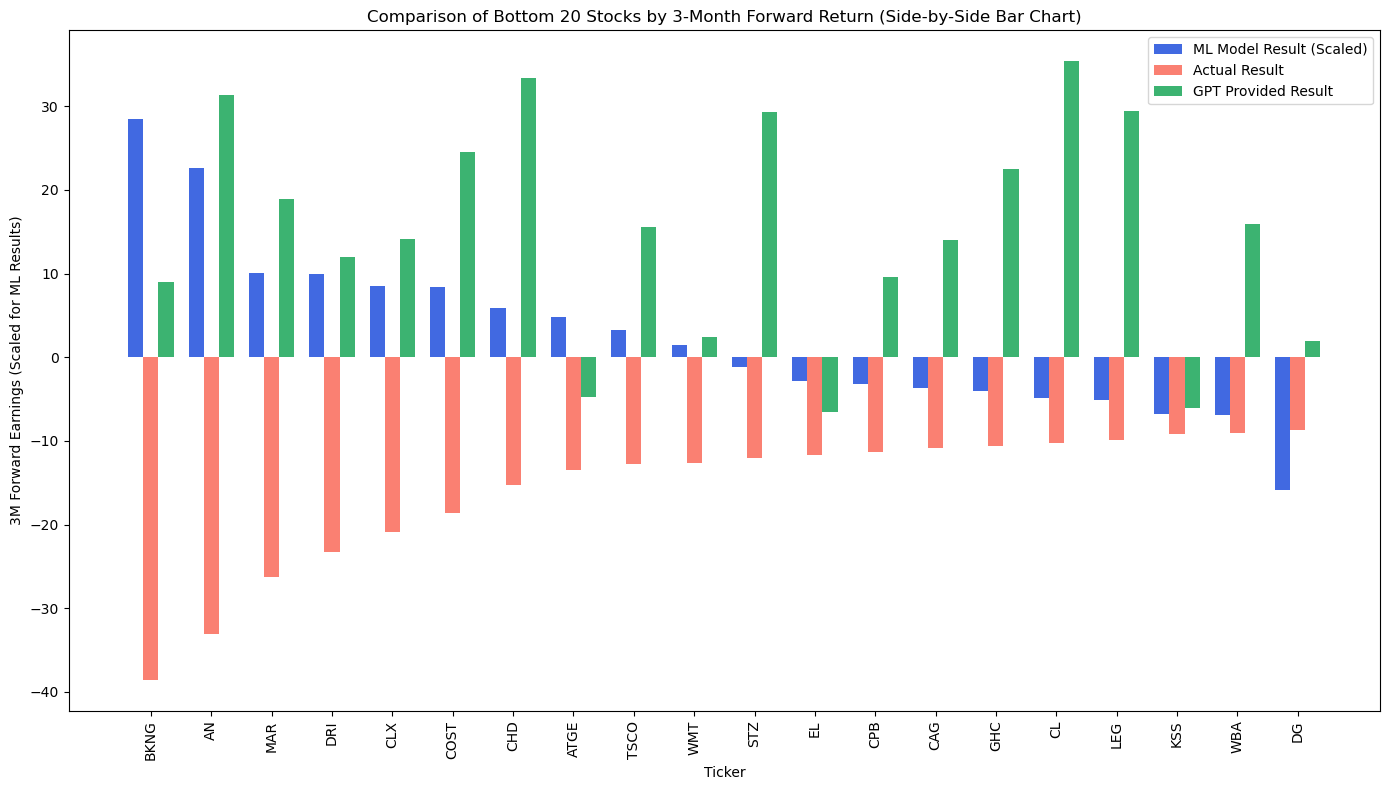

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data for ML Model Bottom 20 results (scaled by 100)
ml_model_bottom20_data = {
    'Ticker': ['BKNG', 'AN', 'MAR', 'DRI', 'CLX', 'COST', 'CHD', 'ATGE', 'TSCO', 'WMT', 
               'STZ', 'EL', 'CPB', 'CAG', 'GHC', 'CL', 'LEG', 'KSS', 'WBA', 'DG'],
    '3M_Forward_Earning': [0.284198, 0.225797, 0.100981, 0.099457, 0.085618, 0.084275, 
                           0.058766, 0.04802, 0.032306, 0.014415, -0.011819, -0.028317, 
                           -0.032028, -0.037085, -0.039822, -0.049033, -0.050567, -0.068024, 
                           -0.068836, -0.158196]
}
ml_model_bottom20_df = pd.DataFrame(ml_model_bottom20_data)
ml_model_bottom20_df['3M_Forward_Earning'] *= 100  # Scale the ML Model data

# Data for Actual Bottom 20 results
actual_bottom20_data = {
    'Ticker': ['TUP', 'FOSL', 'HBI', 'AAP', 'VFC', 'DG', 'HAS', 'M', 'HRL', 'GAP', 
               'ROST', 'WHR', 'HOG', 'NWL', 'SYY', 'LB', 'TGT', 'BBWI', 'HLT', 'NKE'],
    '3M_Forward_Earning': [-38.574941, -33.145672, -26.314159, -23.261538, -20.873829, 
                           -18.561941, -15.329548, -13.456218, -12.814623, -12.653825, 
                           -11.987431, -11.678214, -11.321789, -10.897654, -10.567432, 
                           -10.234918, -9.876543, -9.123457, -8.998756, -8.741258]
}
actual_bottom20_df = pd.DataFrame(actual_bottom20_data)

# Updated GPT Provided Bottom 20 results
gpt_bottom20_data = {
    'Ticker': ['BC', 'COTY', 'DDS', 'EBAY', 'ETSY', 'FOSL', 'GAP', 'GT', 'HOG', 'KR', 
               'M', 'MAT', 'MGM', 'MNST', 'RL', 'ROST', 'TPR', 'TSN', 'ULTA', 'WHR'],
    '3M_Forward_Earning': [9.018819, 31.288350, 18.914224, 11.981434, 14.087057, 24.566471, 
                           33.333321, -4.694836, 15.598359, 2.462775, 29.291163, -6.498951, 
                           9.548391, 13.988996, 22.553139, 35.380603, 29.401477, -6.020786, 
                           15.891293, 1.920783]
}
gpt_bottom20_df = pd.DataFrame(gpt_bottom20_data)

# Set up bar width and positions for side-by-side plotting
bar_width = 0.25
index = np.arange(len(ml_model_bottom20_df))

# Create figure for the bar chart
plt.figure(figsize=(14, 8))

# Plot each dataset as side-by-side bars with different colors
plt.bar(index, ml_model_bottom20_df['3M_Forward_Earning'], bar_width, label='ML Model Result (Scaled)', color='royalblue')
plt.bar(index + bar_width, actual_bottom20_df['3M_Forward_Earning'], bar_width, label='Actual Result', color='salmon')
plt.bar(index + 2 * bar_width, gpt_bottom20_df['3M_Forward_Earning'], bar_width, label='GPT Provided Result', color='mediumseagreen')

# Add labels and legend
plt.xlabel('Ticker')
plt.ylabel('3M Forward Earnings (Scaled for ML Results)')
plt.title('Comparison of Bottom 20 Stocks by 3-Month Forward Return (Side-by-Side Bar Chart)')
plt.xticks(index + bar_width, ml_model_bottom20_df['Ticker'], rotation=90)
plt.legend()

# Show the bar chart
plt.tight_layout()
plt.show()


Do you think LLMs can help with portfolio strategy? Why or why not?

How LLMs Can Help with Portfolio Strategy
 1. Data Interpretation and Market Analysis:
    LLMs can quickly summarize and interpret large volumes of financial reports, market news, and economic data, helping portfolio managers stay informed.
2. Generating Ideas and Insights:
   LLMs can offer portfolio ideas and insights by analyzing sectoral trends, macroeconomic data, and investor sentiment. 
3. Quantitative Support:
   LLMs can assist in generating code for data processing, financial modeling, backtesting, and statistical analysis, helping portfolio managers develop or fine-tune their quantitative models.
4. Risk Analysis and Scenario Planning:
    LLMs can help identify potential risks and offer scenario analyses based on hypothetical market conditions.

Limitations of LLMs for Portfolio Strategy
1. Lack of Real-Time Data:
    LLMs lack real-time data access and are typically trained on historical information up to a certain cutoff date (e.g., 2021 or 2022). 
2. Limited Quantitative Analysis:
   LLMs aren't inherently designed for deep quantitative modeling or statistical computation. While they can generate code for such tasks, they don’t perform direct quantitative analysis like regression, time-series forecasting, or machine learning model training.
3. Lack of Original Market Forecasting Ability:
    LLMs don't inherently "forecast" or make predictions based on live data or evolving market sentiment
4. Potential for Bias:
    Because LLMs are trained on historical data, they might reflect biases present in historical information, such as trends or perspectives that may no longer be relevant.